# Part 1

# Clustering: Define the problem and perform Exploratory Data Analysis 

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = 10
%matplotlib inline

In [2]:
#Load the Data
ads=pd.read_excel(r'D:\dsba\ml - 1\clustering_clean_ads_data.xlsx')
ads.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.0031,0.0,0.0
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.0035,0.0,0.0
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.0028,0.0,0.0
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.0,0.35,0.0,0.0020,0.0,0.0
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.0,0.35,0.0,0.0041,0.0,0.0


In [3]:
#check shape
ads.shape

(23066, 19)

In [4]:
#check datatype
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

In [5]:
#Statistical summary
ads.describe().T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,3.851631e+02,2.336514e+02,120.0000,120.000000,300.00000,7.200000e+02,728.00
Ad- Width,23066.0,3.378960e+02,2.030929e+02,70.0000,250.000000,300.00000,6.000000e+02,600.00
Ad Size,23066.0,9.667447e+04,6.153833e+04,33600.0000,72000.000000,72000.00000,8.400000e+04,216000.00
Available_Impressions,23066.0,2.432044e+06,4.742888e+06,1.0000,33672.250000,483771.00000,2.527712e+06,27592861.00
Matched_Queries,23066.0,1.295099e+06,2.512970e+06,1.0000,18282.500000,258087.50000,1.180700e+06,14702025.00
...,...,...,...,...,...,...,...,...
Fee,23066.0,3.351231e-01,3.196322e-02,0.2100,0.330000,0.35000,3.500000e-01,0.35
Revenue,23066.0,1.924252e+03,3.105238e+03,0.0000,55.365375,926.33500,2.091338e+03,21276.18
CTR,18330.0,7.366054e-02,7.515992e-02,0.0001,0.002600,0.08255,1.300000e-01,1.00
CPM,18330.0,7.672045e+00,6.481391e+00,0.0000,1.710000,7.66000,1.251000e+01,81.56


In [6]:
ads.InventoryType.value_counts()

Format4    7165
Format5    4249
Format1    3814
Format3    3540
Format6    1850
Format2    1789
Format7     659
Name: InventoryType, dtype: int64

In [7]:
ads.Platform.value_counts()

Video    9873
Web      8251
App      4942
Name: Platform, dtype: int64

In [8]:
ads.Format.value_counts()

Video      11552
Display    11514
Name: Format, dtype: int64

In [9]:
#check duplicate
ads.duplicated().sum()

0

In [10]:
#Check for columns with null values
for i in ads.columns:
    print(i,ads[i].isnull().sum())

Timestamp 0
InventoryType 0
Ad - Length 0
Ad- Width 0
Ad Size 0
Ad Type 0
Platform 0
Device Type 0
Format 0
Available_Impressions 0
Matched_Queries 0
Impressions 0
Clicks 0
Spend 0
Fee 0
Revenue 0
CTR 4736
CPM 4736
CPC 4736


In [11]:
#Treating null values

In [12]:
ctr = (ads['Clicks']/ads['Impressions'])*100
ads['CTR'].fillna(ctr, inplace=True)

In [13]:
cpm = (ads['Spend']/ads['Impressions'])*1000
ads['CPM'].fillna(cpm, inplace=True)

In [14]:
cpc = (ads['Spend']/ads['Clicks'])*1000
ads['CPC'].fillna(cpc, inplace=True)

In [15]:
#Recheck for columns with null values
for i in ads.columns:
    print(i,ads[i].isnull().sum())

Timestamp 0
InventoryType 0
Ad - Length 0
Ad- Width 0
Ad Size 0
Ad Type 0
Platform 0
Device Type 0
Format 0
Available_Impressions 0
Matched_Queries 0
Impressions 0
Clicks 0
Spend 0
Fee 0
Revenue 0
CTR 0
CPM 0
CPC 0


EDA for numeric data

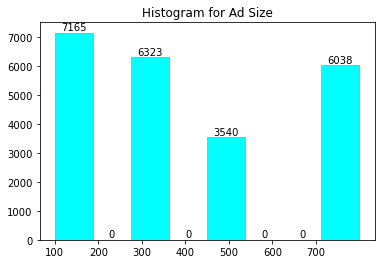

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

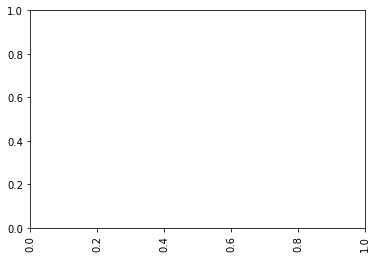

In [16]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(ads[column].describe(),end=' ')
    
    
    plt.figure(figsize=[25,10])
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    a=round(ads[column].min())
    b=round(ads[column].max())
    freq, bins, patches = plt.hist(ads[column], bins=nbins, range=[a,b], edgecolor='Black', color='cyan')
    bin_centers = np.diff(bins)*0.5 + bins[:-1]
    n = 0
    for fr, x, patch in zip(freq, bin_centers, patches):
      height = int(freq[n])
      plt.annotate("{}".format(height),
               xy = (x, height),             # top left corner of the histogram bar
               xytext = (0,0.2),             # offsetting label position above its bar
               textcoords = "offset points", # Offset (in points) from the *xy* value
               ha = 'center', va = 'bottom'
               )
      n = n+1

    #plt.legend()
    #plt.xticks(range(a,b,round((b-a)/nbins)))
    plt.show;
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=ads[column])
    #ax.legend()
    plt.show()
freq, bins, patches = plt.hist(ads['Ad - Length'], 8, range=[100, 800], edgecolor='Orange', color='cyan')
bin_centers = np.diff(bins)*0.5 + bins[:-1]
n = 0
for fr, x, patch in zip(freq, bin_centers, patches):
      height = int(freq[n])
      plt.annotate("{}".format(height),
               xy = (x, height),             # top left corner of the histogram bar
               xytext = (0,0.2),             # offsetting label position above its bar
               textcoords = "offset points", # Offset (in points) from the *xy* value
               ha = 'center', va = 'bottom'
               )
      n = n+1
plt.title('Histogram for Ad Size')
plt.xticks(range(100,800,100))
plt.show()
plt.xticks(rotation = 90)

In [17]:
ads_num = ads.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(ads_num.columns.values)
len(lstnumericcolumns)

13

In [18]:
type(lstnumericcolumns)

list

In [19]:
lstnumericcolumns

['Ad - Length',
 'Ad- Width',
 'Ad Size',
 'Available_Impressions',
 'Matched_Queries',
 'Impressions',
 'Clicks',
 'Spend',
 'Fee',
 'Revenue',
 'CTR',
 'CPM',
 'CPC']

In [20]:
ads_num.head()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,300,250,75000,1806,325,323,1,0.0,0.35,0.0,0.0031,0.0,0.0
1,300,250,75000,1780,285,285,1,0.0,0.35,0.0,0.0035,0.0,0.0
2,300,250,75000,2727,356,355,1,0.0,0.35,0.0,0.0028,0.0,0.0
3,300,250,75000,2430,497,495,1,0.0,0.35,0.0,0.0020,0.0,0.0
4,300,250,75000,1218,242,242,1,0.0,0.35,0.0,0.0041,0.0,0.0


Description of Ad - Length
----------------------------------------------------------------------------
count    23066.000000
mean       385.163097
std        233.651434
min        120.000000
25%        120.000000
50%        300.000000
75%        720.000000
max        728.000000
Name: Ad - Length, dtype: float64 Distribution of Ad - Length
----------------------------------------------------------------------------
BoxPlot of Ad - Length
----------------------------------------------------------------------------


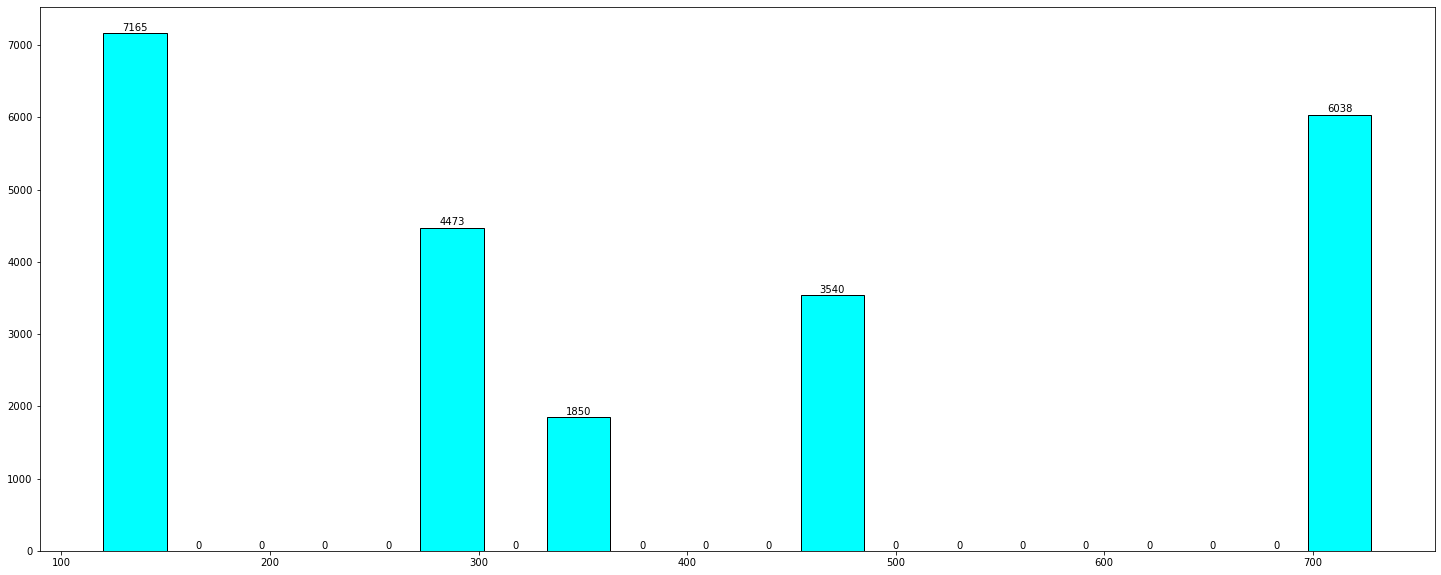

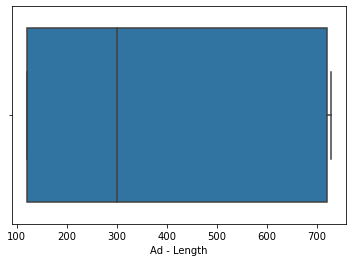

Description of Ad- Width
----------------------------------------------------------------------------
count    23066.000000
mean       337.896037
std        203.092885
min         70.000000
25%        250.000000
50%        300.000000
75%        600.000000
max        600.000000
Name: Ad- Width, dtype: float64 Distribution of Ad- Width
----------------------------------------------------------------------------
BoxPlot of Ad- Width
----------------------------------------------------------------------------


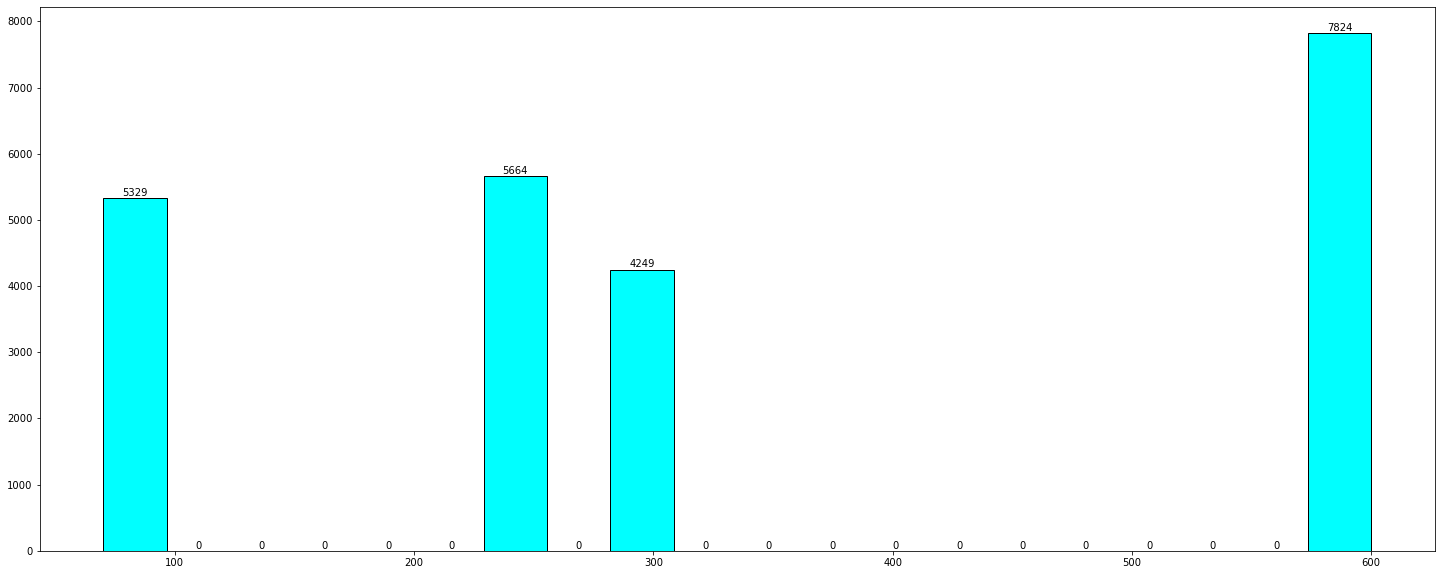

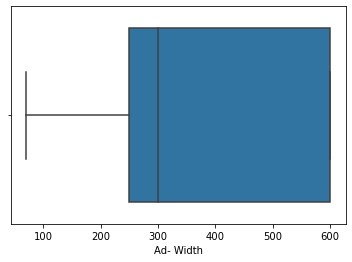

Description of Ad Size
----------------------------------------------------------------------------
count     23066.000000
mean      96674.468048
std       61538.329557
min       33600.000000
25%       72000.000000
50%       72000.000000
75%       84000.000000
max      216000.000000
Name: Ad Size, dtype: float64 Distribution of Ad Size
----------------------------------------------------------------------------
BoxPlot of Ad Size
----------------------------------------------------------------------------


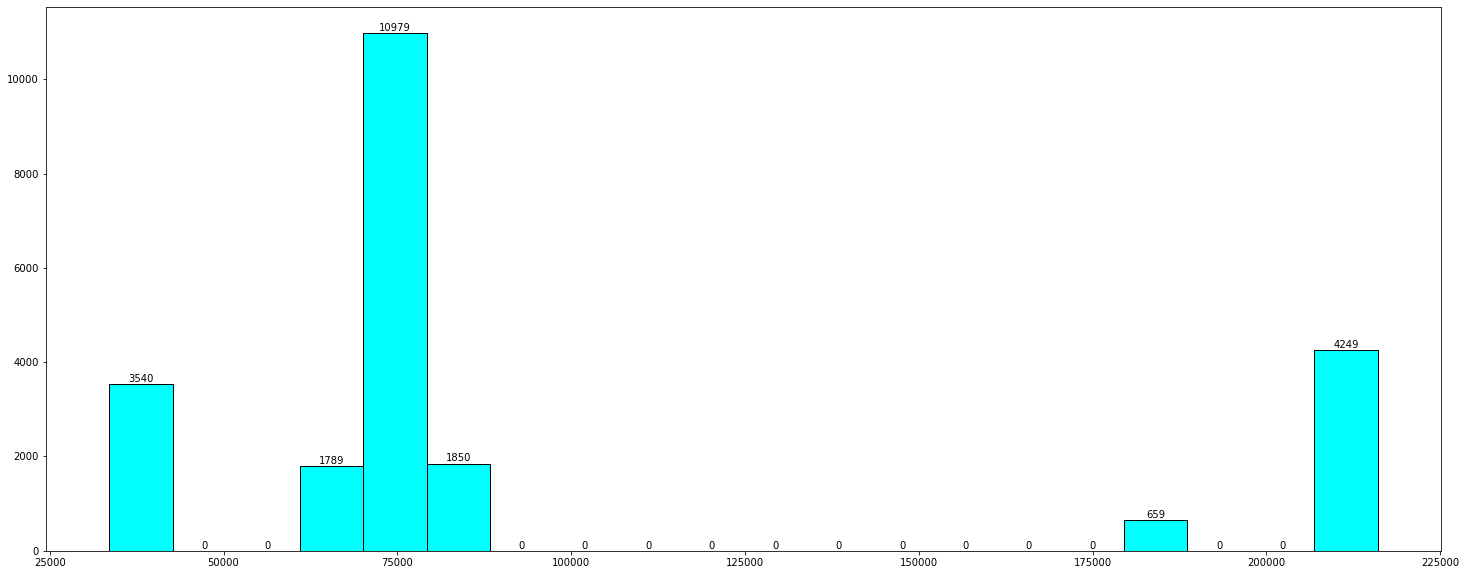

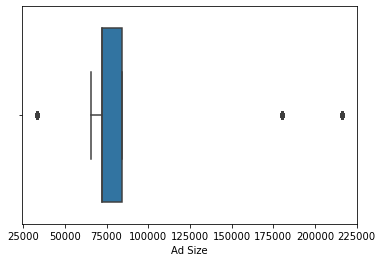

Description of Available_Impressions
----------------------------------------------------------------------------
count    2.306600e+04
mean     2.432044e+06
std      4.742888e+06
min      1.000000e+00
25%      3.367225e+04
50%      4.837710e+05
75%      2.527712e+06
max      2.759286e+07
Name: Available_Impressions, dtype: float64 Distribution of Available_Impressions
----------------------------------------------------------------------------
BoxPlot of Available_Impressions
----------------------------------------------------------------------------


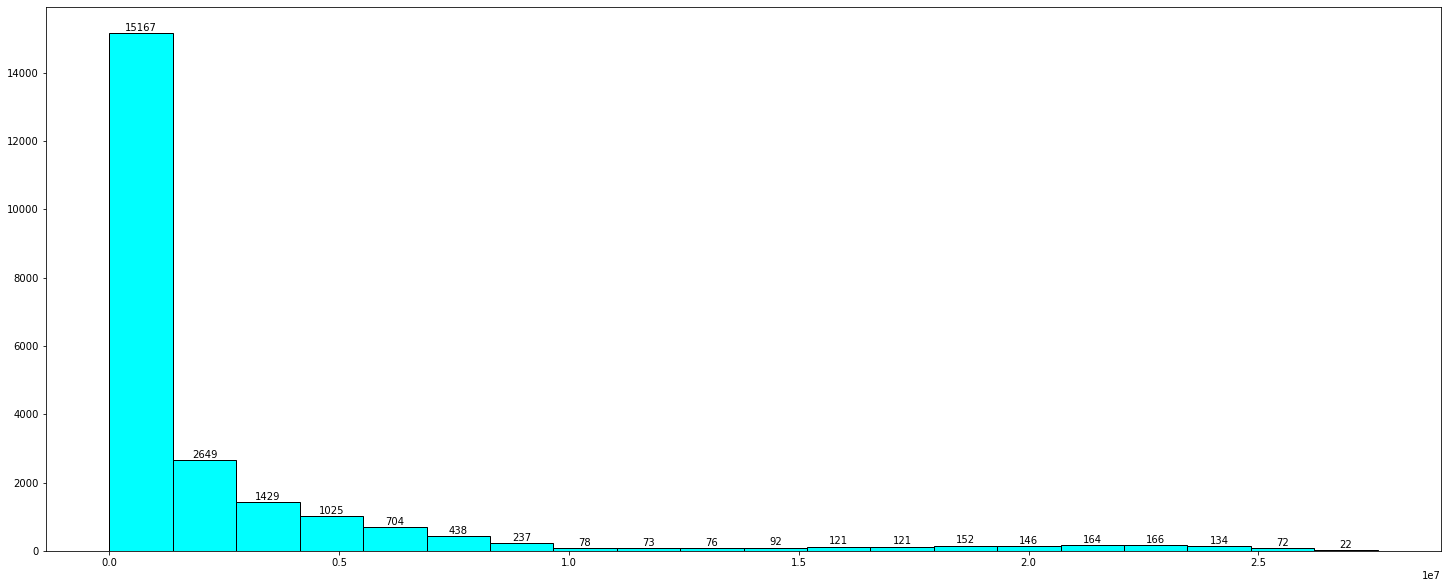

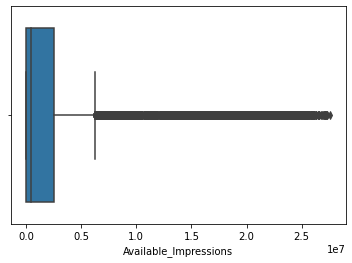

Description of Matched_Queries
----------------------------------------------------------------------------
count    2.306600e+04
mean     1.295099e+06
std      2.512970e+06
min      1.000000e+00
25%      1.828250e+04
50%      2.580875e+05
75%      1.180700e+06
max      1.470202e+07
Name: Matched_Queries, dtype: float64 Distribution of Matched_Queries
----------------------------------------------------------------------------
BoxPlot of Matched_Queries
----------------------------------------------------------------------------


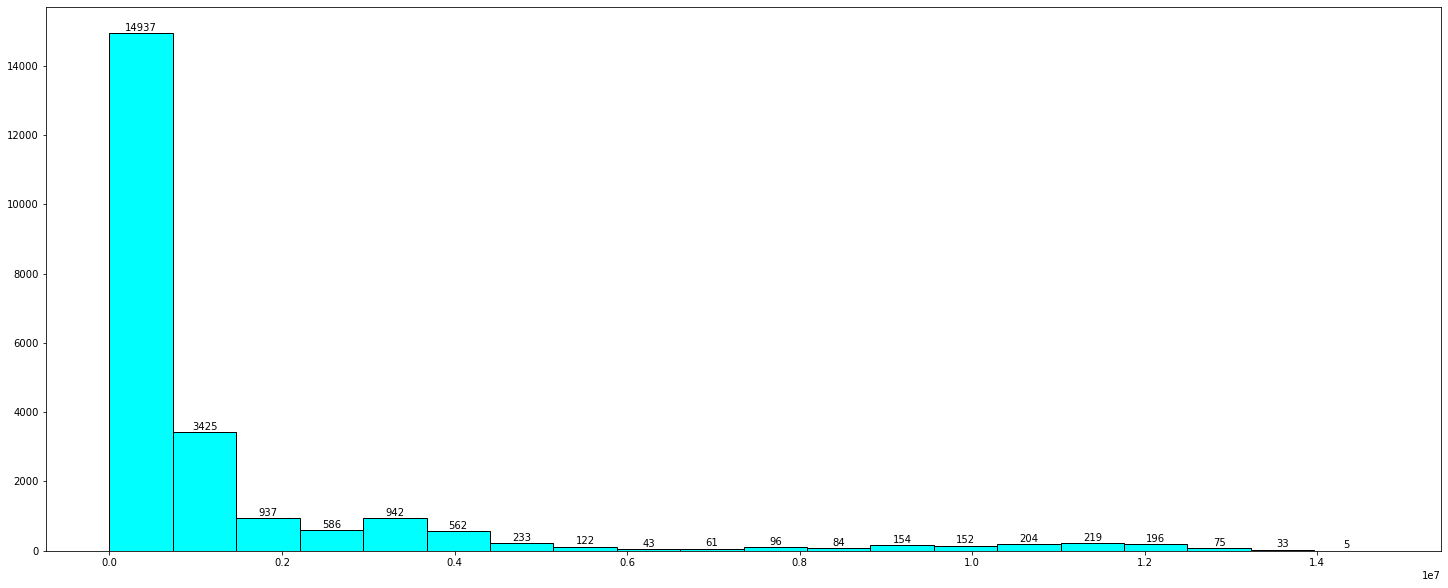

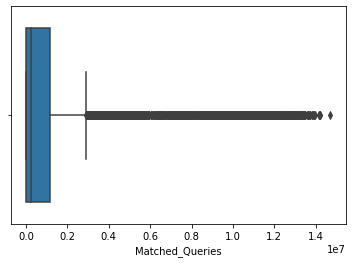

Description of Impressions
----------------------------------------------------------------------------
count    2.306600e+04
mean     1.241520e+06
std      2.429400e+06
min      1.000000e+00
25%      7.990500e+03
50%      2.252900e+05
75%      1.112428e+06
max      1.419477e+07
Name: Impressions, dtype: float64 Distribution of Impressions
----------------------------------------------------------------------------
BoxPlot of Impressions
----------------------------------------------------------------------------


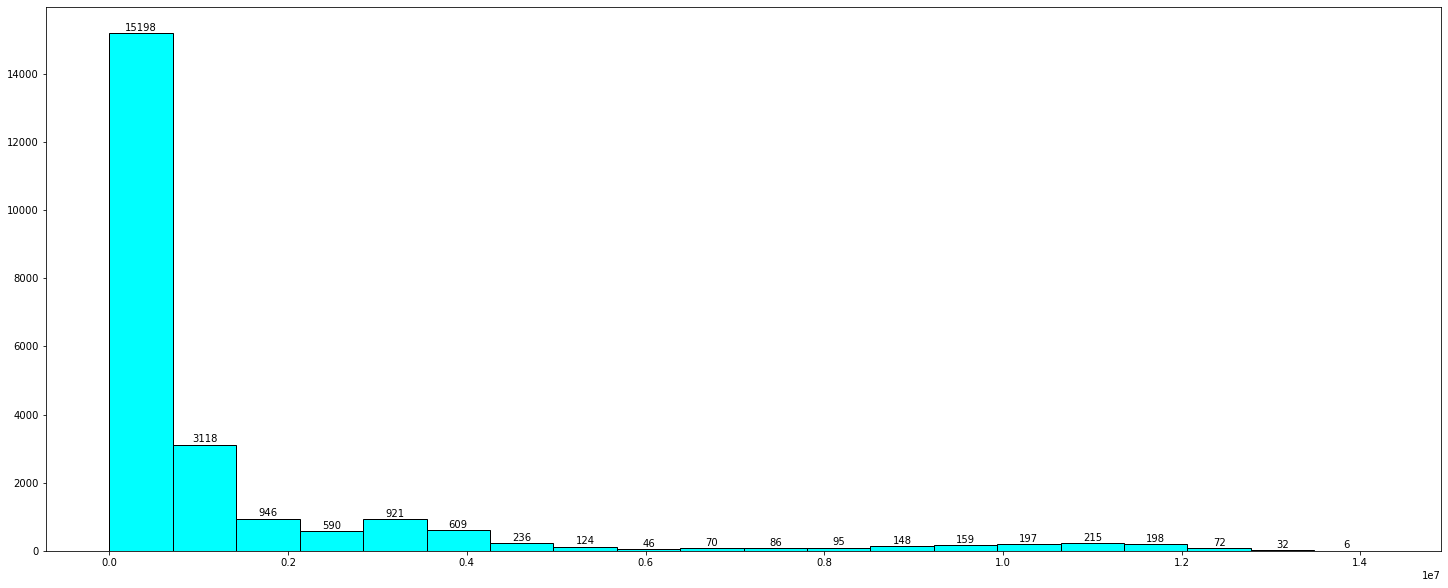

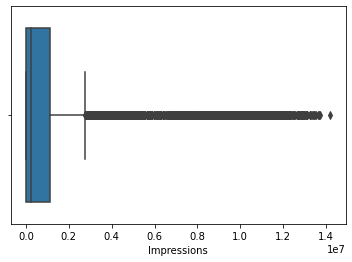

Description of Clicks
----------------------------------------------------------------------------
count     23066.000000
mean      10678.518816
std       17353.409363
min           1.000000
25%         710.000000
50%        4425.000000
75%       12793.750000
max      143049.000000
Name: Clicks, dtype: float64 Distribution of Clicks
----------------------------------------------------------------------------
BoxPlot of Clicks
----------------------------------------------------------------------------


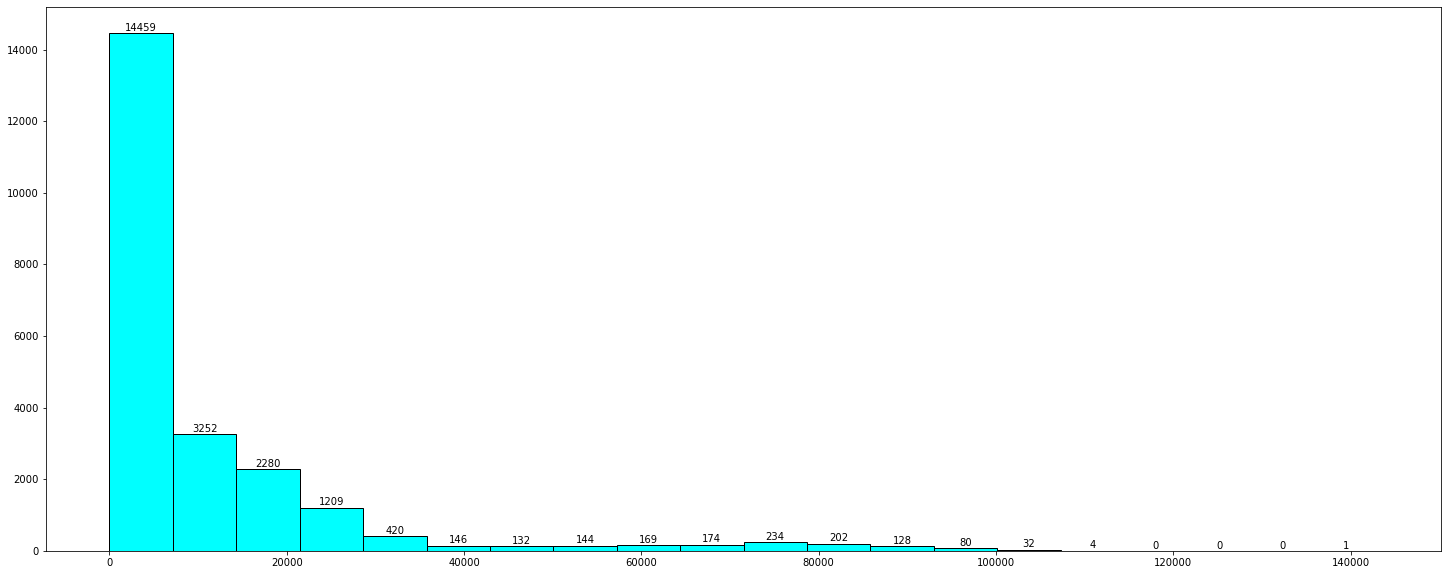

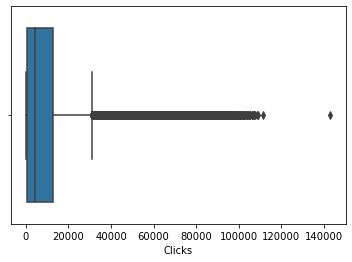

Description of Spend
----------------------------------------------------------------------------
count    23066.000000
mean      2706.625689
std       4067.927273
min          0.000000
25%         85.180000
50%       1425.125000
75%       3121.400000
max      26931.870000
Name: Spend, dtype: float64 Distribution of Spend
----------------------------------------------------------------------------
BoxPlot of Spend
----------------------------------------------------------------------------


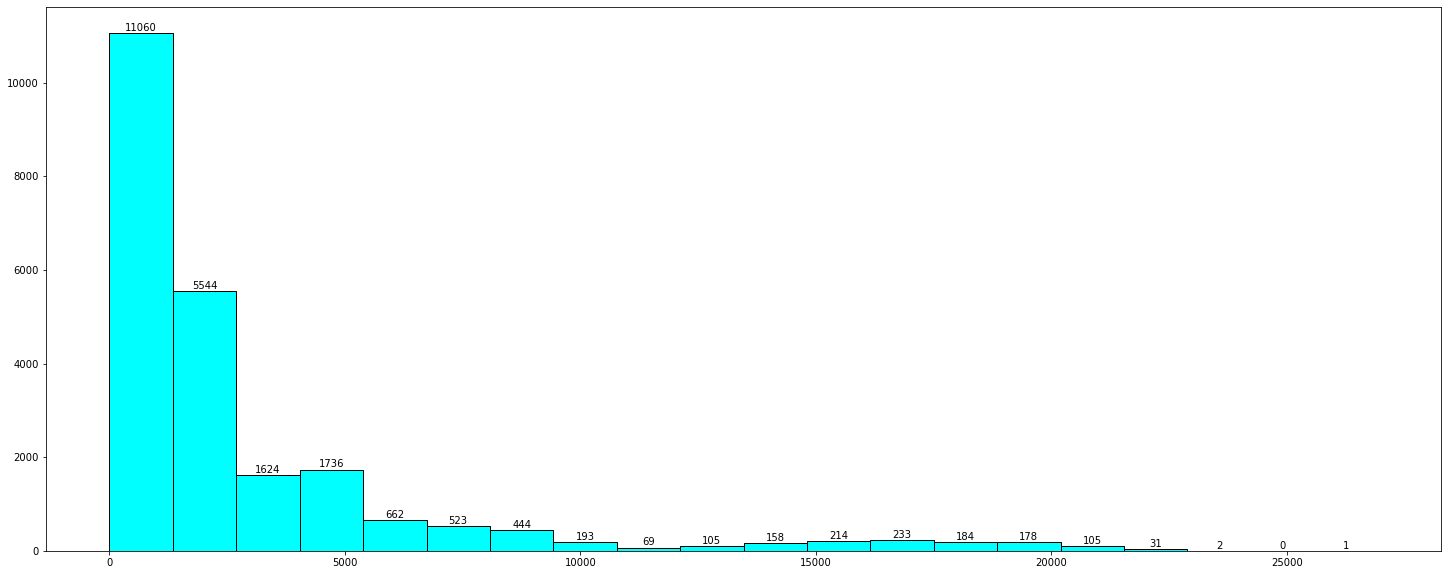

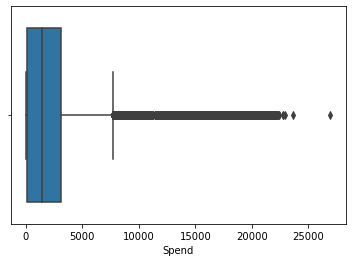

Description of Fee
----------------------------------------------------------------------------
count    23066.000000
mean         0.335123
std          0.031963
min          0.210000
25%          0.330000
50%          0.350000
75%          0.350000
max          0.350000
Name: Fee, dtype: float64 Distribution of Fee
----------------------------------------------------------------------------
BoxPlot of Fee
----------------------------------------------------------------------------


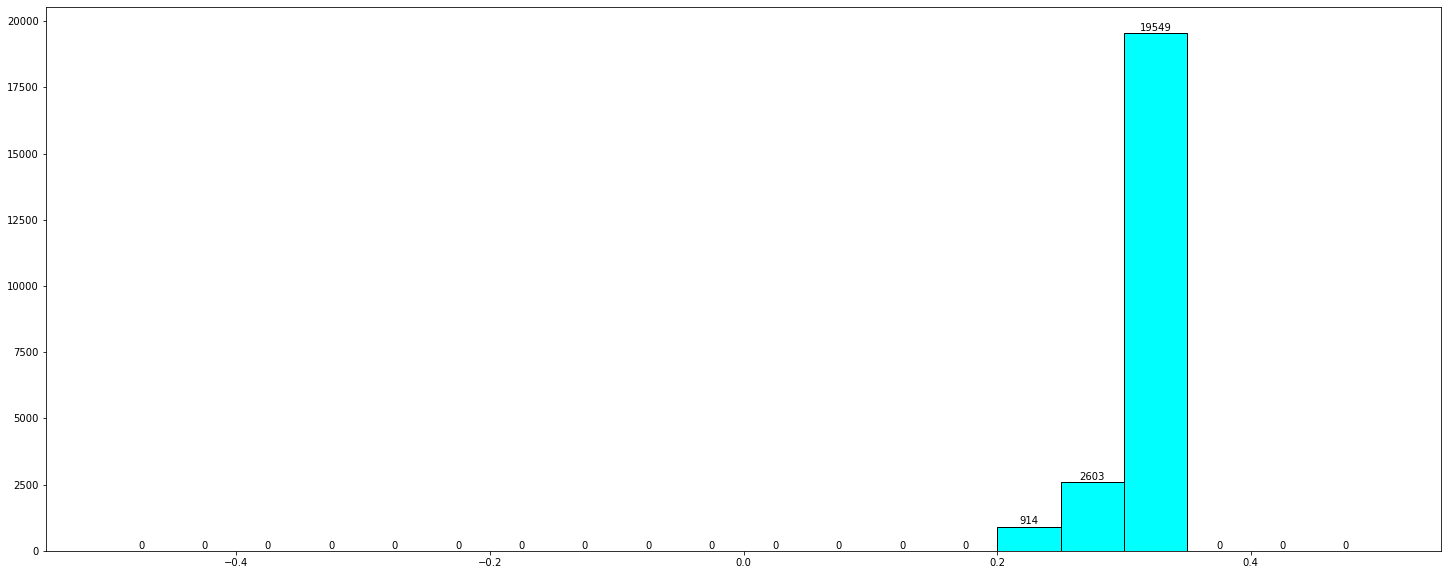

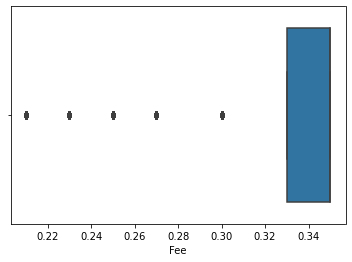

Description of Revenue
----------------------------------------------------------------------------
count    23066.000000
mean      1924.252331
std       3105.238410
min          0.000000
25%         55.365375
50%        926.335000
75%       2091.338150
max      21276.180000
Name: Revenue, dtype: float64 Distribution of Revenue
----------------------------------------------------------------------------
BoxPlot of Revenue
----------------------------------------------------------------------------


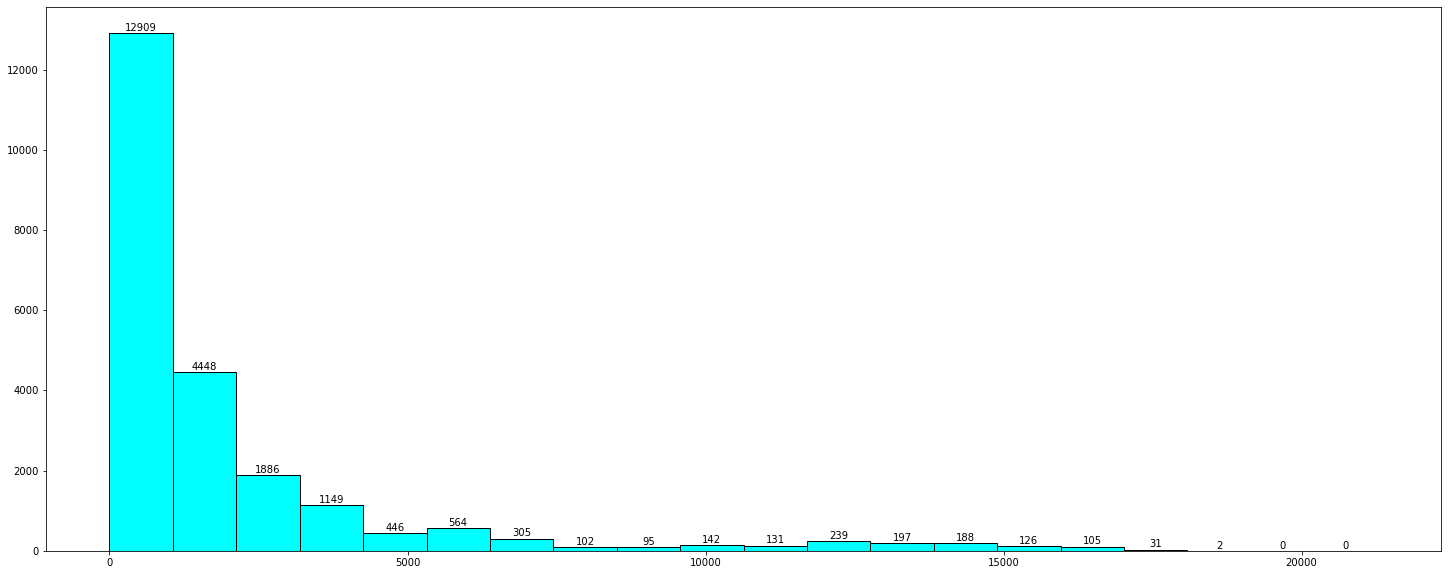

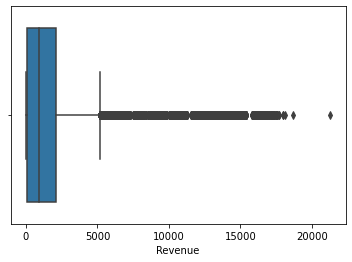

Description of CTR
----------------------------------------------------------------------------
count    23066.000000
mean         2.614863
std          7.853405
min          0.000100
25%          0.003400
50%          0.112650
75%          0.183778
max        200.000000
Name: CTR, dtype: float64 Distribution of CTR
----------------------------------------------------------------------------
BoxPlot of CTR
----------------------------------------------------------------------------


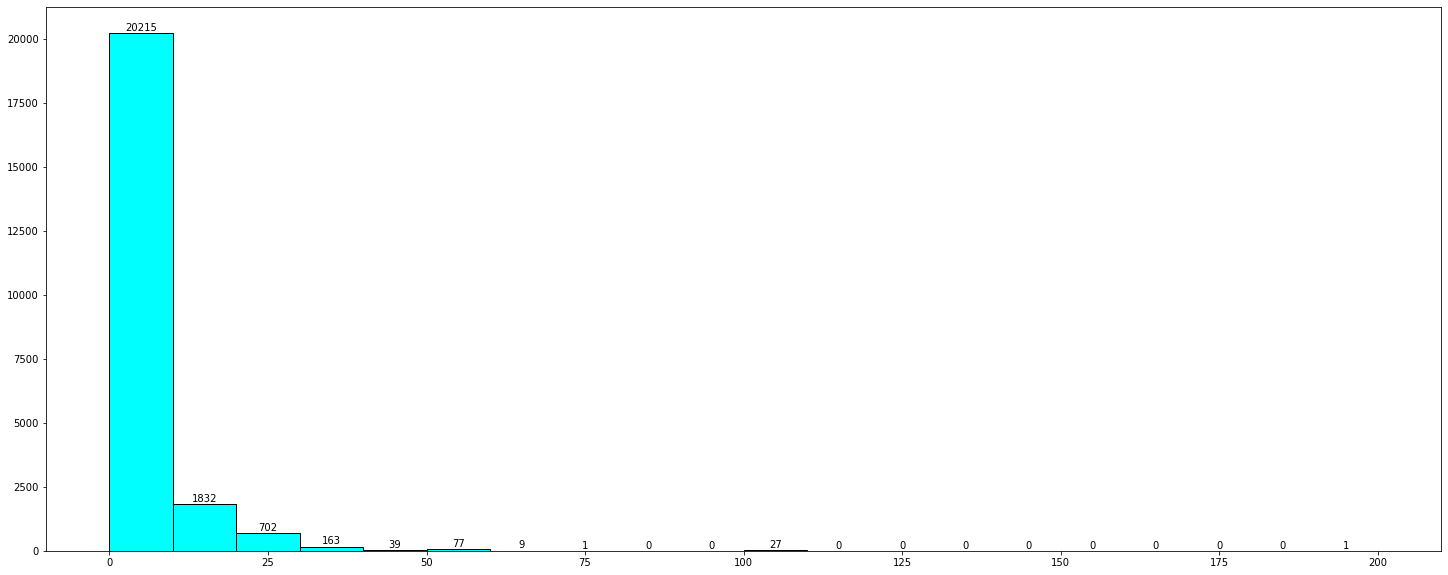

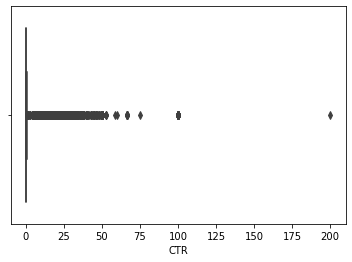

Description of CPM
----------------------------------------------------------------------------
count    23066.000000
mean         8.396730
std          9.057082
min          0.000000
25%          1.750000
50%          8.370742
75%         13.040000
max        715.000000
Name: CPM, dtype: float64 Distribution of CPM
----------------------------------------------------------------------------
BoxPlot of CPM
----------------------------------------------------------------------------


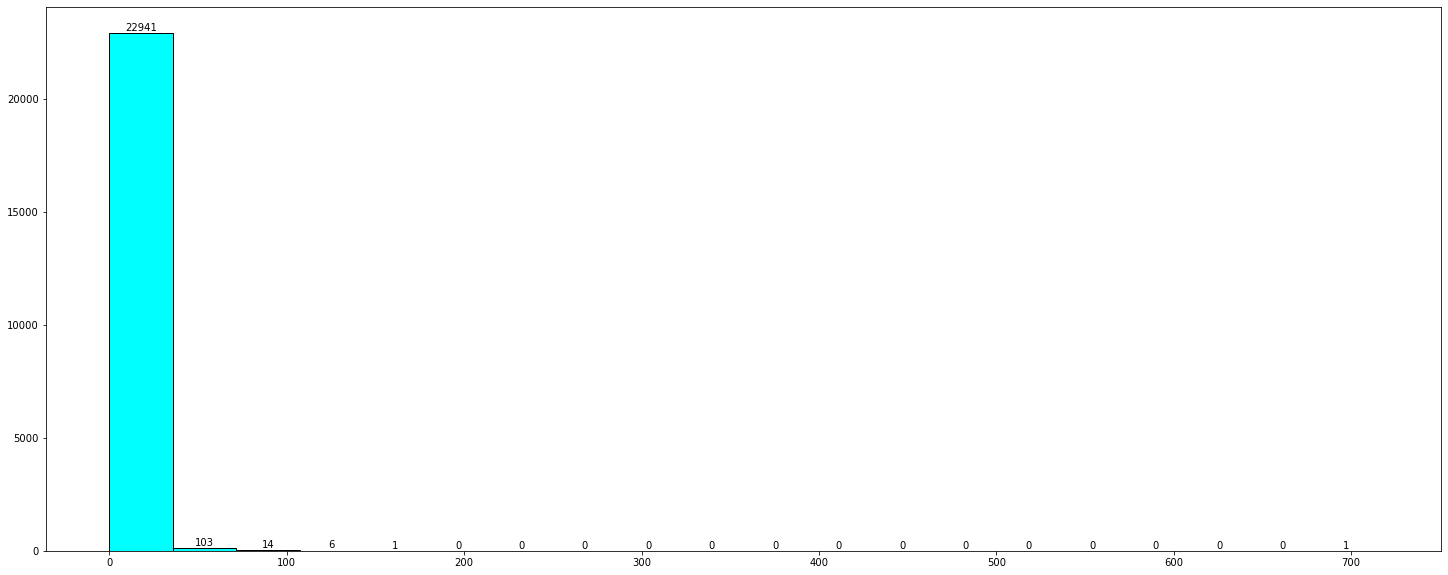

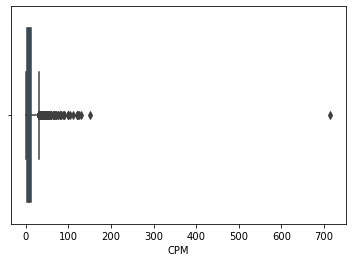

Description of CPC
----------------------------------------------------------------------------
count    23066.000000
mean        57.951825
std        186.556092
min          0.000000
25%          0.100000
50%          0.390000
75%          0.900000
max       1967.135883
Name: CPC, dtype: float64 Distribution of CPC
----------------------------------------------------------------------------
BoxPlot of CPC
----------------------------------------------------------------------------


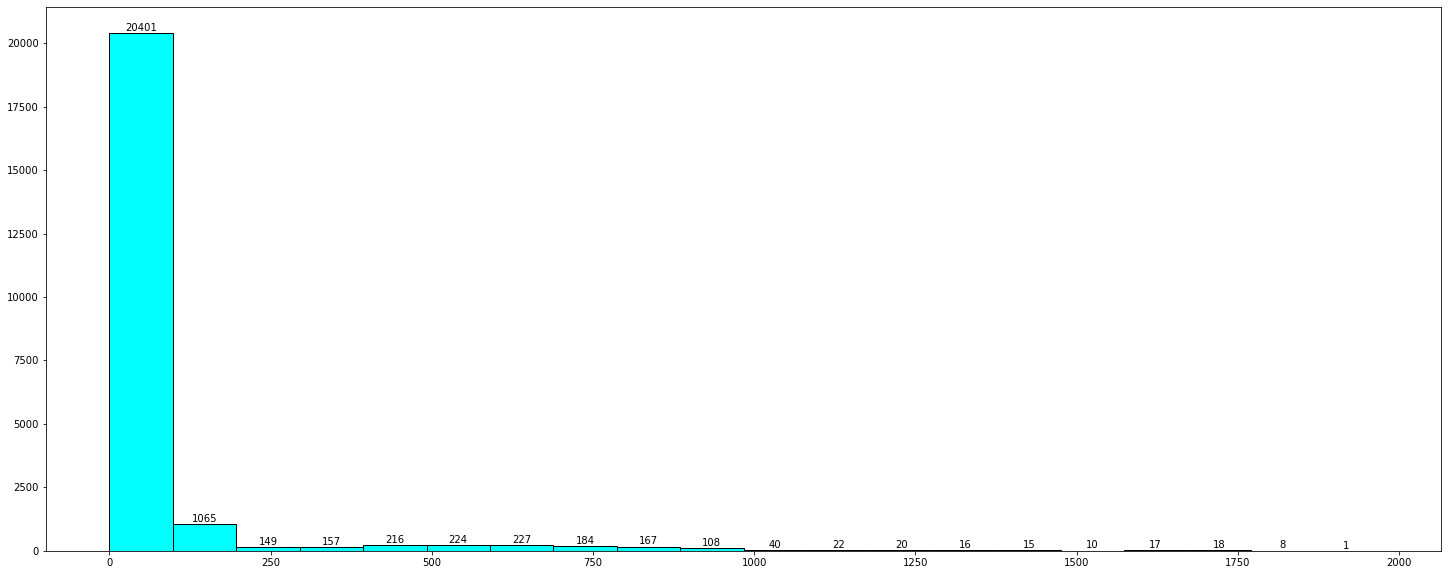

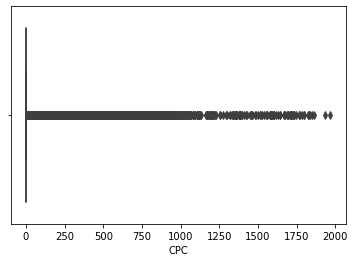

In [21]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

EDA for categorical variables

In [22]:
def univariateAnalysis_category(cat_column):
    print("Details of " + cat_column)
    print("----------------------------------------------------------------")
    print(ads_cat[cat_column].value_counts())
    plt.figure()
    plt.figure(figsize=(12, 8))
    plots = ads_cat[cat_column].value_counts().plot.bar(title="Frequency Distribution of " + cat_column)
    for bar in plots.patches:
        plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
    plt.show()
    print("       ")

In [23]:
ads_cat = ads.select_dtypes(include = ['object'])
lstcatcolumns = list(ads_cat.columns.values)
lstcatcolumns

['Timestamp', 'InventoryType', 'Ad Type', 'Platform', 'Device Type', 'Format']

Details of Timestamp
----------------------------------------------------------------
2020-11-13-22    13
2020-11-20-9     13
2020-11-14-23    13
2020-10-18-1     13
2020-9-23-15     13
                 ..
2020-9-2-5       10
2020-9-4-19      10
2020-9-2-11      10
2020-9-3-11       9
2020-9-1-16       2
Name: Timestamp, Length: 2018, dtype: int64


<Figure size 432x288 with 0 Axes>

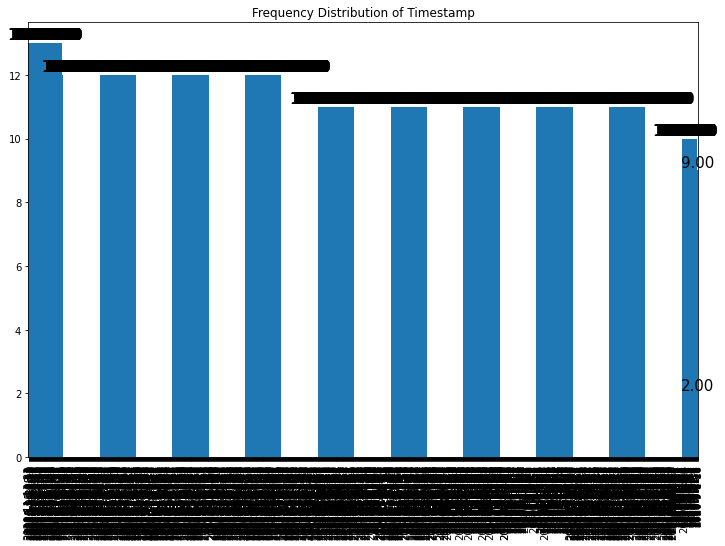

       
Details of InventoryType
----------------------------------------------------------------
Format4    7165
Format5    4249
Format1    3814
Format3    3540
Format6    1850
Format2    1789
Format7     659
Name: InventoryType, dtype: int64


<Figure size 432x288 with 0 Axes>

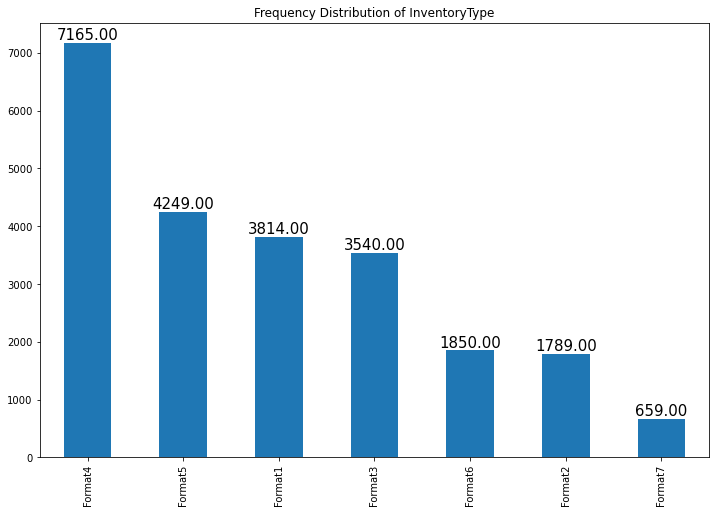

       
Details of Ad Type
----------------------------------------------------------------
Inter224    1658
Inter217    1655
Inter223    1654
Inter219    1650
Inter221    1650
            ... 
inter230    1644
Inter220    1644
Inter225    1643
Inter226    1640
Inter228    1639
Name: Ad Type, Length: 14, dtype: int64


<Figure size 432x288 with 0 Axes>

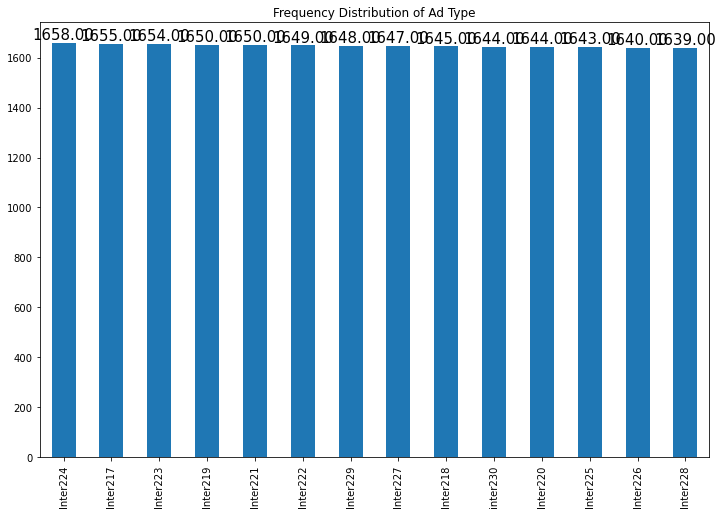

       
Details of Platform
----------------------------------------------------------------
Video    9873
Web      8251
App      4942
Name: Platform, dtype: int64


<Figure size 432x288 with 0 Axes>

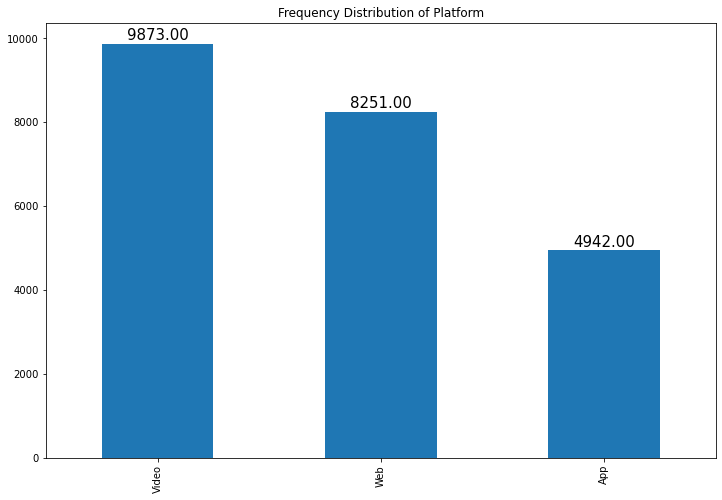

       
Details of Device Type
----------------------------------------------------------------
Mobile     14806
Desktop     8260
Name: Device Type, dtype: int64


<Figure size 432x288 with 0 Axes>

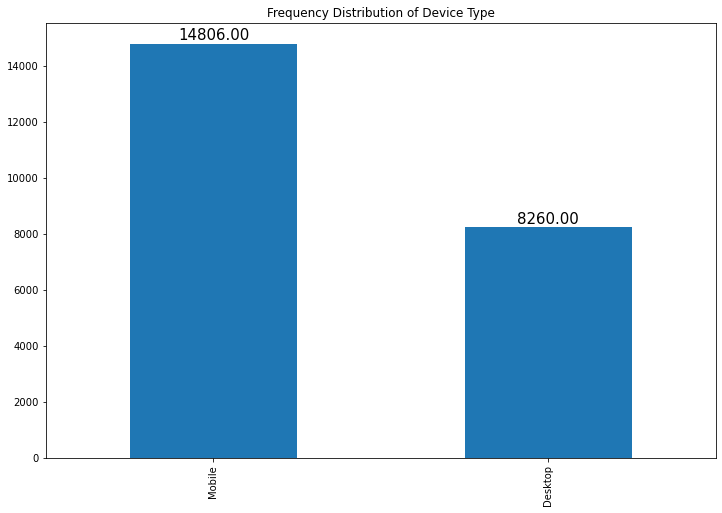

       
Details of Format
----------------------------------------------------------------
Video      11552
Display    11514
Name: Format, dtype: int64


<Figure size 432x288 with 0 Axes>

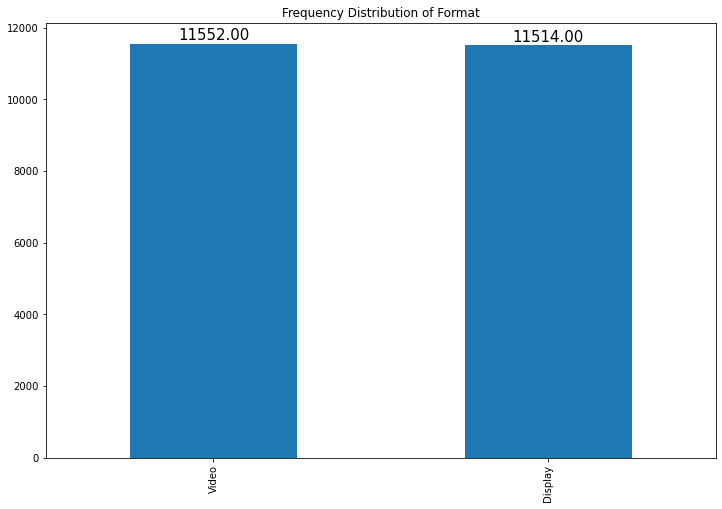

In [24]:
for x in lstcatcolumns:
    univariateAnalysis_category(x)

In [25]:
#Bivariate analysis

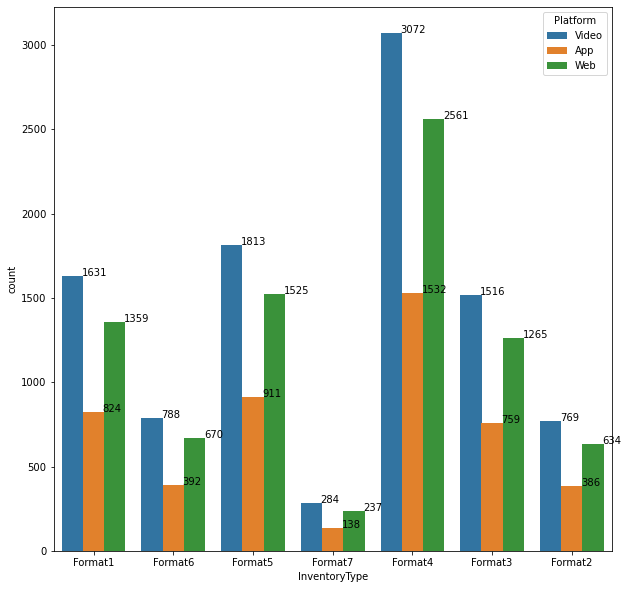

In [26]:
plt.figure(figsize=(10,10))
ax=sns.countplot(data=ads, x="InventoryType", hue="Platform") 
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

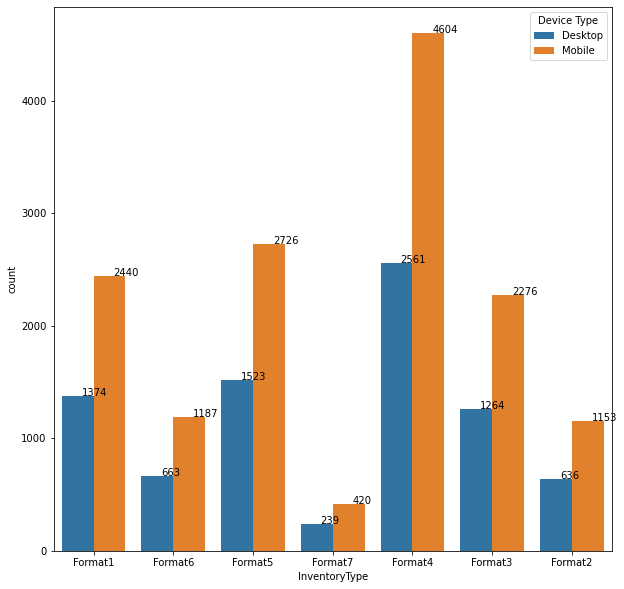

In [27]:
plt.figure(figsize=(10,10))
ax=sns.countplot(data=ads, x="InventoryType", hue="Device Type") 
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

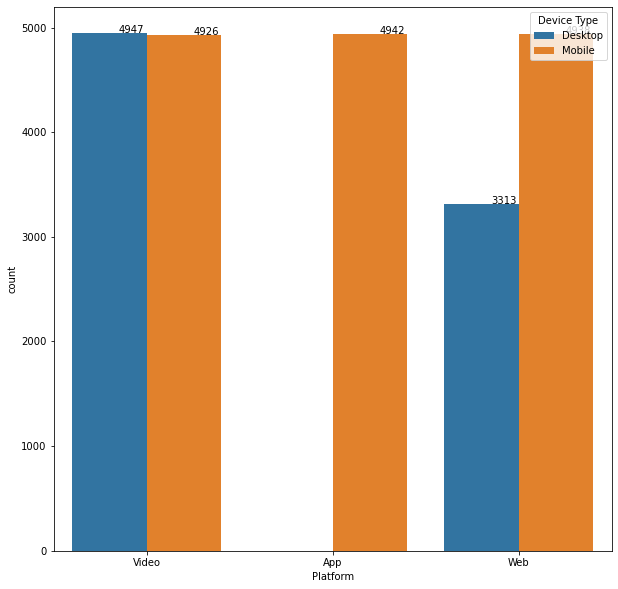

In [28]:
plt.figure(figsize=(10,10))
ax=sns.countplot(data=ads, x="Platform", hue="Device Type") 
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

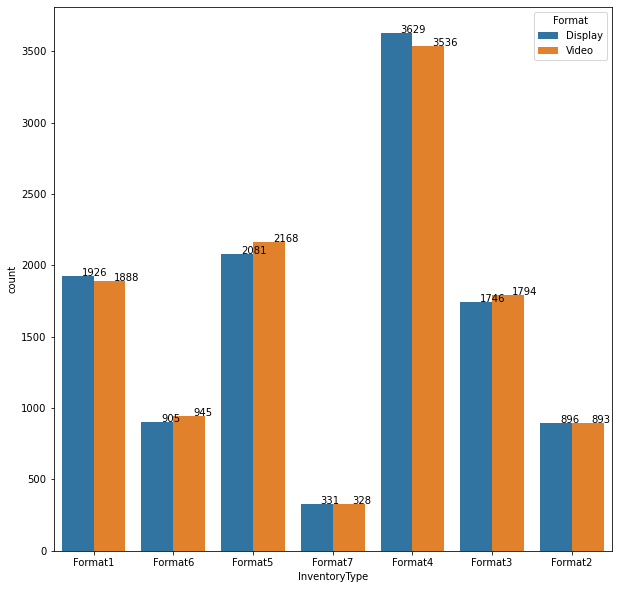

In [29]:
plt.figure(figsize=(10,10))
ax=sns.countplot(data=ads, x="InventoryType", hue="Format") 
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

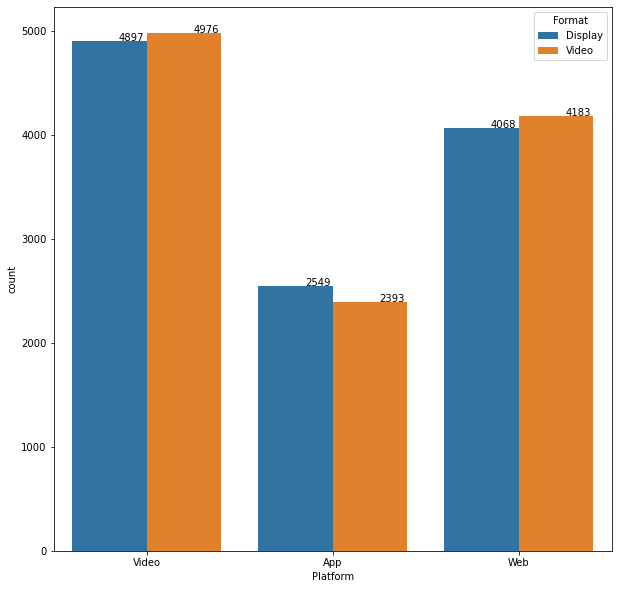

In [30]:
plt.figure(figsize=(10,10))
ax=sns.countplot(data=ads, x="Platform", hue="Format") 
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

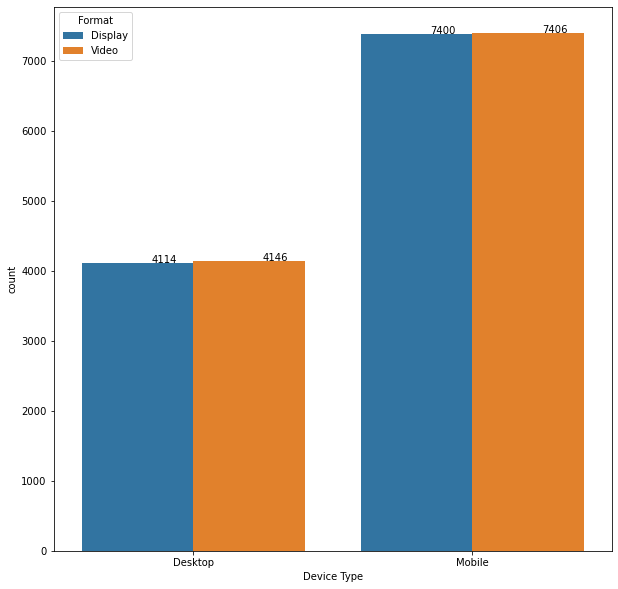

In [31]:
plt.figure(figsize=(10,10))
ax=sns.countplot(data=ads, x="Device Type", hue="Format") 
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_7444\2406605636.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


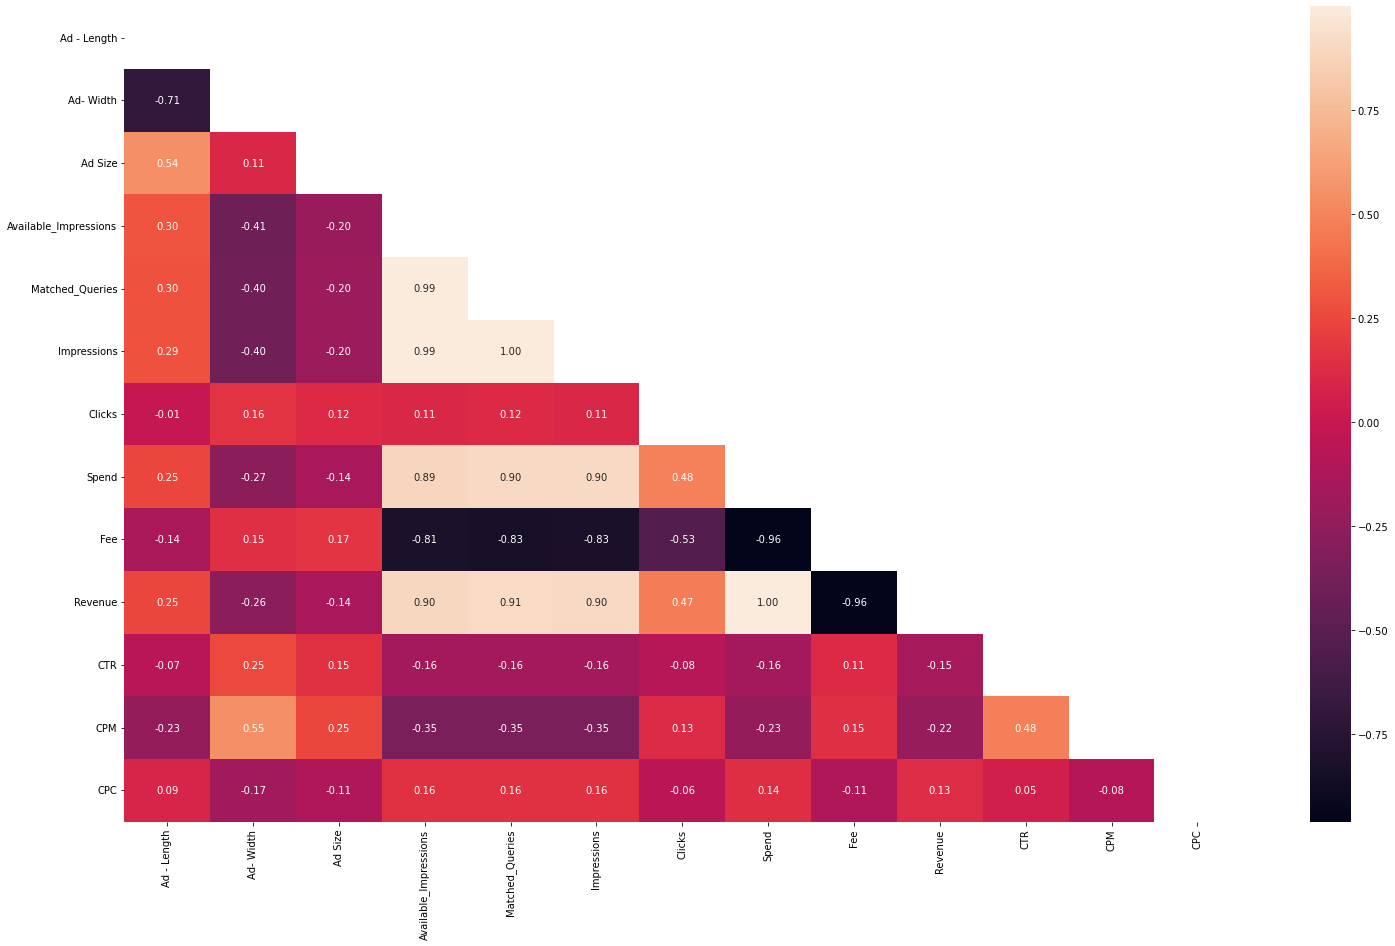

In [32]:
#correlation
corr = ads_num.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(25, 15))
sns.heatmap(ads_num.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

# Clustering: Data Preprocessing

The null values have been treated in the previous section. 

ValueError: num must be 1 <= num <= 12, not 13

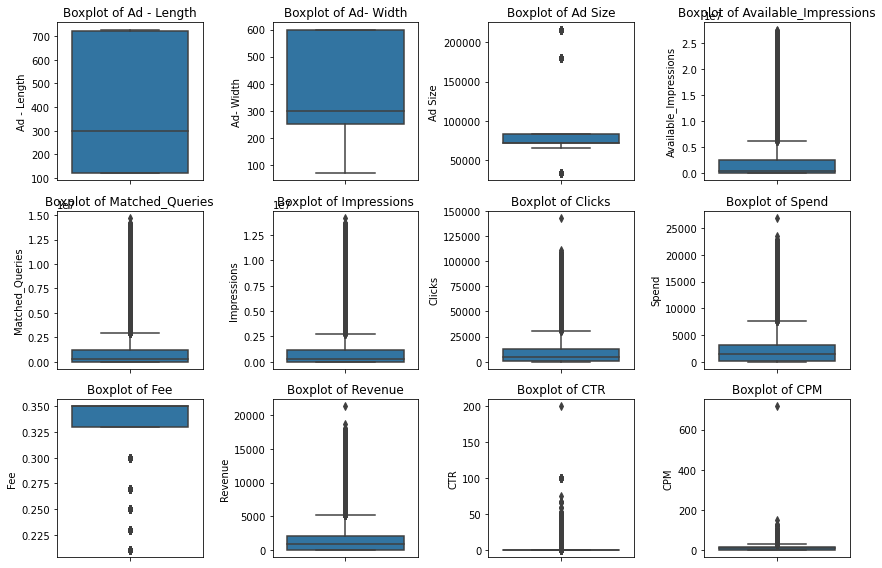

In [34]:
#Check for presence of outliers in each feature
plt.figure(figsize = (12,8))
feature_list = ads_num.columns
for i in range(len(feature_list)):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y = ads[feature_list[i]], data = ads_num)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [35]:
#Define a function which returns the Upper and Lower limit to detect outliers for each feature
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range  

In [36]:
#Cap & floor the values beyond the outlier boundaries
for i in feature_list:
    LL, UL = remove_outlier(ads_num[i])
    ads_num[i] = np.where(ads_num[i] > UL, UL, ads_num[i])
    ads_num[i] = np.where(ads_num[i] < LL, LL, ads_num[i])

ValueError: num must be 1 <= num <= 12, not 13

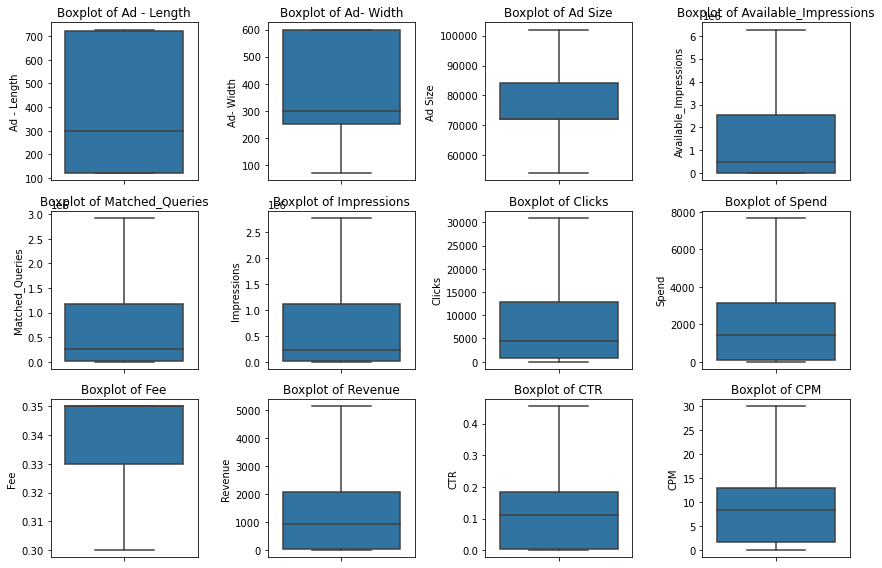

In [37]:
#Check to verify if outliers have been treated
plt.figure(figsize = (12,8))
feature_list = ads_num.columns
for i in range(len(feature_list)):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y = ads_num[feature_list[i]], data = ads_num)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [38]:
ads_num.describe().T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,3.851631e+02,2.336514e+02,120.0000,120.000000,300.000000,7.200000e+02,7.280000e+02
Ad- Width,23066.0,3.378960e+02,2.030929e+02,70.0000,250.000000,300.000000,6.000000e+02,6.000000e+02
Ad Size,23066.0,7.657684e+04,1.538132e+04,54000.0000,72000.000000,72000.000000,8.400000e+04,1.020000e+05
Available_Impressions,23066.0,1.607253e+06,2.125528e+06,1.0000,33672.250000,483771.000000,2.527712e+06,6.268771e+06
Matched_Queries,23066.0,7.995380e+05,1.026037e+06,1.0000,18282.500000,258087.500000,1.180700e+06,2.924326e+06
...,...,...,...,...,...,...,...,...
Fee,23066.0,3.402883e-01,1.812855e-02,0.3000,0.330000,0.350000,3.500000e-01,3.500000e-01
Revenue,23066.0,1.449389e+03,1.646894e+03,0.0000,55.365375,926.335000,2.091338e+03,5.145297e+03
CTR,23066.0,1.409023e-01,1.546286e-01,0.0001,0.003400,0.112650,1.837777e-01,4.543444e-01
CPM,23066.0,8.219063e+00,6.880549e+00,0.0000,1.750000,8.370742,1.304000e+01,2.997500e+01


In [39]:
from scipy.stats import zscore
scaled = ads_num.apply(zscore)
scaled.head()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,-0.364496,-0.432797,-0.102518,-0.755333,-0.778949,-0.768478,-0.867488,-0.89317,0.535724,-0.880093,-0.891201,-1.194562,-0.921749
1,-0.364496,-0.432797,-0.102518,-0.755345,-0.778988,-0.768516,-0.867488,-0.89317,0.535724,-0.880093,-0.888615,-1.194562,-0.921749
2,-0.364496,-0.432797,-0.102518,-0.754900,-0.778919,-0.768445,-0.867488,-0.89317,0.535724,-0.880093,-0.893142,-1.194562,-0.921749
3,-0.364496,-0.432797,-0.102518,-0.755040,-0.778781,-0.768302,-0.867488,-0.89317,0.535724,-0.880093,-0.898315,-1.194562,-0.921749
4,-0.364496,-0.432797,-0.102518,-0.755610,-0.779030,-0.768560,-0.867488,-0.89317,0.535724,-0.880093,-0.884734,-1.194562,-0.921749


In [40]:
scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,-4.030447e-15,1.000022,-1.134891,-1.134891,-0.364496,1.433093,1.467332
Ad- Width,23066.0,5.390161e-15,1.000022,-1.319110,-0.432797,-0.186599,1.290590,1.290590
Ad Size,23066.0,-4.156304e-15,1.000022,-1.467840,-0.297564,-0.297564,0.482620,1.652896
Available_Impressions,23066.0,-3.617510e-15,1.000022,-0.756182,-0.740341,-0.528577,0.433059,2.193158
Matched_Queries,23066.0,1.341008e-15,1.000022,-0.779265,-0.761447,-0.527722,0.371498,2.070914
...,...,...,...,...,...,...,...,...
Fee,23066.0,-2.322121e-14,1.000022,-2.222416,-0.567532,0.535724,0.535724,0.535724
Revenue,23066.0,3.136228e-15,1.000022,-0.880093,-0.846474,-0.317607,0.389803,2.244218
CTR,23066.0,-2.223858e-14,1.000022,-0.910603,-0.889261,-0.182714,0.277286,2.027108
CPM,23066.0,-6.707353e-16,1.000022,-1.194562,-0.940216,0.022045,0.700677,3.162016


In [41]:
scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Ad - Length            23066 non-null  float64
 1   Ad- Width              23066 non-null  float64
 2   Ad Size                23066 non-null  float64
 3   Available_Impressions  23066 non-null  float64
 4   Matched_Queries        23066 non-null  float64
 5   Impressions            23066 non-null  float64
 6   Clicks                 23066 non-null  float64
 7   Spend                  23066 non-null  float64
 8   Fee                    23066 non-null  float64
 9   Revenue                23066 non-null  float64
 10  CTR                    23066 non-null  float64
 11  CPM                    23066 non-null  float64
 12  CPC                    23066 non-null  float64
dtypes: float64(13)
memory usage: 2.3 MB


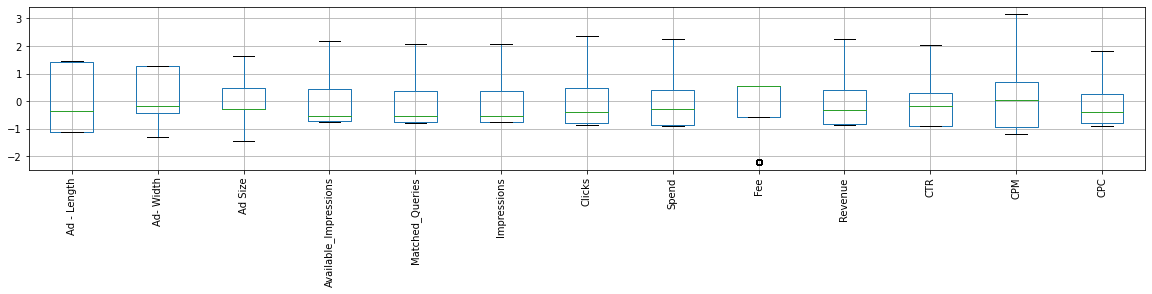

In [42]:
scaled.boxplot(figsize=(20,3))
plt.xticks(rotation=90)
plt.show()

# Clustering: Hierarchical Clustering

In [43]:
#hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage

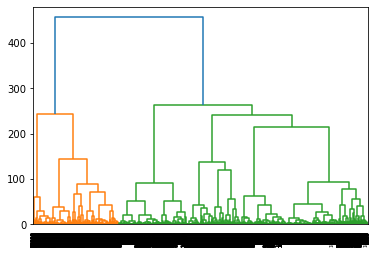

In [44]:
wardlink = linkage(scaled, method = 'ward')
dend = dendrogram(wardlink)

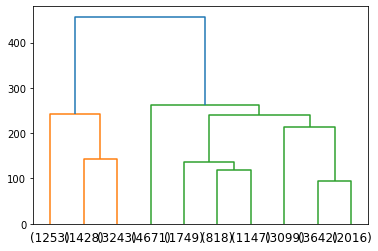

In [47]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [48]:
from scipy.cluster.hierarchy import fcluster

In [49]:
clusters = fcluster(wardlink, 290, criterion='distance')
clusters

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [50]:
ads['clusters'] = clusters

In [51]:
ads.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,clusters
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.0031,0.0,0.0,2
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.0035,0.0,0.0,2
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.0028,0.0,0.0,2
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.0,0.35,0.0,0.0020,0.0,0.0,2
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.0,0.35,0.0,0.0041,0.0,0.0,2


In [53]:
csv_path = 'path/to/your/file.csv'
csv_path = 'D:/dsba/projects/clustered-ads.csv'

# Write DataFrame to CSV
ads.to_csv(csv_path, index=False)

# Clustering: K-means Clustering

In [60]:
from sklearn.cluster import KMeans

In [61]:
k_means = KMeans(n_clusters = 2,random_state=1)
k_means.fit(scaled)
KMeans(n_clusters=2, random_state=1)

KMeans(n_clusters=2, random_state=1)

In [62]:
k_means.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [63]:
#Within Cluster Sum of Squares (wss)
round(k_means.inertia_,2)

193663.1

In [64]:
#Forming clusters with K = 1,3,4,5,6 and comparing the WSS
k_means = KMeans(n_clusters = 1,random_state=1)
k_means.fit(scaled)
round(k_means.inertia_,2)

299858.0

In [65]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled)
round(k_means.inertia_,2)

151986.94

In [66]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(scaled)
round(k_means.inertia_,2)

119108.82

In [67]:
k_means = KMeans(n_clusters = 5,random_state=1)
k_means.fit(scaled)
round(k_means.inertia_,2)

87476.06

In [68]:
k_means = KMeans(n_clusters = 6,random_state=1)
k_means.fit(scaled)
round(k_means.inertia_,2)

71854.0

WSS reduces as K keeps increasing.

Calculating WSS for other values of K - Elbow Method

In [69]:
wss =[] 
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(scaled)
    wss.append(round(KM.inertia_,2))

In [70]:
wss

[299858.0,
 193663.1,
 151986.94,
 119108.82,
 87476.06,
 71854.0,
 62759.32,
 53762.28,
 46385.68,
 41350.51]

In [71]:
a=[1,2,3,4,5,6,7,8,9,10]

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

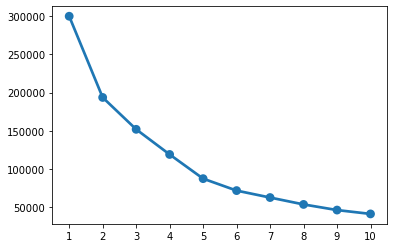

In [72]:
sns.pointplot(a, wss)

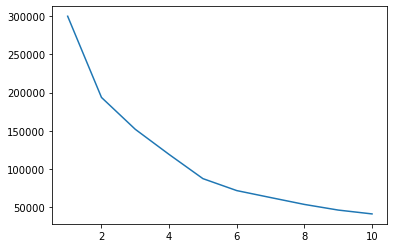

In [73]:
plt.plot(range(1,11), wss)

In [79]:
#KMeans with K=2
k_means = KMeans(n_clusters = 2,random_state=1)
k_means.fit(scaled)
labels = k_means.labels_
from sklearn.metrics import silhouette_samples, silhouette_score

In [80]:
#Cluster evaluation for 2 clusters: the silhouette score 
silhouette_score(scaled,labels,random_state=1)

0.3932561565198712

In [81]:
#KMeans with K=3
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled)
labels = k_means.labels_

In [82]:
silhouette_score(scaled,labels,random_state=1)

0.3071501281160564

In [83]:
#KMeans with K=4
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(scaled)
labels = k_means.labels_

In [84]:
silhouette_score(scaled,labels,random_state=1)

0.38927813668409217

In [85]:
#KMeans with K=5
k_means = KMeans(n_clusters = 5,random_state=1)
k_means.fit(scaled)
labels = k_means.labels_
silhouette_score(scaled,labels,random_state=1)

0.4455995533656206

In [103]:
#KMeans with K=6
k_means = KMeans(n_clusters = 6,random_state=1)
k_means.fit(scaled)
labels = k_means.labels_
silhouette_score(scaled,labels,random_state=1)

0.46575593494092354

In [104]:
#KMeans with K=7
k_means = KMeans(n_clusters = 7,random_state=1)
k_means.fit(scaled)
labels = k_means.labels_
silhouette_score(scaled,labels,random_state=1)

0.46131199431193004

    The optimum number of clusters is for k = 6, i.e. clusters 0, 1, 2, 3, 4, 5.

In [105]:
#KMeans with K=6
k_means = KMeans(n_clusters = 6,random_state=1)
k_means.fit(scaled)
labels = k_means.labels_
silhouette_score(scaled,labels,random_state=1)

0.46575593494092354

In [106]:
#Appending Clusters to the original dataset

In [107]:
ads["Clus_kmeans"] = labels
ads.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,...,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,clusters,Clus_kmeans
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,...,323,1,0.0,0.35,0.0,0.0031,0.0,0.0,2,2
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,...,285,1,0.0,0.35,0.0,0.0035,0.0,0.0,2,2
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,...,355,1,0.0,0.35,0.0,0.0028,0.0,0.0,2,2
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,...,495,1,0.0,0.35,0.0,0.0020,0.0,0.0,2,2
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,...,242,1,0.0,0.35,0.0,0.0041,0.0,0.0,2,2


In [108]:
ads['Clus_kmeans'].value_counts()

2    6063
0    4973
3    4040
4    3663
5    2820
1    1507
Name: Clus_kmeans, dtype: int64

In [109]:
#Silhouette Analysis

In [110]:
from sklearn.metrics import silhouette_score
range_n_clusters=[2,3,4,5,6,7,8,9,10]
for num_clusters in range_n_clusters:
    
    # initialize K means
    kmeans=KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(scaled)
    cluster_labels=kmeans.labels_
    #Silhouette Score
    silhouette_avg = silhouette_score(scaled,cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.3932561565198712
For n_clusters=3, the silhouette score is 0.30716308427464184
For n_clusters=4, the silhouette score is 0.38928044688821073
For n_clusters=5, the silhouette score is 0.4456101369724424
For n_clusters=6, the silhouette score is 0.46578764296561953
For n_clusters=7, the silhouette score is 0.4612993260631106
For n_clusters=8, the silhouette score is 0.49024324848326967
For n_clusters=9, the silhouette score is 0.5098023825328091
For n_clusters=10, the silhouette score is 0.5077423641698394


In [111]:
#Cluster Profiling

In [112]:
ads.Clus_kmeans.value_counts().sort_index()

0    4973
1    1507
2    6063
3    4040
4    3663
5    2820
Name: Clus_kmeans, dtype: int64

In [194]:
clust_profile=ads.groupby('Clus_kmeans').mean()
clust_profile['freq']=ads.Clus_kmeans.value_counts().sort_index()
clust_profile.T

Clus_kmeans,0,1,2,3,4,5
Ad - Length,154.602855,140.233577,4.263269e+02,4.656149e+02,671.426699,347.042553
Ad- Width,559.601850,573.988056,1.402837e+02,1.993366e+02,308.490308,482.322695
Ad Size,79248.743213,75400.132714,5.185801e+04,7.521959e+04,203829.647830,126677.659574
Available_Impressions,58570.012869,814312.321168,1.842541e+06,1.041504e+07,318841.528529,57833.497872
Matched_Queries,33171.650111,572667.611812,8.816976e+05,5.639272e+06,169279.338247,34156.909220
Impressions,25580.851599,483060.311214,8.430617e+05,5.460381e+06,145054.111111,27995.592553
Clicks,2177.394933,66006.355674,3.305285e+03,1.127562e+04,16488.094458,3553.767021
Spend,252.944812,7060.567034,1.530991e+03,8.663623e+03,1436.591518,350.066195
Fee,0.349984,0.287445,3.491786e-01,2.903267e-01,0.349339,0.349887
Revenue,164.464013,5071.300161,9.978016e+02,6.386974e+03,936.021468,227.936613


# Part 2:

# PCA: Define the problem and perform Exploratory Data Analysis

- Problem Definition - Check shape, Data types, statistical summary - Perform an EDA on the data to extract useful insights Note: 1. Pick 5 variables out of the given 24 variables below for EDA: No_HH, TOT_M, TOT_F, M_06, F_06, M_SC, F_SC, M_ST, F_ST, M_LIT, F_LIT, M_ILL, F_ILL, TOT_WORK_M, TOT_WORK_F, MAINWORK_M, MAINWORK_F, MAIN_CL_M, MAIN_CL_F, MAIN_AL_M, MAIN_AL_F, MAIN_HH_M, MAIN_HH_F, MAIN_OT_M, MAIN_OT_F 2. Example questions to answer from EDA - (i) Which state has highest gender ratio and which has the lowest? (ii) Which district has the highest & lowest gender ratio?

In [114]:
#Load the Data
df=pd.read_excel(r'D:\dsba\ml - 1\PCA_India_Data_Census.xlsx')
df.head()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,...,525,715,123,229,186,148,76,178,140,160
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,...,114,188,44,89,3,34,0,4,67,61
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,...,194,247,61,128,13,50,4,10,116,59
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,...,874,1928,465,1043,205,302,24,105,180,478


In [115]:
#Check the appropriateness of datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [116]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
State Code,640.0,17.114062,9.426486,1.0,9.00,18.0,24.00,35.0
Dist.Code,640.0,320.500000,184.896367,1.0,160.75,320.5,480.25,640.0
No_HH,640.0,51222.871875,48135.405475,350.0,19484.00,35837.0,68892.00,310450.0
TOT_M,640.0,79940.576563,73384.511114,391.0,30228.00,58339.0,107918.50,485417.0
TOT_F,640.0,122372.084375,113600.717282,698.0,46517.75,87724.5,164251.75,750392.0
...,...,...,...,...,...,...,...,...
MARG_HH_0_3_F,640.0,1293.431250,1585.377936,0.0,298.00,717.0,1710.75,13714.0
MARG_OT_0_3_M,640.0,71.379688,107.897627,0.0,14.00,35.0,79.00,895.0
MARG_OT_0_3_F,640.0,200.742188,309.740854,0.0,43.00,113.0,240.00,3354.0
NON_WORK_M,640.0,510.014063,610.603187,0.0,161.00,326.0,604.50,6456.0


In [117]:
df['TOT_M'].describe()

count       640.000000
mean      79940.576563
std       73384.511114
min         391.000000
25%       30228.000000
50%       58339.000000
75%      107918.500000
max      485417.000000
Name: TOT_M, dtype: float64

In [118]:
df['TOT_F'].describe()

count       640.000000
mean     122372.084375
std      113600.717282
min         698.000000
25%       46517.750000
50%       87724.500000
75%      164251.750000
max      750392.000000
Name: TOT_F, dtype: float64

In [119]:
df['M_LIT'].describe()

count       640.000000
mean      57967.979688
std       55910.282466
min         286.000000
25%       21298.000000
50%       42693.500000
75%       77989.500000
max      403261.000000
Name: M_LIT, dtype: float64

In [120]:
df['F_LIT'].describe()

count       640.000000
mean      66359.565625
std       75037.860207
min         371.000000
25%       20932.000000
50%       43796.500000
75%       84799.750000
max      571140.000000
Name: F_LIT, dtype: float64

In [121]:
df['TOT_WORK_M'].describe()

count       640.000000
mean      37992.407813
std       36419.537491
min         100.000000
25%       13753.500000
50%       27936.500000
75%       50226.750000
max      269422.000000
Name: TOT_WORK_M, dtype: float64

In [122]:
df['TOT_WORK_F'].describe()

count       640.000000
mean      41295.760938
std       37192.360943
min         357.000000
25%       16097.750000
50%       30588.500000
75%       53234.250000
max      257848.000000
Name: TOT_WORK_F, dtype: float64

Questions:
 1. Which state has the highest gender ratio and which has the lowest? 
 2. Which district has the highest & lowest gender ratio? 
 3. Statewsie percentage of working male and female
 4. Statewsie percentage of literate male and female

# PCA: Data Preprocessing

In [123]:
df.State.value_counts()

Uttar Pradesh             71
Madhya Pradesh            50
Bihar                     38
Maharashtra               35
Rajasthan                 33
                          ..
Goa                        2
Daman & Diu                2
Lakshadweep                1
Chandigarh                 1
Dadara & Nagar Havelli     1
Name: State, Length: 35, dtype: int64

In [124]:
#check duplicate
df.duplicated().sum()

0

In [125]:
df['Area Name'].value_counts()

Raigarh          2
Bijapur          2
Aurangabad       2
Hamirpur         2
Bilaspur         2
                ..
Darbhanga        1
Muzaffarpur      1
Gopalganj        1
Siwan            1
South Andaman    1
Name: Area Name, Length: 635, dtype: int64

In [126]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    
    
    plt.figure(figsize=[25,10])
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    a=round(df[column].min())
    b=round(df[column].max())
    freq, bins, patches = plt.hist(df[column], bins=nbins, range=[a,b], edgecolor='Black', color='cyan')
    bin_centers = np.diff(bins)*0.5 + bins[:-1]
    n = 0
    for fr, x, patch in zip(freq, bin_centers, patches):
      height = int(freq[n])
      plt.annotate("{}".format(height),
               xy = (x, height),             # top left corner of the histogram bar
               xytext = (0,0.2),             # offsetting label position above its bar
               textcoords = "offset points", # Offset (in points) from the *xy* value
               ha = 'center', va = 'bottom'
               )
      n = n+1

    #plt.legend()
    #plt.xticks(range(a,b,round((b-a)/nbins)))
    plt.show;
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    #ax.legend()
    plt.show()

In [127]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

59

In [128]:
df_num.head()

,State Code,Dist.Code,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,7707,23388,29796,5862,6196,3,0,1999,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,6218,19585,23102,4482,3733,7,6,427,...,525,715,123,229,186,148,76,178,140,160
2,1,3,4452,6546,10964,1082,1018,3,6,5806,...,114,188,44,89,3,34,0,4,67,61
3,1,4,1320,2784,4206,563,677,0,0,2666,...,194,247,61,128,13,50,4,10,116,59
4,1,5,11654,20591,29981,5157,4587,20,33,7670,...,874,1928,465,1043,205,302,24,105,180,478


In [129]:
df_num.drop(['State Code','Dist.Code'], axis=1, inplace=True)

In [130]:
df_num.head()

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,7707,23388,29796,5862,6196,3,0,1999,2598,13381,...,1150,749,180,237,680,252,32,46,258,214
1,6218,19585,23102,4482,3733,7,6,427,517,10513,...,525,715,123,229,186,148,76,178,140,160
2,4452,6546,10964,1082,1018,3,6,5806,9723,4534,...,114,188,44,89,3,34,0,4,67,61
3,1320,2784,4206,563,677,0,0,2666,3968,1842,...,194,247,61,128,13,50,4,10,116,59
4,11654,20591,29981,5157,4587,20,33,7670,10843,13243,...,874,1928,465,1043,205,302,24,105,180,478


Description of State Code
----------------------------------------------------------------------------
count    640.000000
mean      17.114062
std        9.426486
min        1.000000
25%        9.000000
50%       18.000000
75%       24.000000
max       35.000000
Name: State Code, dtype: float64 Distribution of State Code
----------------------------------------------------------------------------
BoxPlot of State Code
----------------------------------------------------------------------------


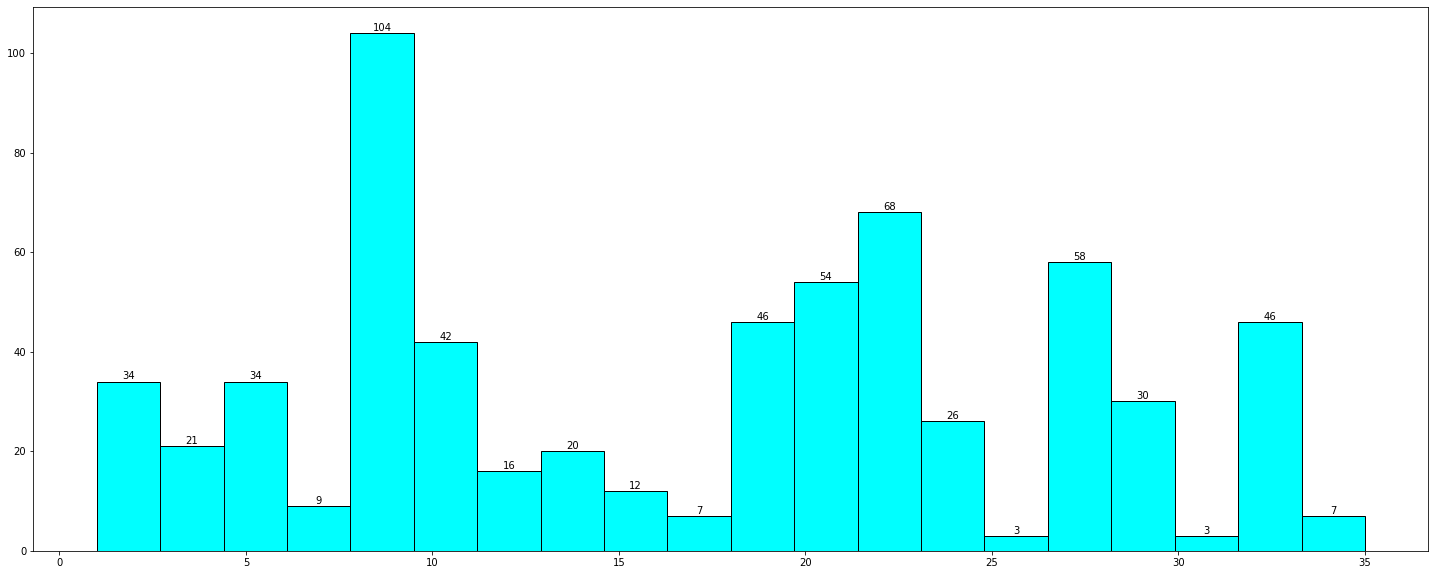

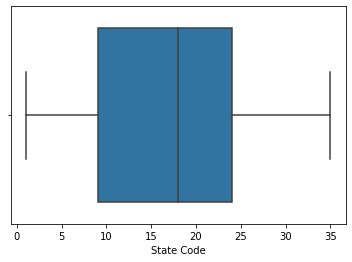

Description of Dist.Code
----------------------------------------------------------------------------
count    640.000000
mean     320.500000
std      184.896367
min        1.000000
25%      160.750000
50%      320.500000
75%      480.250000
max      640.000000
Name: Dist.Code, dtype: float64 Distribution of Dist.Code
----------------------------------------------------------------------------
BoxPlot of Dist.Code
----------------------------------------------------------------------------


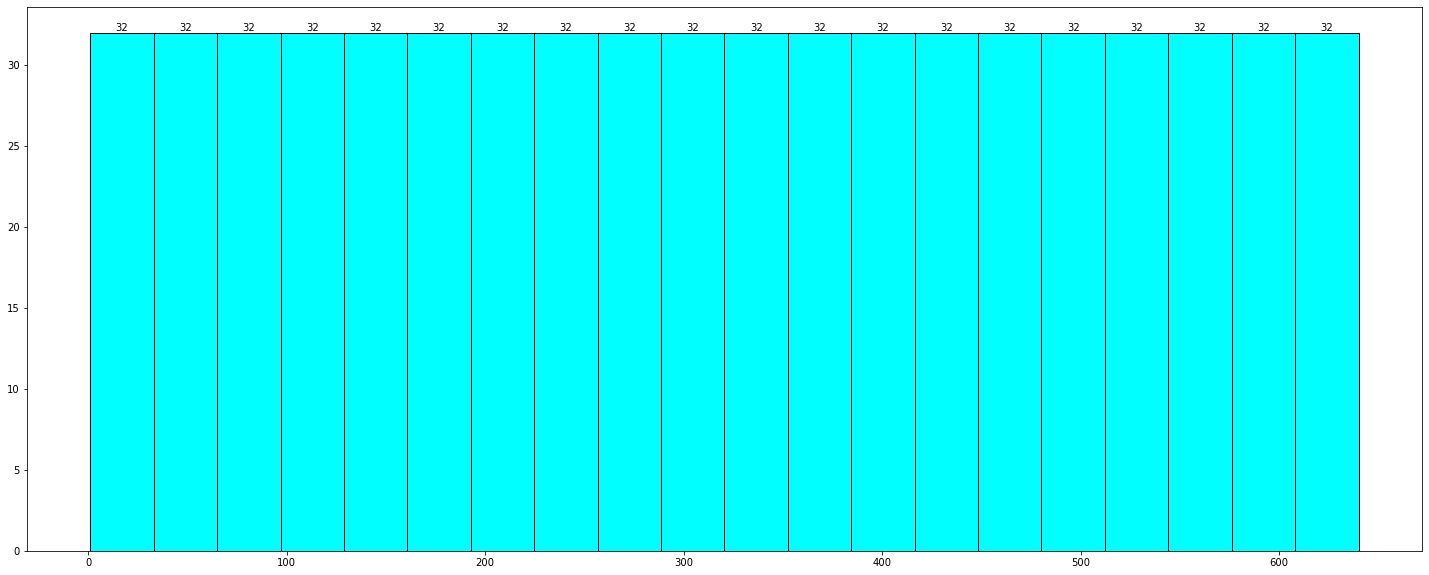

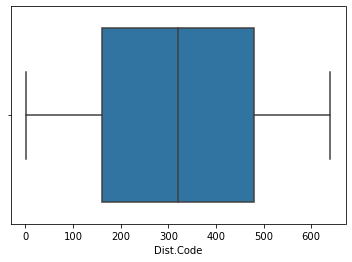

Description of No_HH
----------------------------------------------------------------------------
count       640.000000
mean      51222.871875
std       48135.405475
min         350.000000
25%       19484.000000
50%       35837.000000
75%       68892.000000
max      310450.000000
Name: No_HH, dtype: float64 Distribution of No_HH
----------------------------------------------------------------------------
BoxPlot of No_HH
----------------------------------------------------------------------------


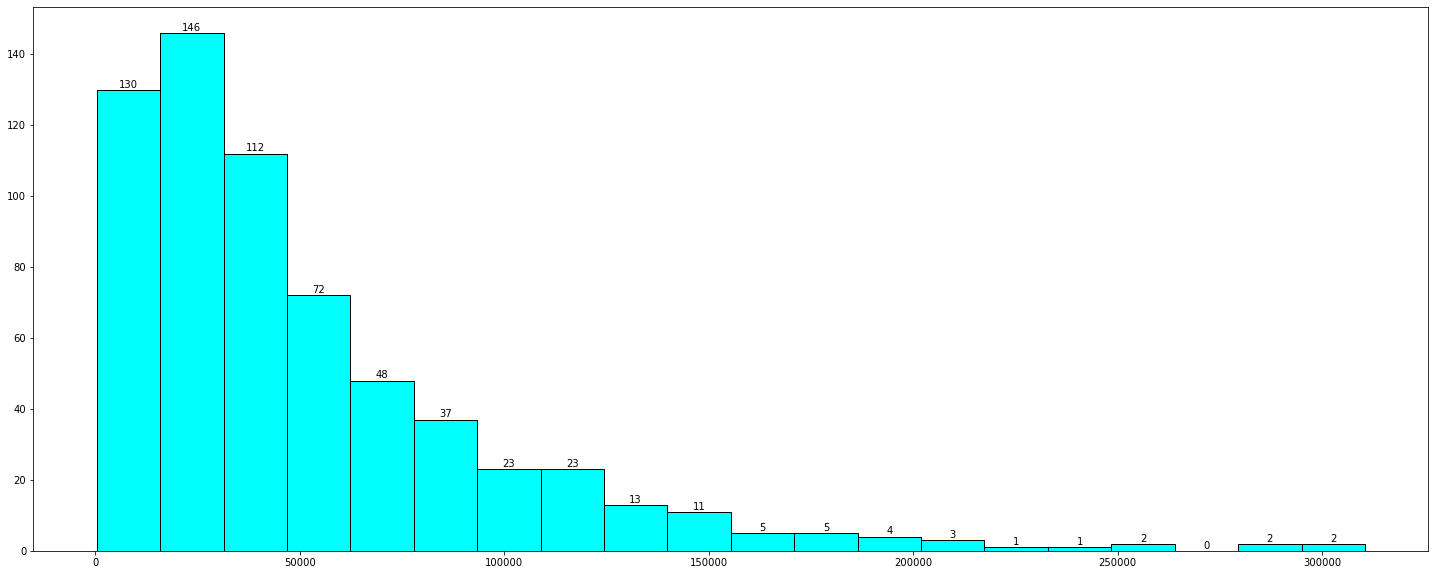

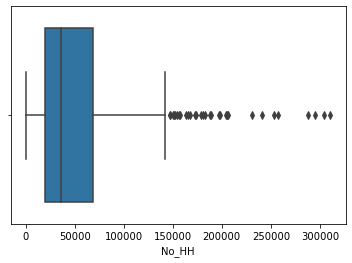

Description of TOT_M
----------------------------------------------------------------------------
count       640.000000
mean      79940.576563
std       73384.511114
min         391.000000
25%       30228.000000
50%       58339.000000
75%      107918.500000
max      485417.000000
Name: TOT_M, dtype: float64 Distribution of TOT_M
----------------------------------------------------------------------------
BoxPlot of TOT_M
----------------------------------------------------------------------------


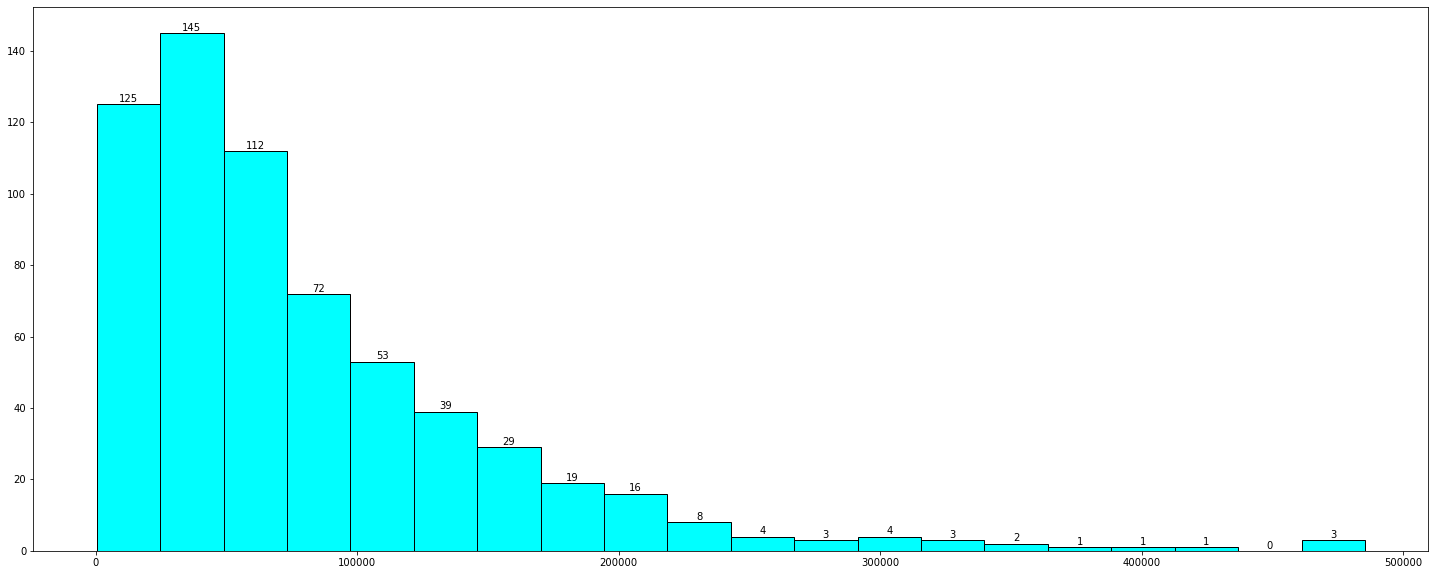

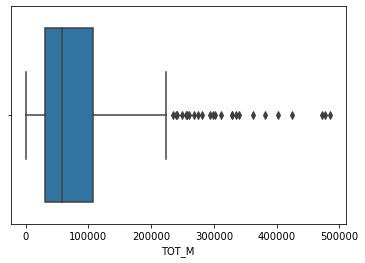

Description of TOT_F
----------------------------------------------------------------------------
count       640.000000
mean     122372.084375
std      113600.717282
min         698.000000
25%       46517.750000
50%       87724.500000
75%      164251.750000
max      750392.000000
Name: TOT_F, dtype: float64 Distribution of TOT_F
----------------------------------------------------------------------------
BoxPlot of TOT_F
----------------------------------------------------------------------------


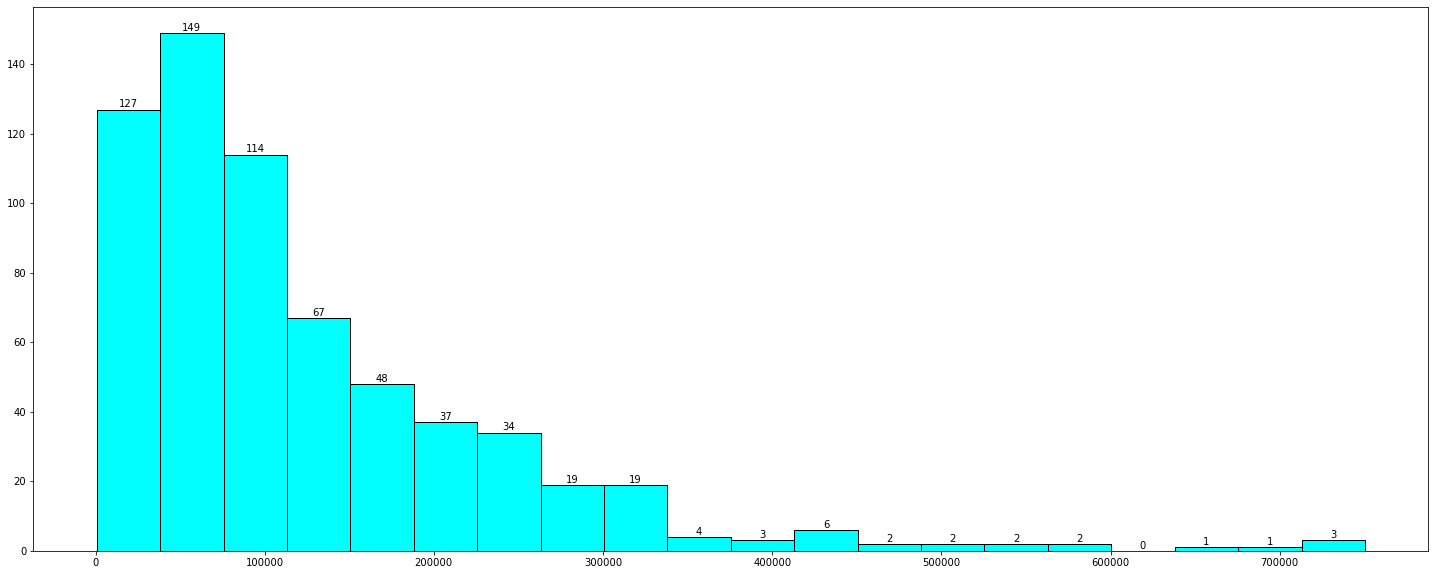

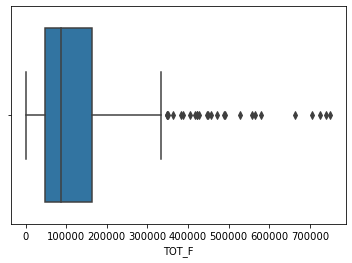

Description of M_06
----------------------------------------------------------------------------
count      640.000000
mean     12309.098438
std      11500.906881
min         56.000000
25%       4733.750000
50%       9159.000000
75%      16520.250000
max      96223.000000
Name: M_06, dtype: float64 Distribution of M_06
----------------------------------------------------------------------------
BoxPlot of M_06
----------------------------------------------------------------------------


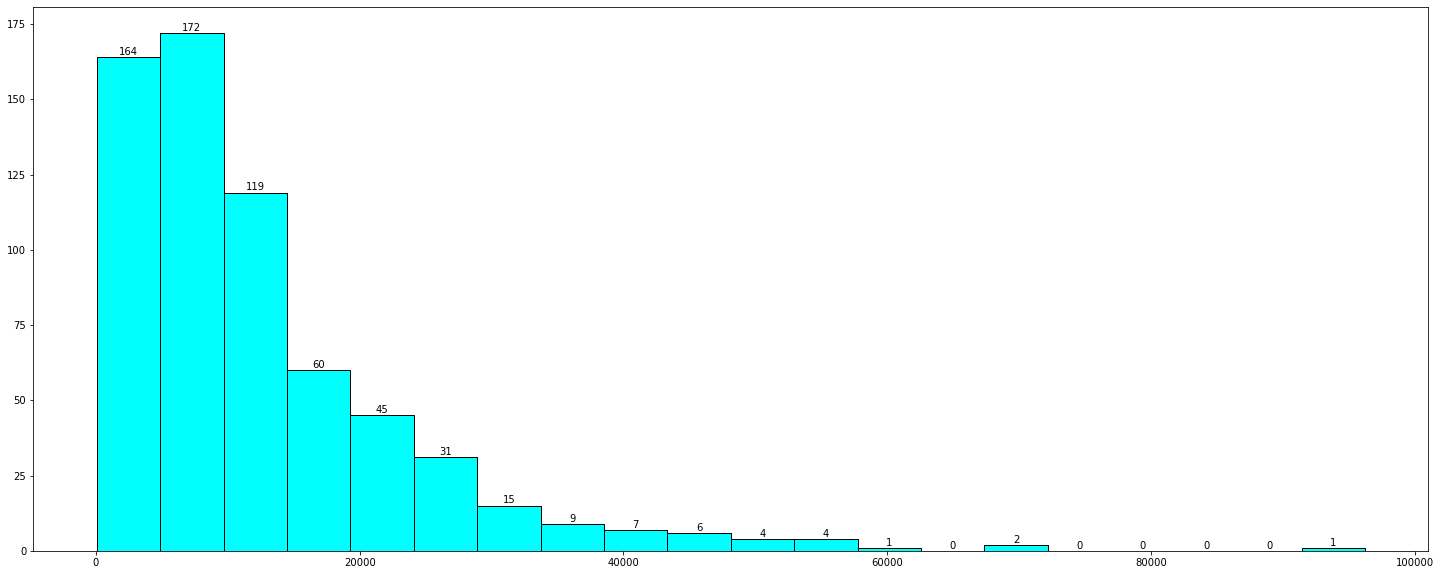

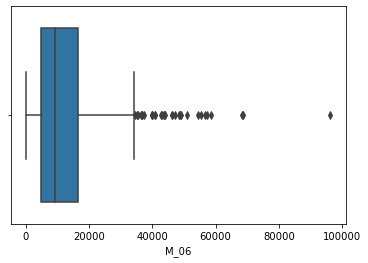

Description of F_06
----------------------------------------------------------------------------
count      640.000000
mean     11942.300000
std      11326.294567
min         56.000000
25%       4672.250000
50%       8663.000000
75%      15902.250000
max      95129.000000
Name: F_06, dtype: float64 Distribution of F_06
----------------------------------------------------------------------------
BoxPlot of F_06
----------------------------------------------------------------------------


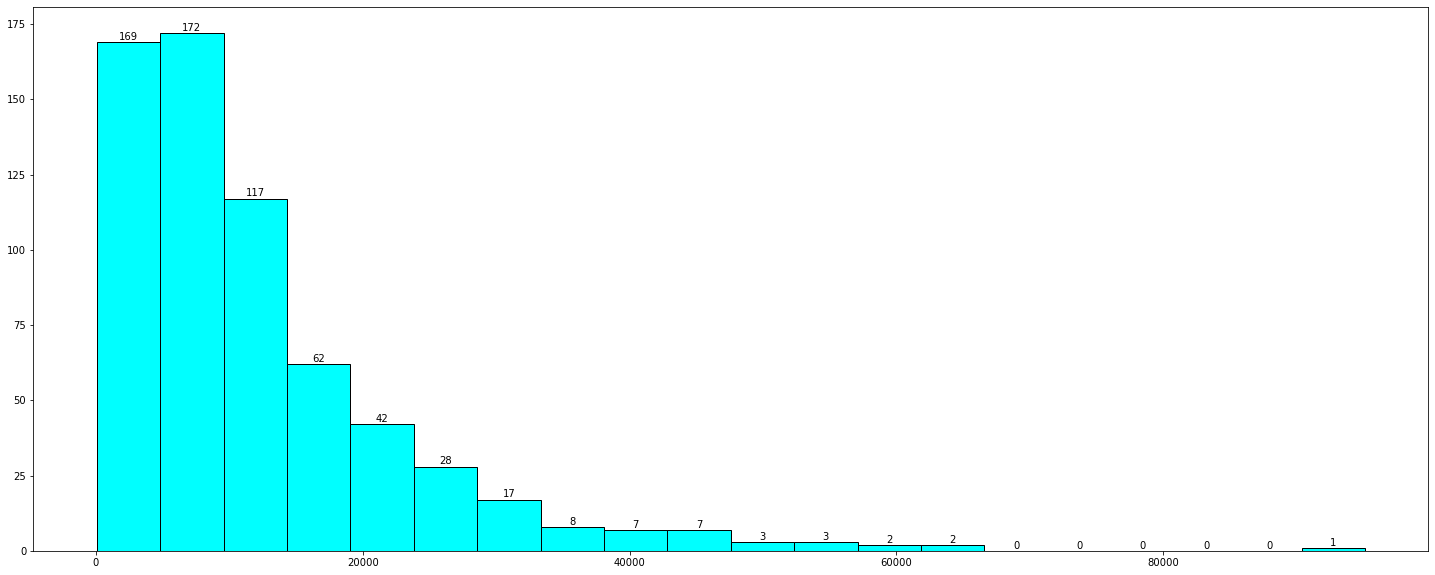

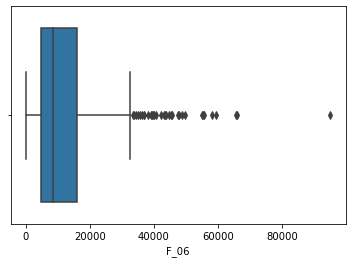

Description of M_SC
----------------------------------------------------------------------------
count       640.000000
mean      13820.946875
std       14426.373130
min           0.000000
25%        3466.250000
50%        9591.500000
75%       19429.750000
max      103307.000000
Name: M_SC, dtype: float64 Distribution of M_SC
----------------------------------------------------------------------------
BoxPlot of M_SC
----------------------------------------------------------------------------


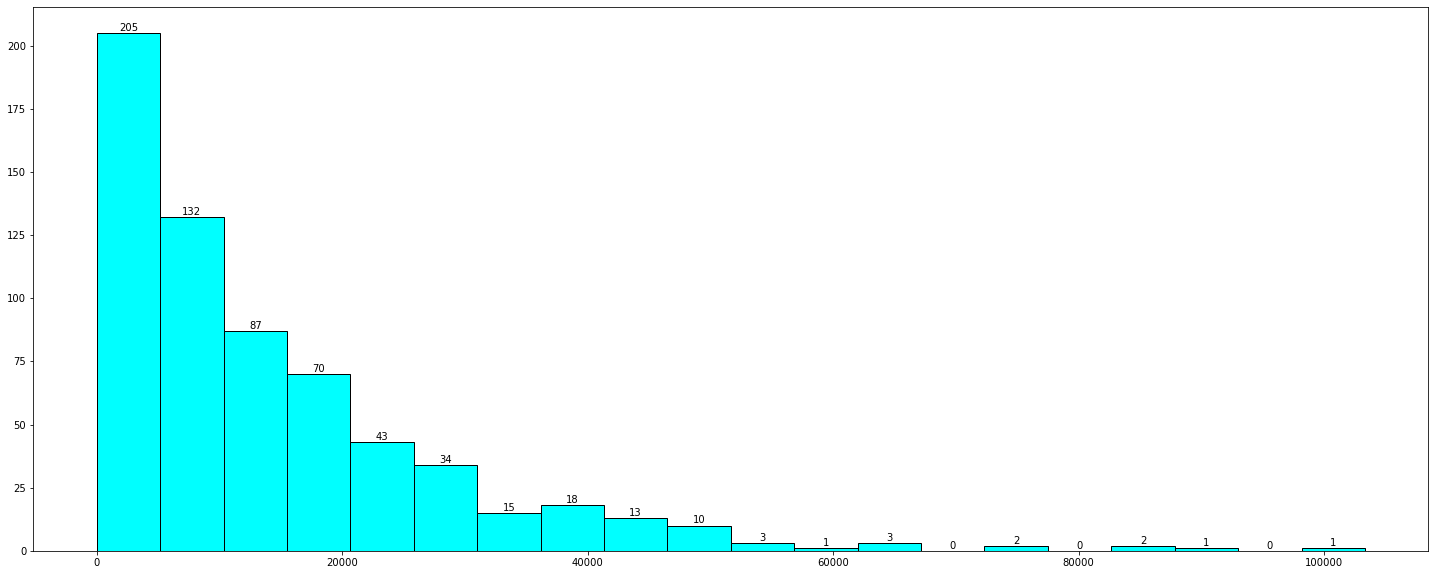

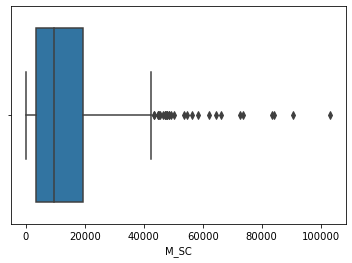

Description of F_SC
----------------------------------------------------------------------------
count       640.000000
mean      20778.392188
std       21727.887713
min           0.000000
25%        5603.250000
50%       13709.000000
75%       29180.000000
max      156429.000000
Name: F_SC, dtype: float64 Distribution of F_SC
----------------------------------------------------------------------------
BoxPlot of F_SC
----------------------------------------------------------------------------


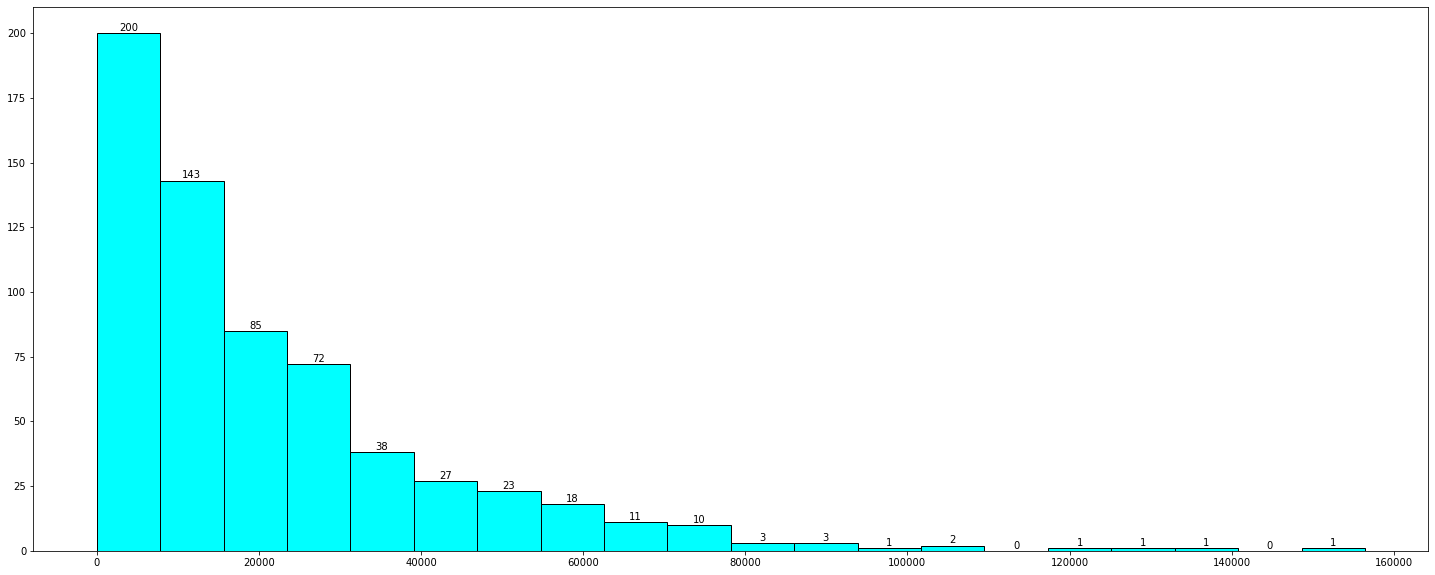

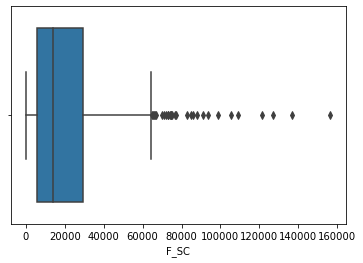

Description of M_ST
----------------------------------------------------------------------------
count      640.000000
mean      6191.807813
std       9912.668948
min          0.000000
25%        293.750000
50%       2333.500000
75%       7658.000000
max      96785.000000
Name: M_ST, dtype: float64 Distribution of M_ST
----------------------------------------------------------------------------
BoxPlot of M_ST
----------------------------------------------------------------------------


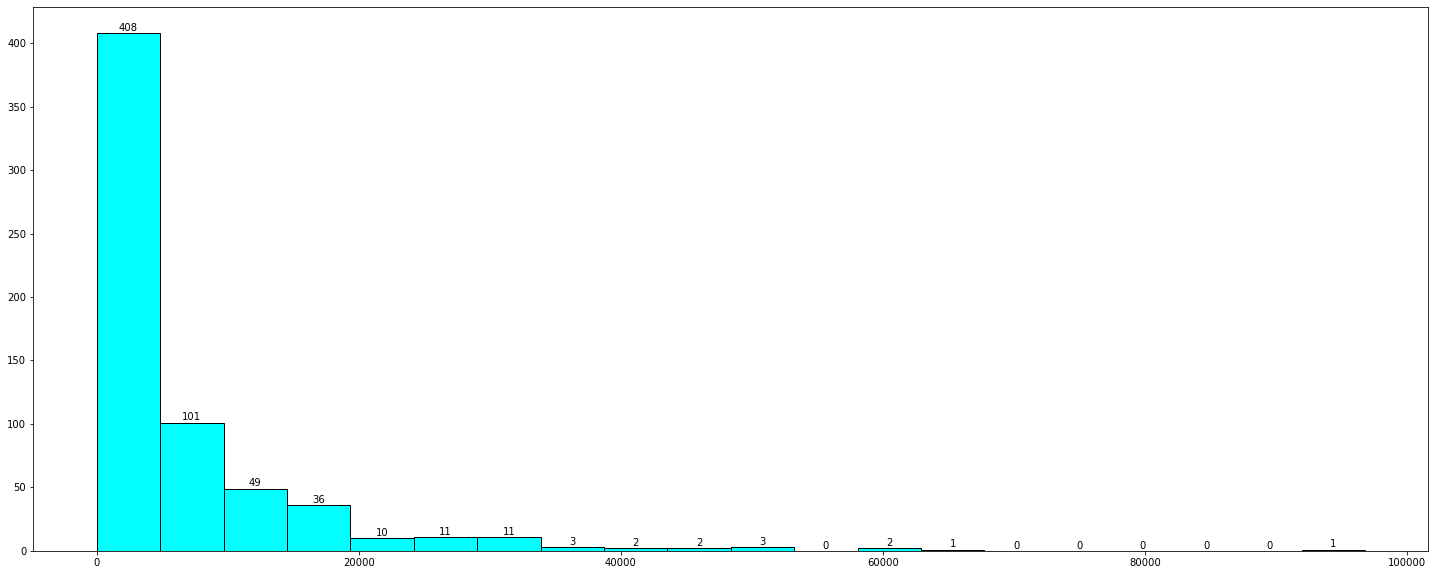

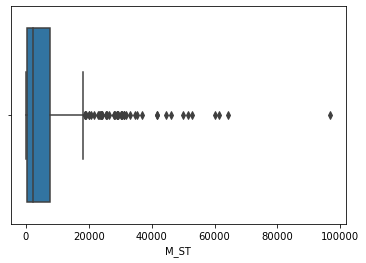

Description of F_ST
----------------------------------------------------------------------------
count       640.000000
mean      10155.640625
std       15875.701488
min           0.000000
25%         429.500000
50%        3834.500000
75%       12480.250000
max      130119.000000
Name: F_ST, dtype: float64 Distribution of F_ST
----------------------------------------------------------------------------
BoxPlot of F_ST
----------------------------------------------------------------------------


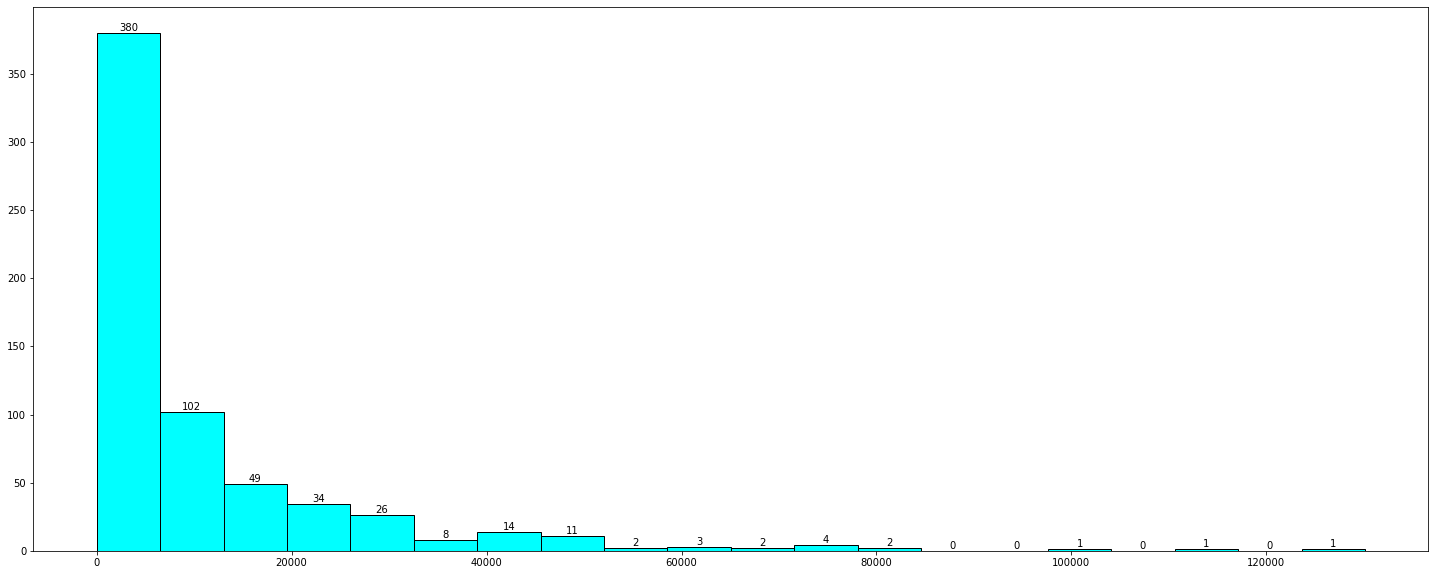

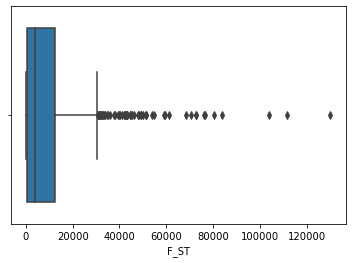

Description of M_LIT
----------------------------------------------------------------------------
count       640.000000
mean      57967.979688
std       55910.282466
min         286.000000
25%       21298.000000
50%       42693.500000
75%       77989.500000
max      403261.000000
Name: M_LIT, dtype: float64 Distribution of M_LIT
----------------------------------------------------------------------------
BoxPlot of M_LIT
----------------------------------------------------------------------------


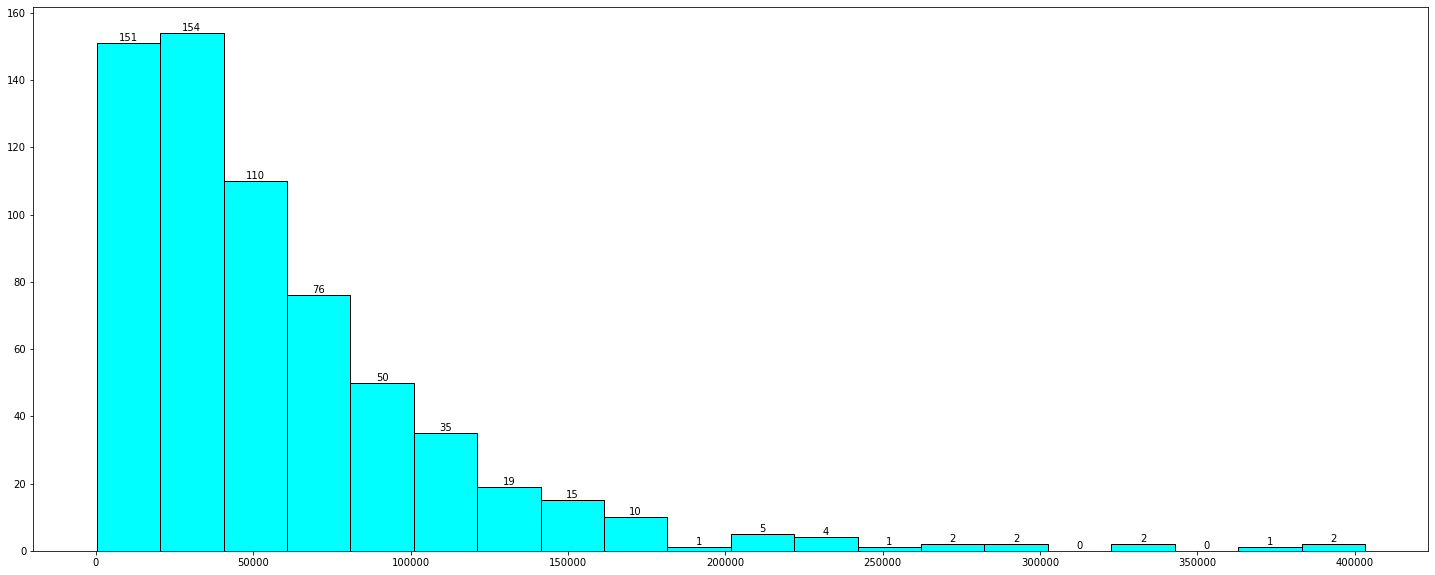

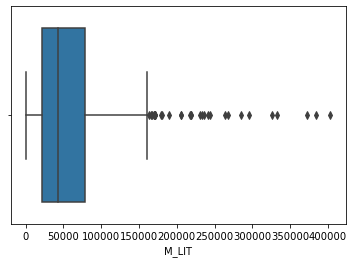

Description of F_LIT
----------------------------------------------------------------------------
count       640.000000
mean      66359.565625
std       75037.860207
min         371.000000
25%       20932.000000
50%       43796.500000
75%       84799.750000
max      571140.000000
Name: F_LIT, dtype: float64 Distribution of F_LIT
----------------------------------------------------------------------------
BoxPlot of F_LIT
----------------------------------------------------------------------------


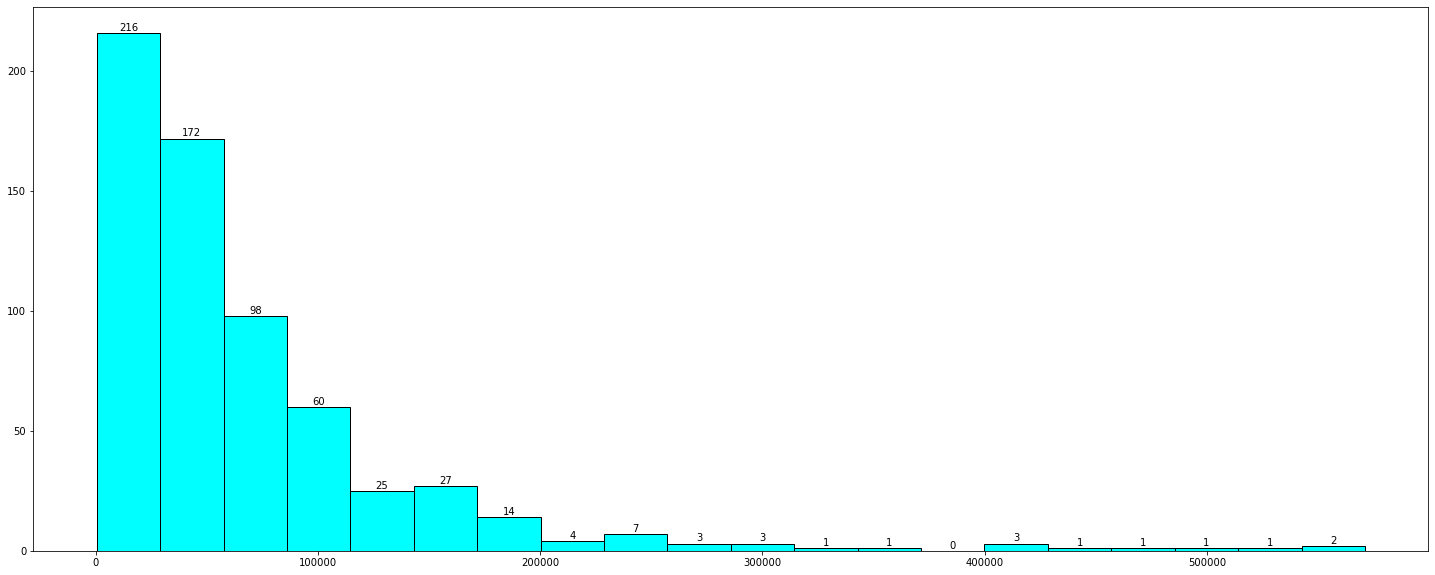

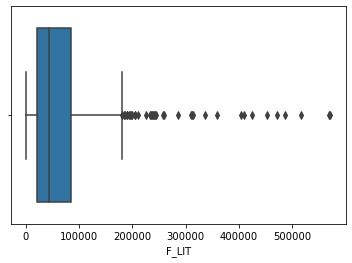

Description of M_ILL
----------------------------------------------------------------------------
count       640.000000
mean      21972.596875
std       19825.605268
min         105.000000
25%        8590.000000
50%       15767.500000
75%       29512.500000
max      105961.000000
Name: M_ILL, dtype: float64 Distribution of M_ILL
----------------------------------------------------------------------------
BoxPlot of M_ILL
----------------------------------------------------------------------------


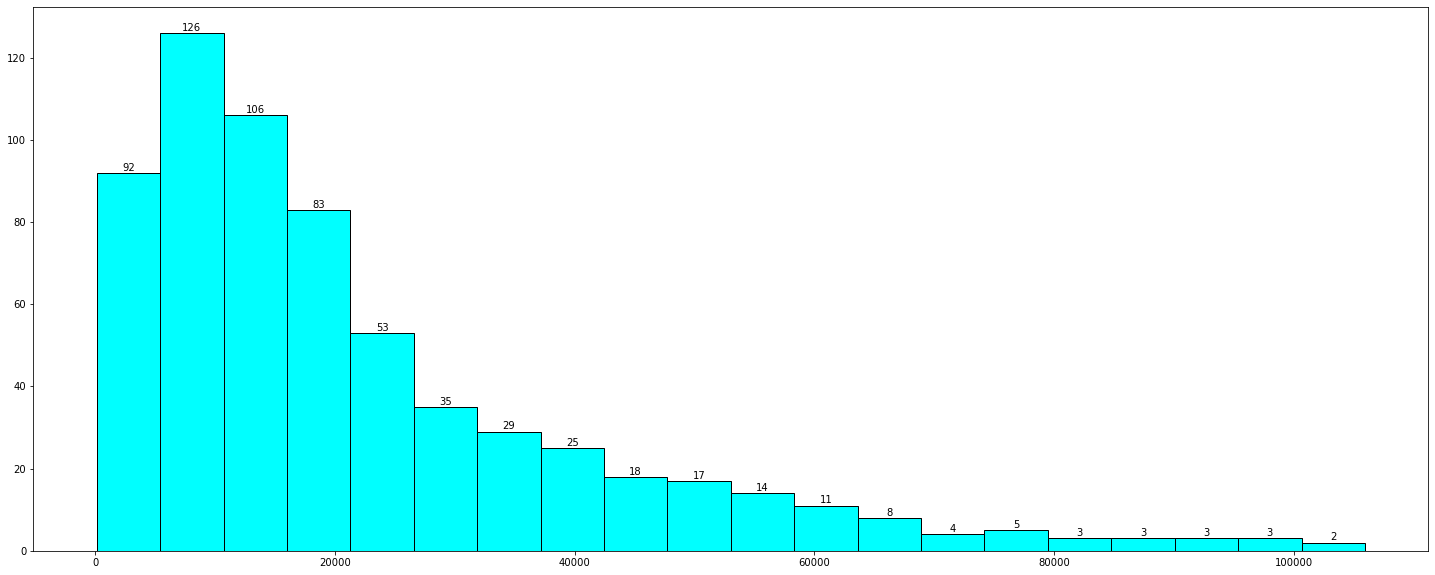

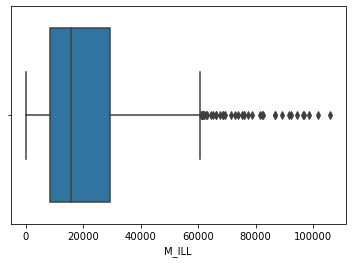

Description of F_ILL
----------------------------------------------------------------------------
count       640.000000
mean      56012.518750
std       47116.693769
min         327.000000
25%       22367.000000
50%       42386.000000
75%       78471.000000
max      254160.000000
Name: F_ILL, dtype: float64 Distribution of F_ILL
----------------------------------------------------------------------------
BoxPlot of F_ILL
----------------------------------------------------------------------------


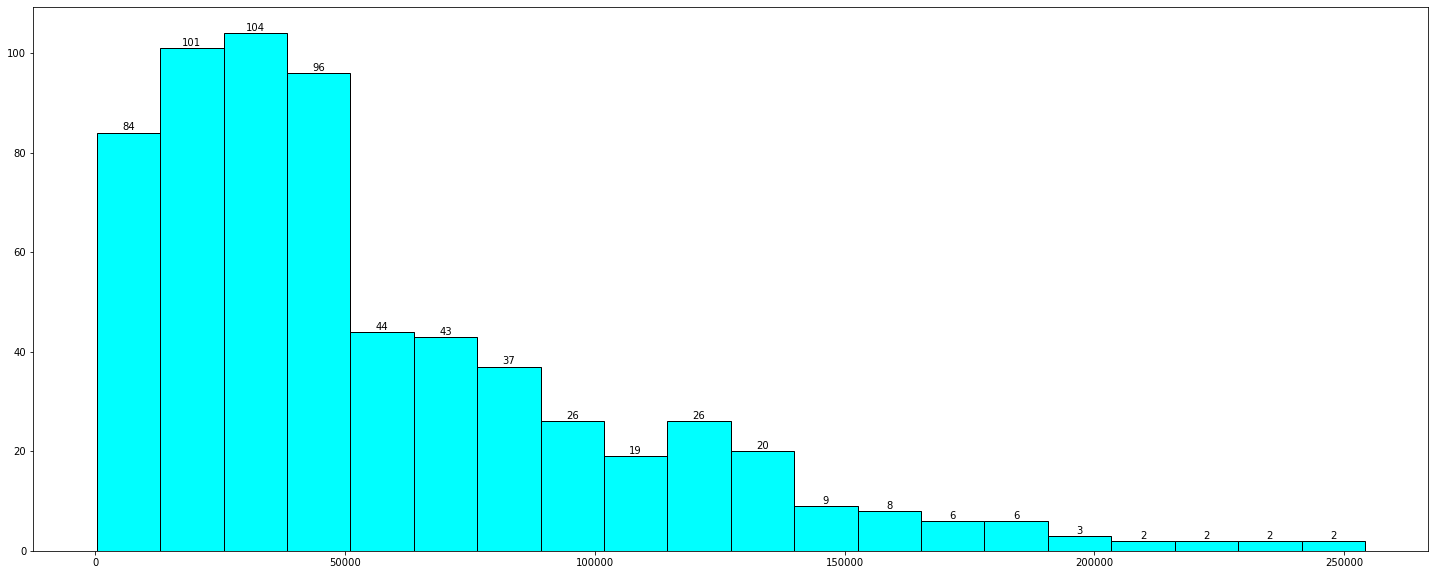

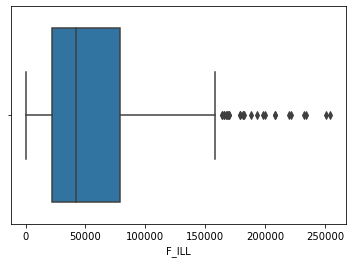

Description of TOT_WORK_M
----------------------------------------------------------------------------
count       640.000000
mean      37992.407813
std       36419.537491
min         100.000000
25%       13753.500000
50%       27936.500000
75%       50226.750000
max      269422.000000
Name: TOT_WORK_M, dtype: float64 Distribution of TOT_WORK_M
----------------------------------------------------------------------------
BoxPlot of TOT_WORK_M
----------------------------------------------------------------------------


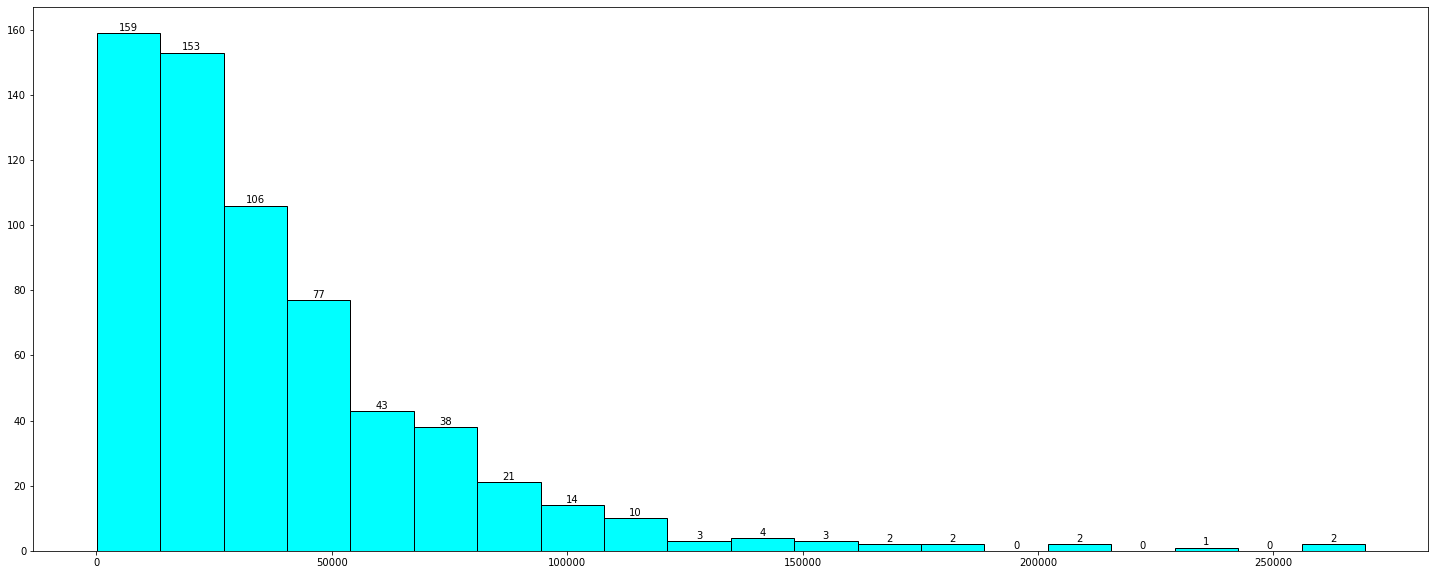

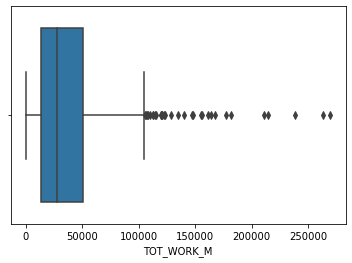

Description of TOT_WORK_F
----------------------------------------------------------------------------
count       640.000000
mean      41295.760938
std       37192.360943
min         357.000000
25%       16097.750000
50%       30588.500000
75%       53234.250000
max      257848.000000
Name: TOT_WORK_F, dtype: float64 Distribution of TOT_WORK_F
----------------------------------------------------------------------------
BoxPlot of TOT_WORK_F
----------------------------------------------------------------------------


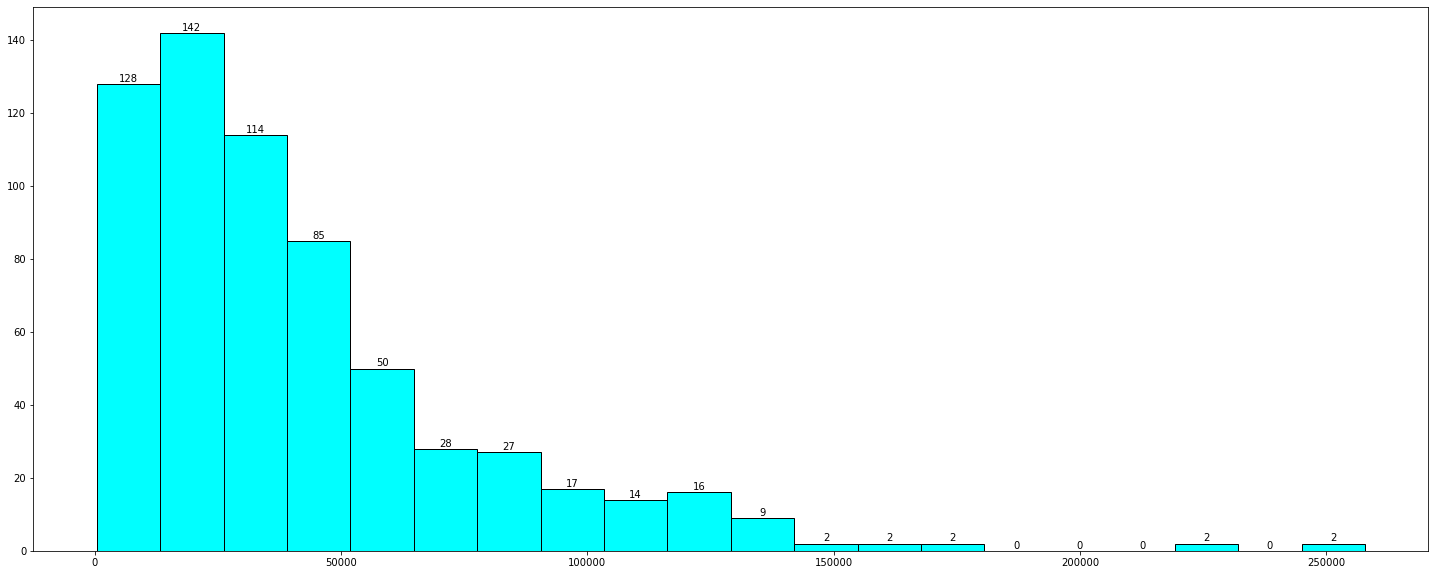

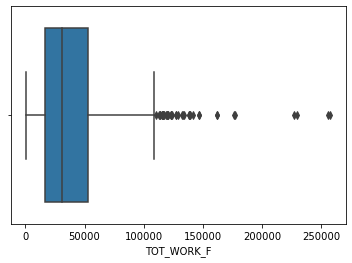

Description of MAINWORK_M
----------------------------------------------------------------------------
count       640.000000
mean      30204.446875
std       31480.915680
min          65.000000
25%        9787.000000
50%       21250.500000
75%       40119.000000
max      247911.000000
Name: MAINWORK_M, dtype: float64 Distribution of MAINWORK_M
----------------------------------------------------------------------------
BoxPlot of MAINWORK_M
----------------------------------------------------------------------------


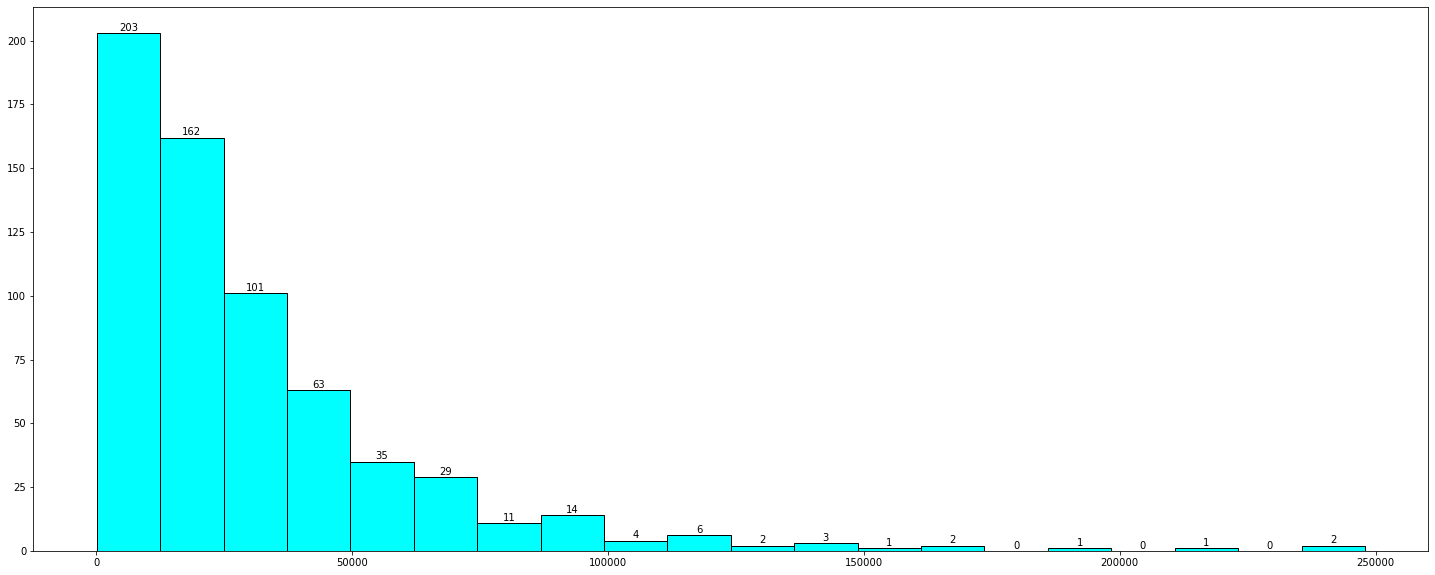

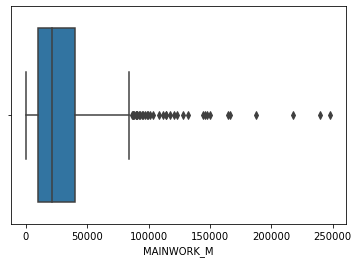

Description of MAINWORK_F
----------------------------------------------------------------------------
count       640.000000
mean      28198.846875
std       29998.262689
min         240.000000
25%        9502.250000
50%       18484.000000
75%       35063.250000
max      226166.000000
Name: MAINWORK_F, dtype: float64 Distribution of MAINWORK_F
----------------------------------------------------------------------------
BoxPlot of MAINWORK_F
----------------------------------------------------------------------------


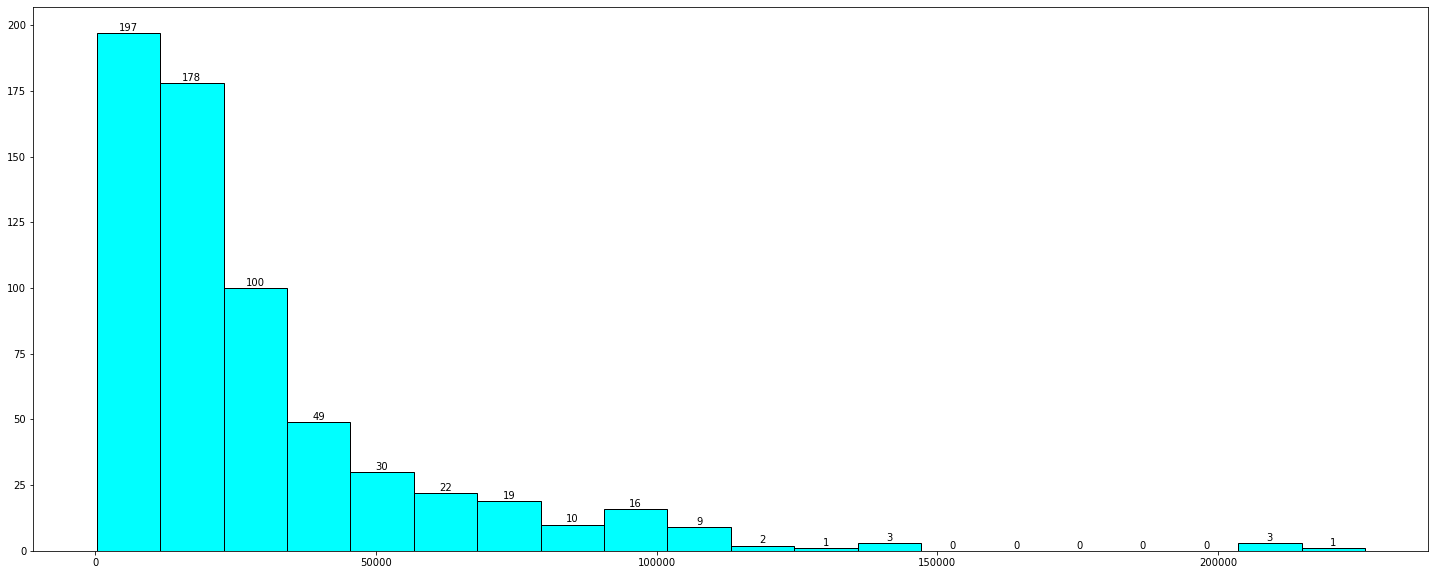

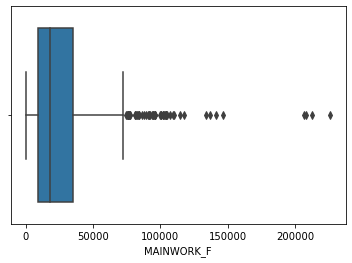

Description of MAIN_CL_M
----------------------------------------------------------------------------
count      640.000000
mean      5424.342188
std       4739.161969
min          0.000000
25%       2023.500000
50%       4160.500000
75%       7695.000000
max      29113.000000
Name: MAIN_CL_M, dtype: float64 Distribution of MAIN_CL_M
----------------------------------------------------------------------------
BoxPlot of MAIN_CL_M
----------------------------------------------------------------------------


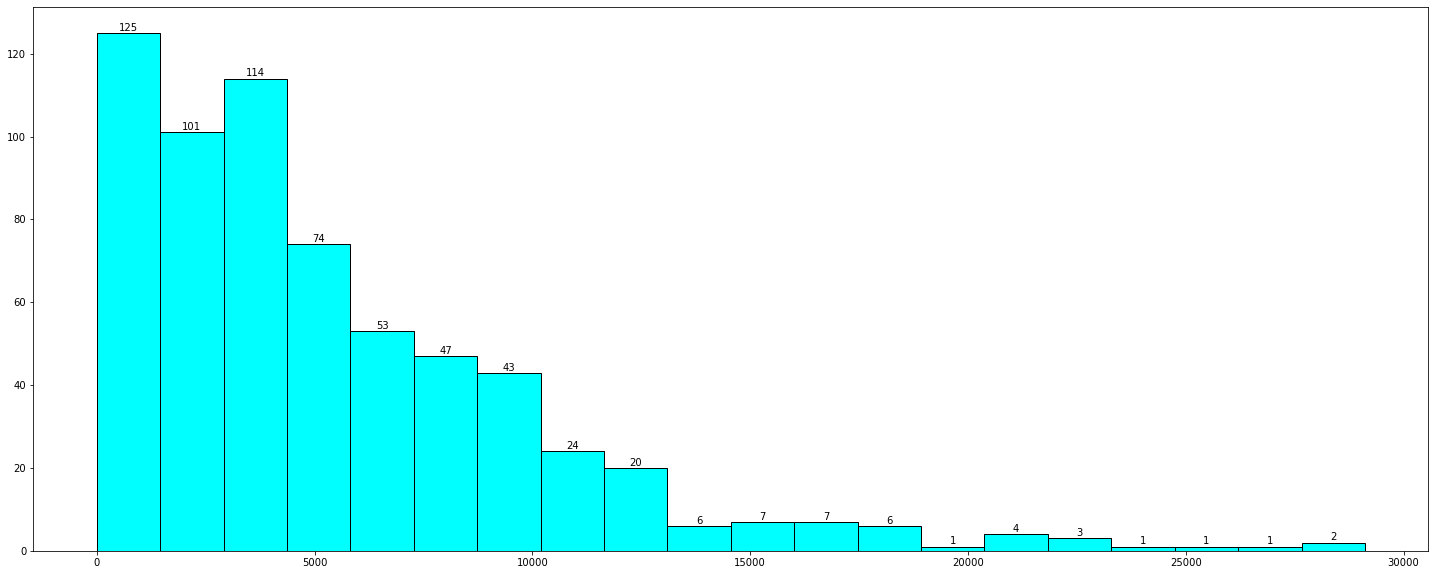

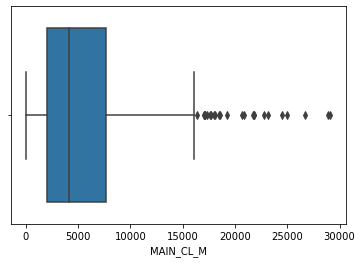

Description of MAIN_CL_F
----------------------------------------------------------------------------
count      640.000000
mean      5486.042188
std       5326.362728
min          0.000000
25%       1920.250000
50%       3908.500000
75%       7286.250000
max      36193.000000
Name: MAIN_CL_F, dtype: float64 Distribution of MAIN_CL_F
----------------------------------------------------------------------------
BoxPlot of MAIN_CL_F
----------------------------------------------------------------------------


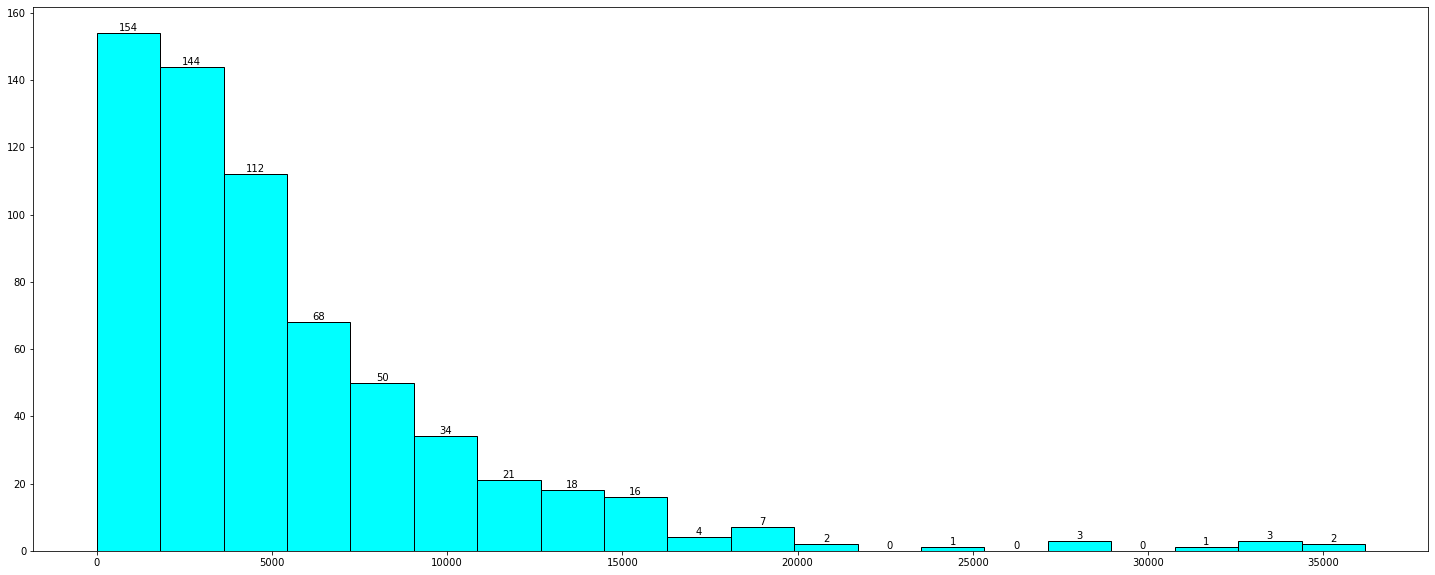

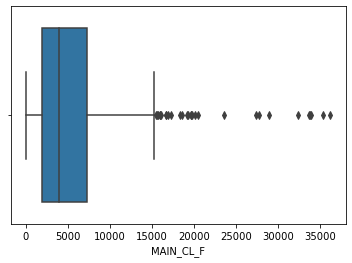

Description of MAIN_AL_M
----------------------------------------------------------------------------
count      640.000000
mean      5849.109375
std       6399.507966
min          0.000000
25%       1070.250000
50%       3936.500000
75%       8067.250000
max      40843.000000
Name: MAIN_AL_M, dtype: float64 Distribution of MAIN_AL_M
----------------------------------------------------------------------------
BoxPlot of MAIN_AL_M
----------------------------------------------------------------------------


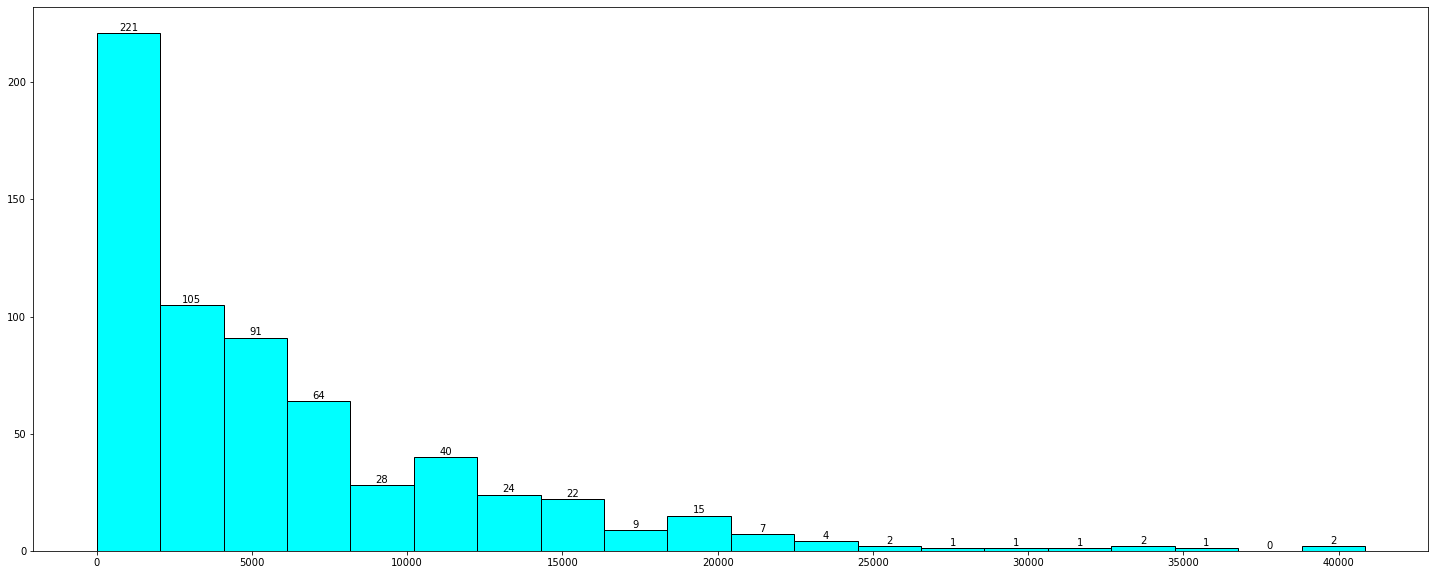

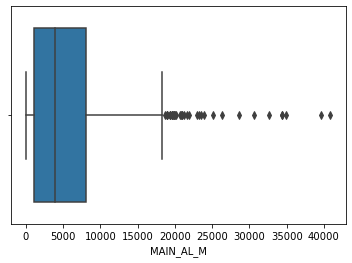

Description of MAIN_AL_F
----------------------------------------------------------------------------
count      640.000000
mean      8925.995312
std      12864.287584
min          0.000000
25%       1408.750000
50%       3933.500000
75%      10617.500000
max      87945.000000
Name: MAIN_AL_F, dtype: float64 Distribution of MAIN_AL_F
----------------------------------------------------------------------------
BoxPlot of MAIN_AL_F
----------------------------------------------------------------------------


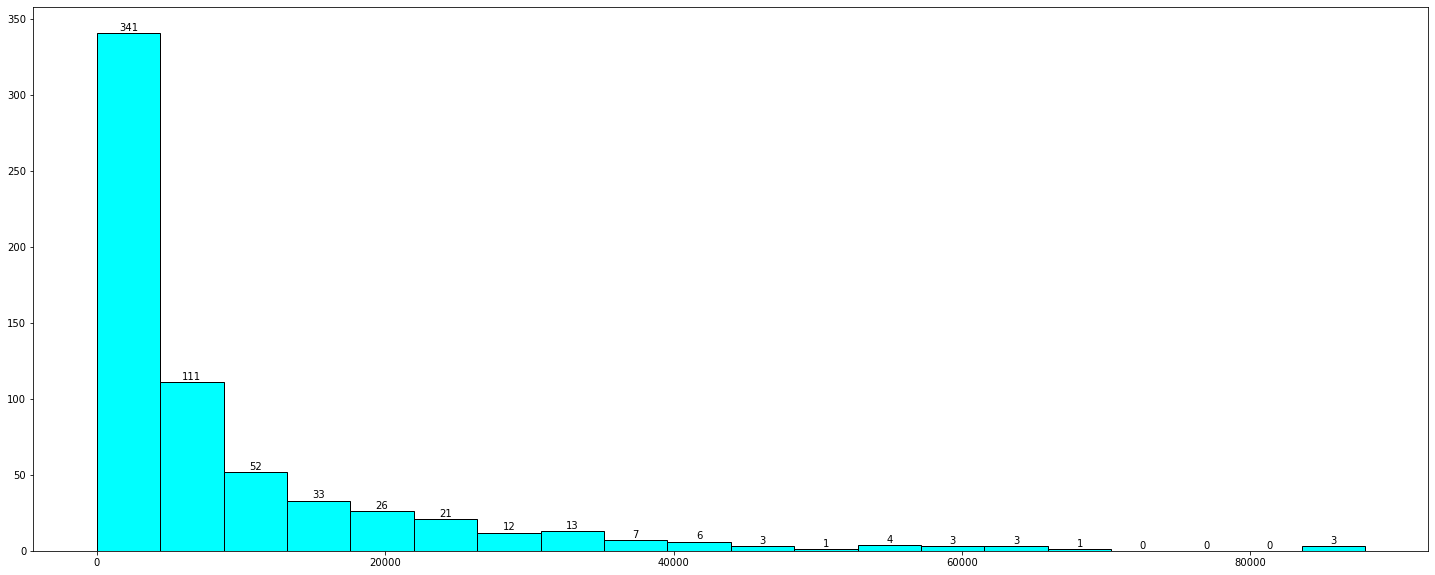

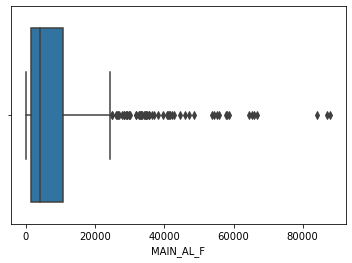

Description of MAIN_HH_M
----------------------------------------------------------------------------
count      640.000000
mean       883.893750
std       1278.642345
min          0.000000
25%        187.500000
50%        498.500000
75%       1099.250000
max      16429.000000
Name: MAIN_HH_M, dtype: float64 Distribution of MAIN_HH_M
----------------------------------------------------------------------------
BoxPlot of MAIN_HH_M
----------------------------------------------------------------------------


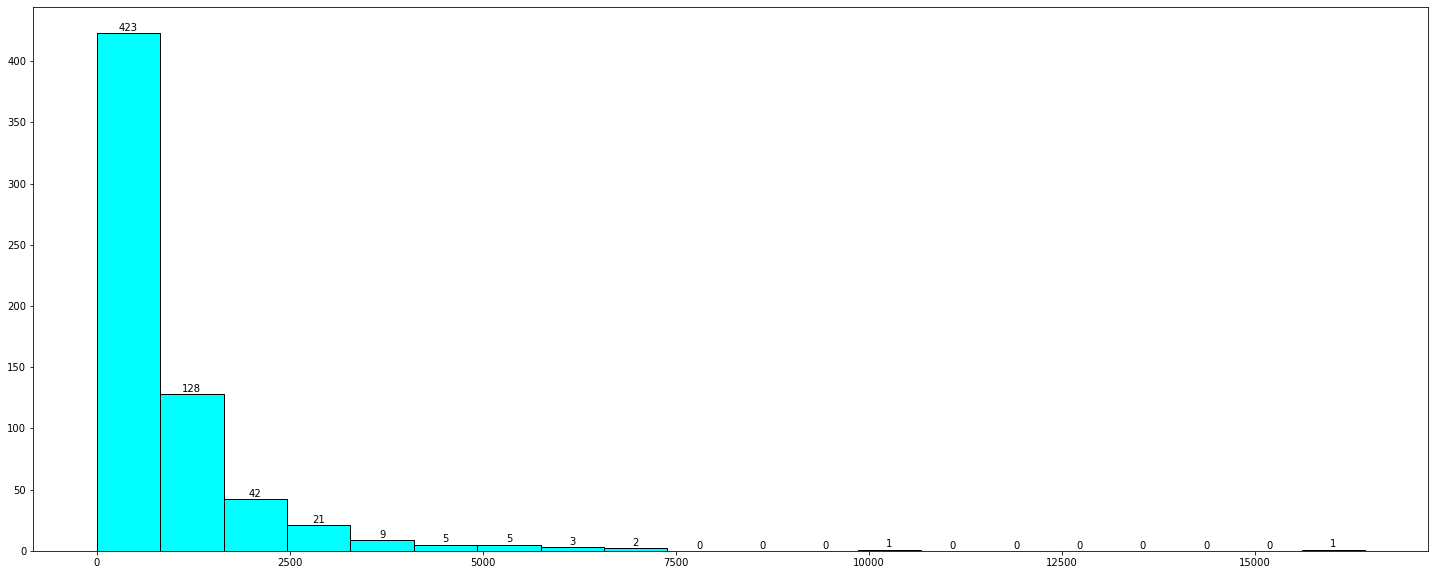

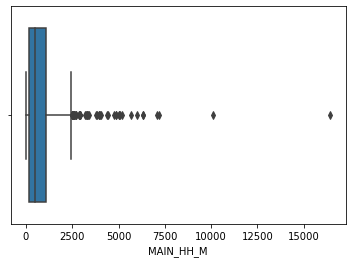

Description of MAIN_HH_F
----------------------------------------------------------------------------
count      640.000000
mean      1380.773438
std       3179.414449
min          0.000000
25%        248.750000
50%        540.500000
75%       1435.750000
max      45979.000000
Name: MAIN_HH_F, dtype: float64 Distribution of MAIN_HH_F
----------------------------------------------------------------------------
BoxPlot of MAIN_HH_F
----------------------------------------------------------------------------


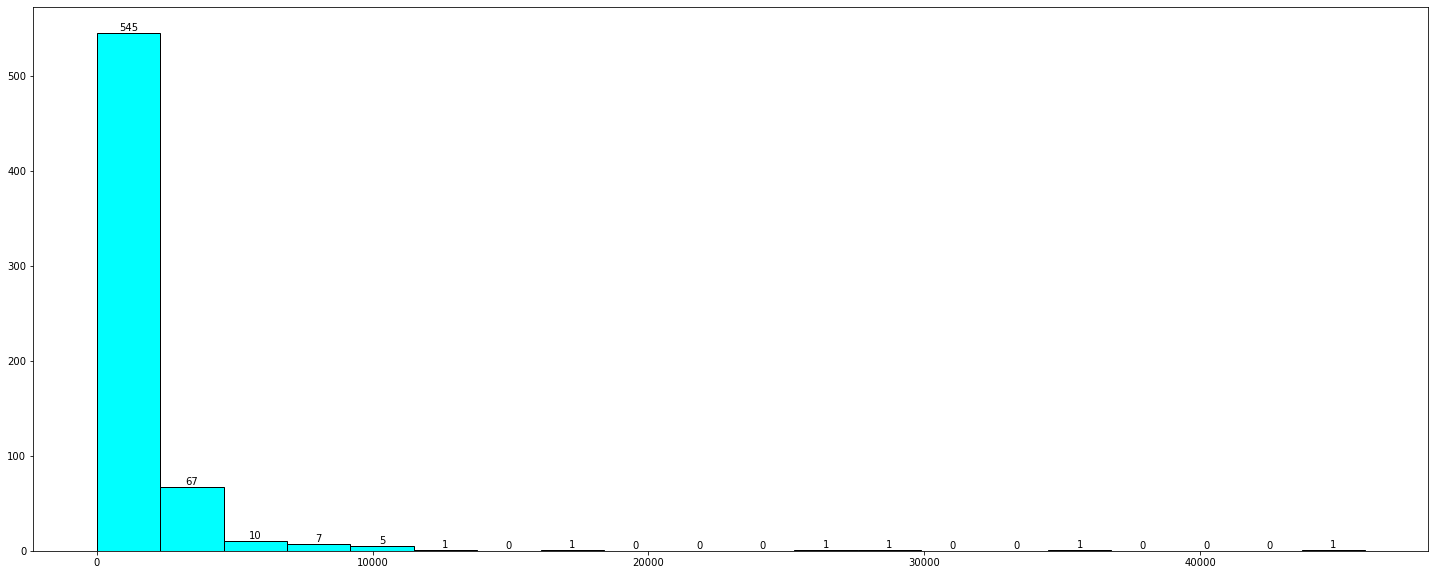

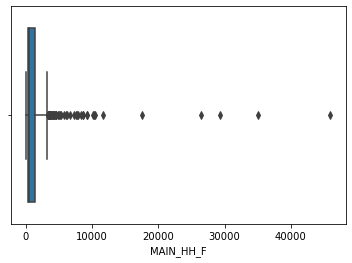

Description of MAIN_OT_M
----------------------------------------------------------------------------
count       640.000000
mean      18047.101562
std       26068.480886
min          36.000000
25%        3997.500000
50%        9598.000000
75%       21249.500000
max      240855.000000
Name: MAIN_OT_M, dtype: float64 Distribution of MAIN_OT_M
----------------------------------------------------------------------------
BoxPlot of MAIN_OT_M
----------------------------------------------------------------------------


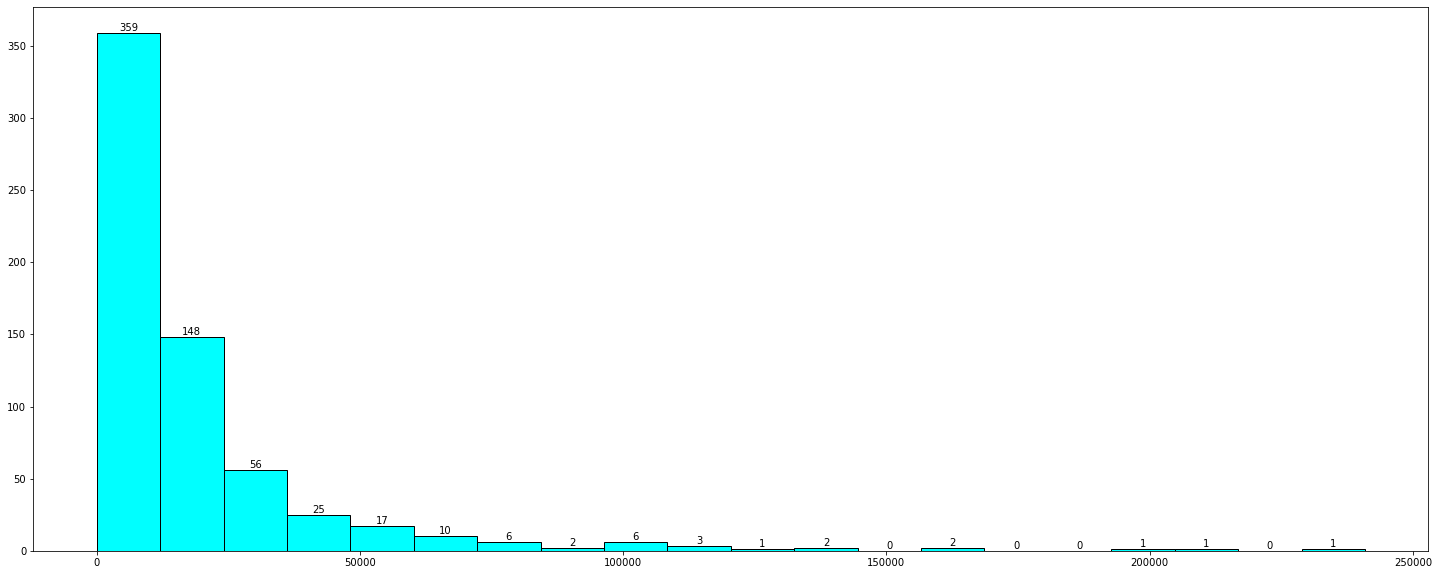

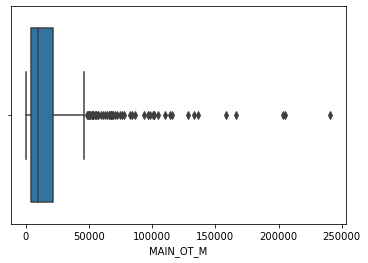

Description of MAIN_OT_F
----------------------------------------------------------------------------
count       640.000000
mean      12406.035938
std       18972.202369
min         153.000000
25%        3142.500000
50%        6380.500000
75%       14368.250000
max      209355.000000
Name: MAIN_OT_F, dtype: float64 Distribution of MAIN_OT_F
----------------------------------------------------------------------------
BoxPlot of MAIN_OT_F
----------------------------------------------------------------------------


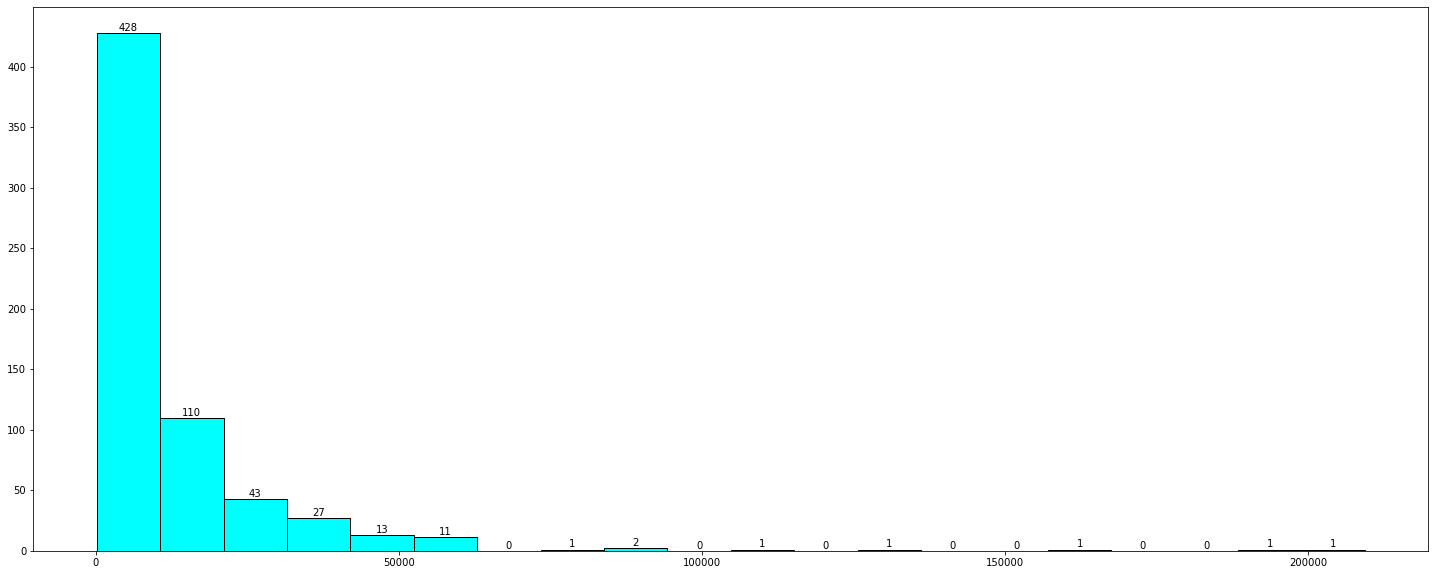

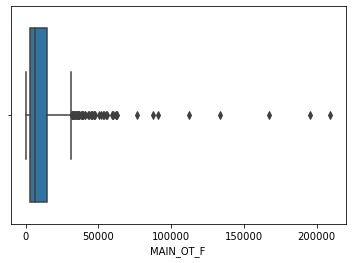

Description of MARGWORK_M
----------------------------------------------------------------------------
count      640.000000
mean      7787.960938
std       7410.791691
min         35.000000
25%       2937.500000
50%       5627.000000
75%       9800.250000
max      47553.000000
Name: MARGWORK_M, dtype: float64 Distribution of MARGWORK_M
----------------------------------------------------------------------------
BoxPlot of MARGWORK_M
----------------------------------------------------------------------------


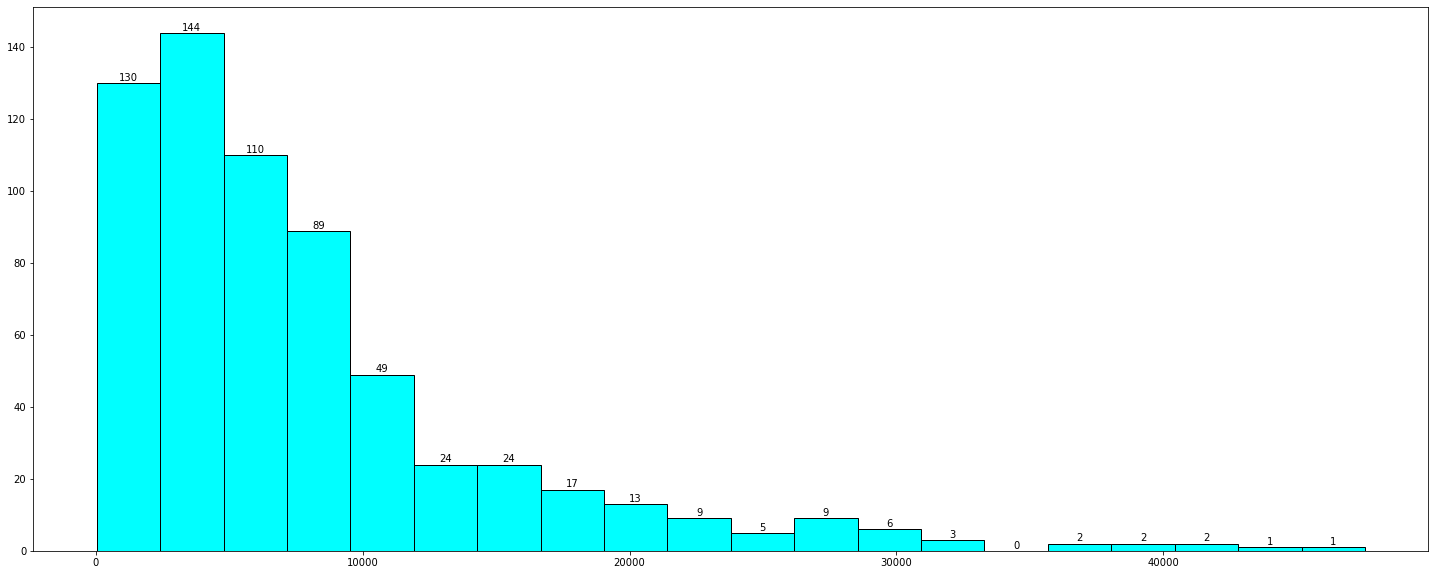

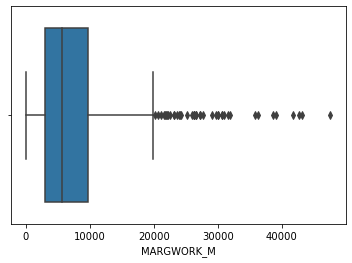

Description of MARGWORK_F
----------------------------------------------------------------------------
count      640.000000
mean     13096.914062
std      10996.474528
min        117.000000
25%       5424.500000
50%      10175.000000
75%      18879.250000
max      66915.000000
Name: MARGWORK_F, dtype: float64 Distribution of MARGWORK_F
----------------------------------------------------------------------------
BoxPlot of MARGWORK_F
----------------------------------------------------------------------------


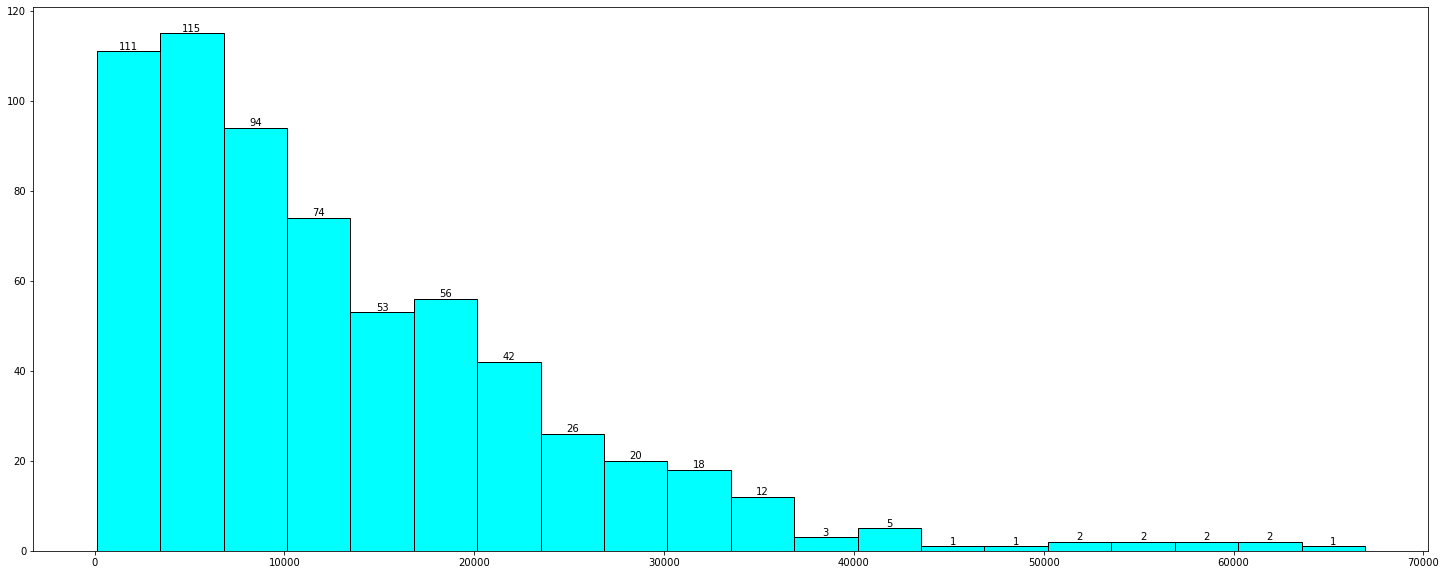

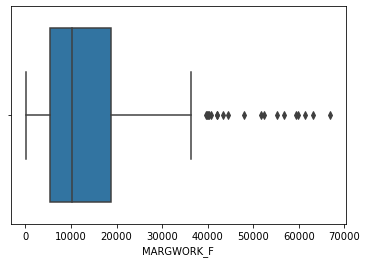

Description of MARG_CL_M
----------------------------------------------------------------------------
count      640.000000
mean      1040.737500
std       1311.546847
min          0.000000
25%        311.750000
50%        606.500000
75%       1281.000000
max      13201.000000
Name: MARG_CL_M, dtype: float64 Distribution of MARG_CL_M
----------------------------------------------------------------------------
BoxPlot of MARG_CL_M
----------------------------------------------------------------------------


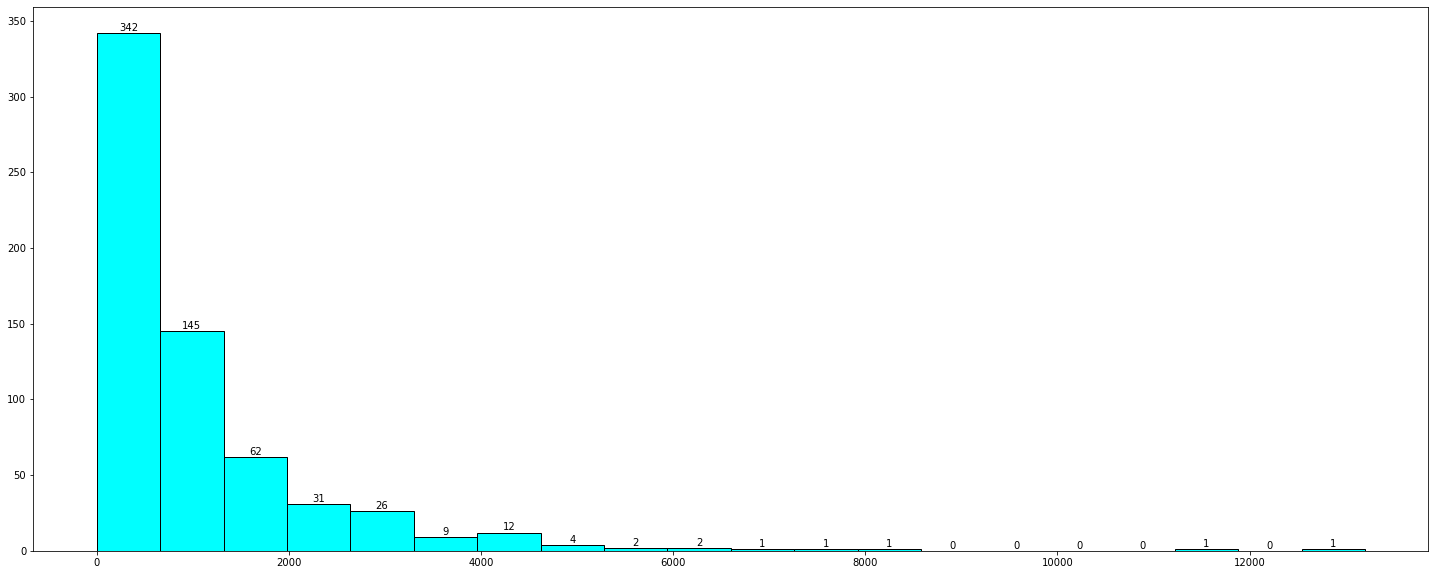

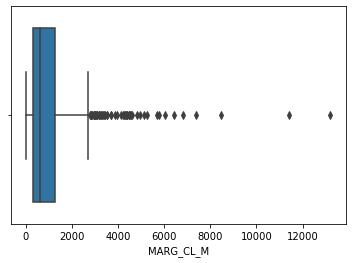

Description of MARG_CL_F
----------------------------------------------------------------------------
count      640.000000
mean      2307.682813
std       3564.626095
min          0.000000
25%        630.250000
50%       1226.000000
75%       2659.250000
max      44324.000000
Name: MARG_CL_F, dtype: float64 Distribution of MARG_CL_F
----------------------------------------------------------------------------
BoxPlot of MARG_CL_F
----------------------------------------------------------------------------


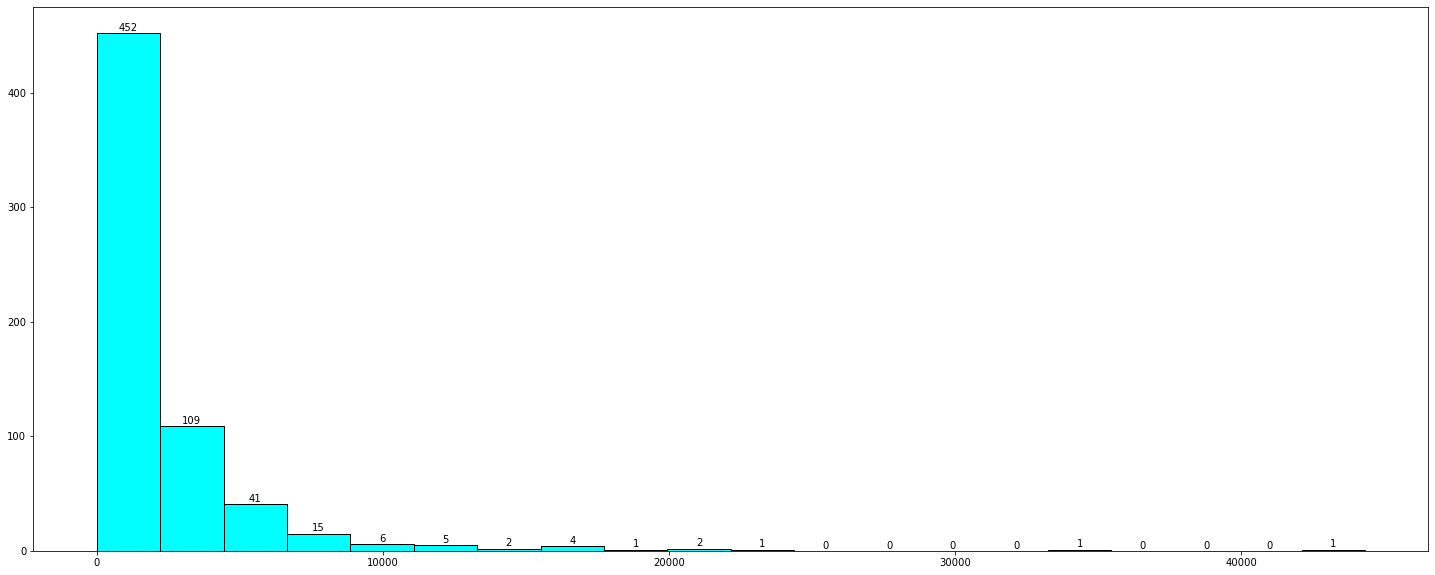

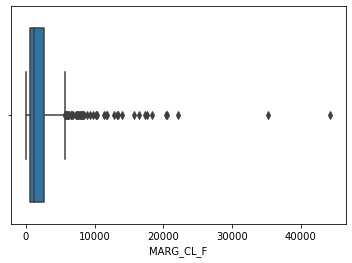

Description of MARG_AL_M
----------------------------------------------------------------------------
count      640.000000
mean      3304.326562
std       3781.555707
min          0.000000
25%        873.500000
50%       2062.000000
75%       4300.750000
max      23719.000000
Name: MARG_AL_M, dtype: float64 Distribution of MARG_AL_M
----------------------------------------------------------------------------
BoxPlot of MARG_AL_M
----------------------------------------------------------------------------


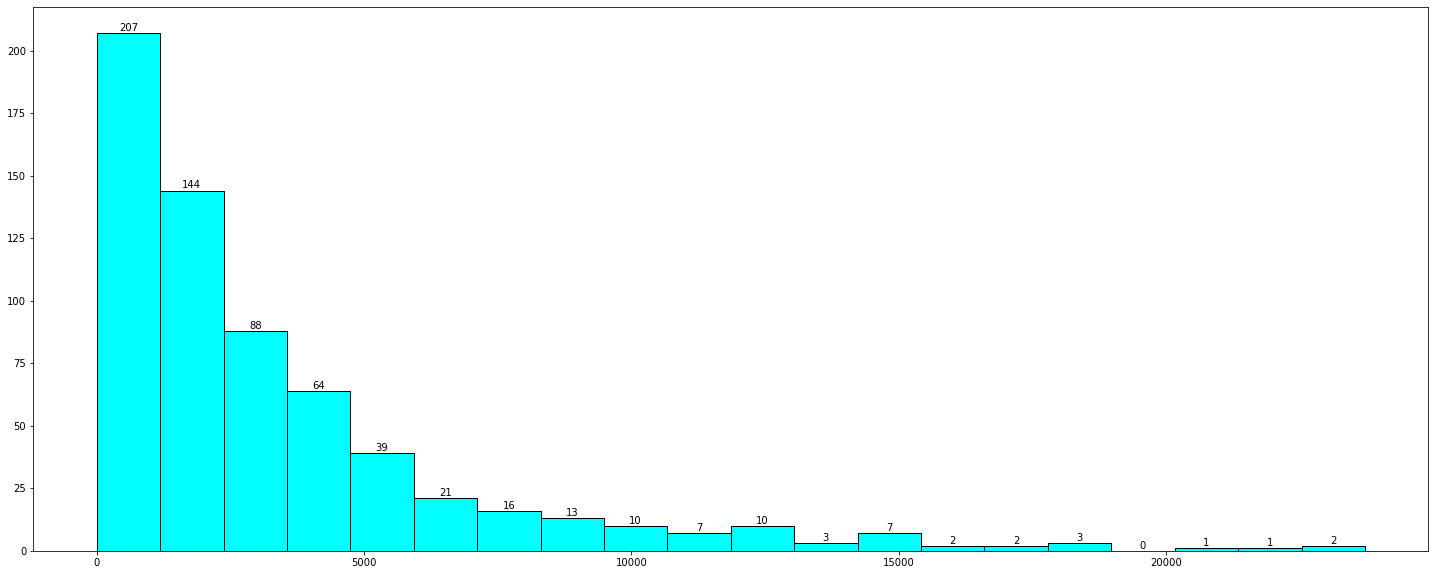

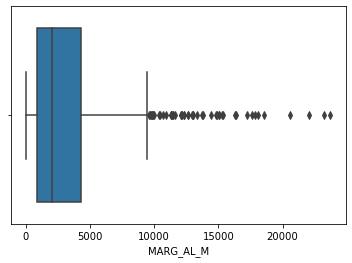

Description of MARG_AL_F
----------------------------------------------------------------------------
count      640.000000
mean      6463.281250
std       6773.876298
min          0.000000
25%       1402.500000
50%       4020.500000
75%       9089.250000
max      45301.000000
Name: MARG_AL_F, dtype: float64 Distribution of MARG_AL_F
----------------------------------------------------------------------------
BoxPlot of MARG_AL_F
----------------------------------------------------------------------------


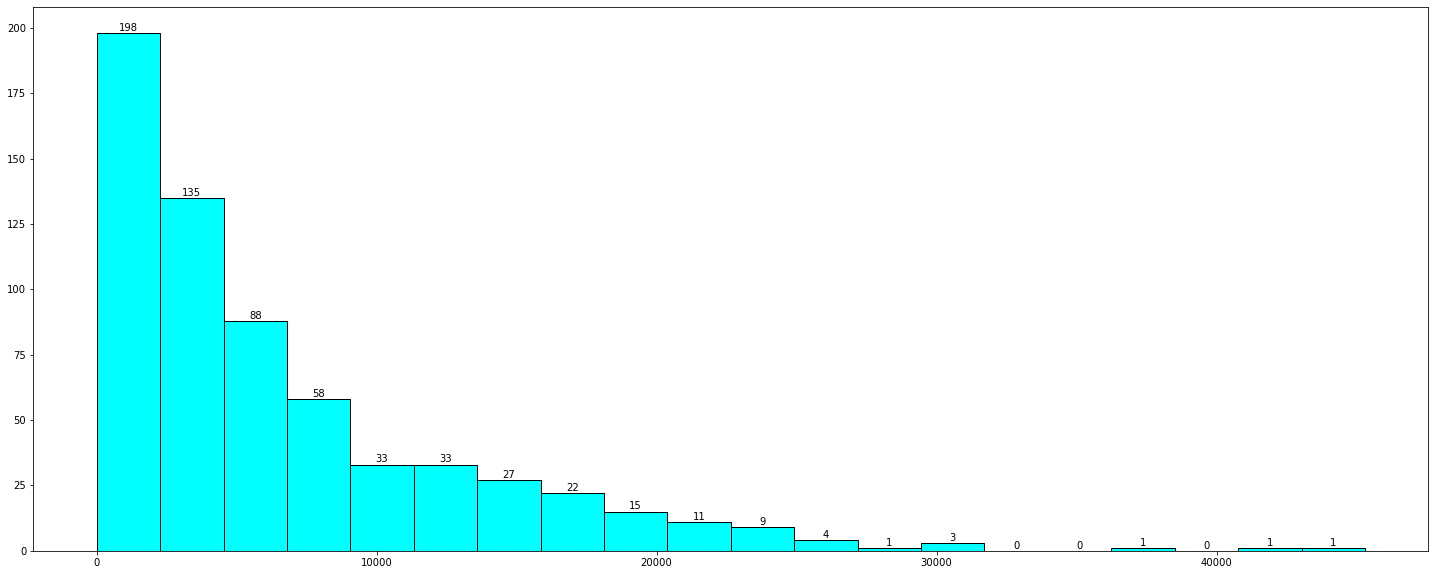

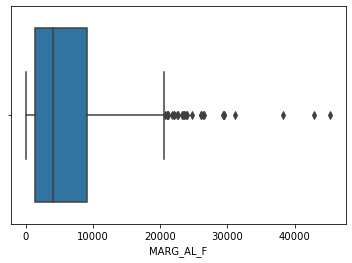

Description of MARG_HH_M
----------------------------------------------------------------------------
count     640.000000
mean      316.742188
std       462.661891
min         0.000000
25%        71.750000
50%       166.000000
75%       356.500000
max      4298.000000
Name: MARG_HH_M, dtype: float64 Distribution of MARG_HH_M
----------------------------------------------------------------------------
BoxPlot of MARG_HH_M
----------------------------------------------------------------------------


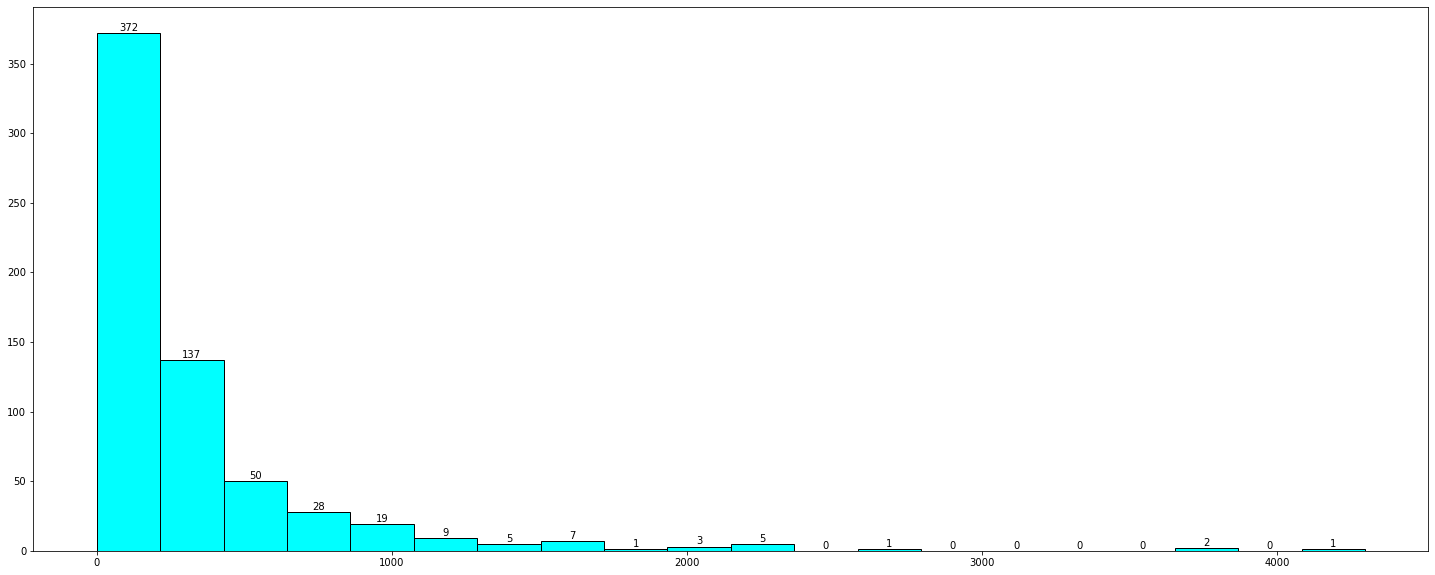

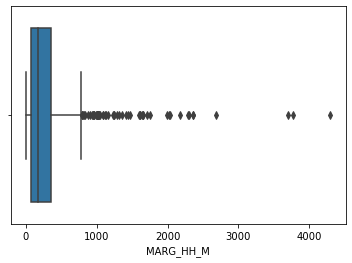

Description of MARG_HH_F
----------------------------------------------------------------------------
count      640.000000
mean       786.626562
std       1198.718213
min          0.000000
25%        171.750000
50%        429.000000
75%        962.500000
max      15448.000000
Name: MARG_HH_F, dtype: float64 Distribution of MARG_HH_F
----------------------------------------------------------------------------
BoxPlot of MARG_HH_F
----------------------------------------------------------------------------


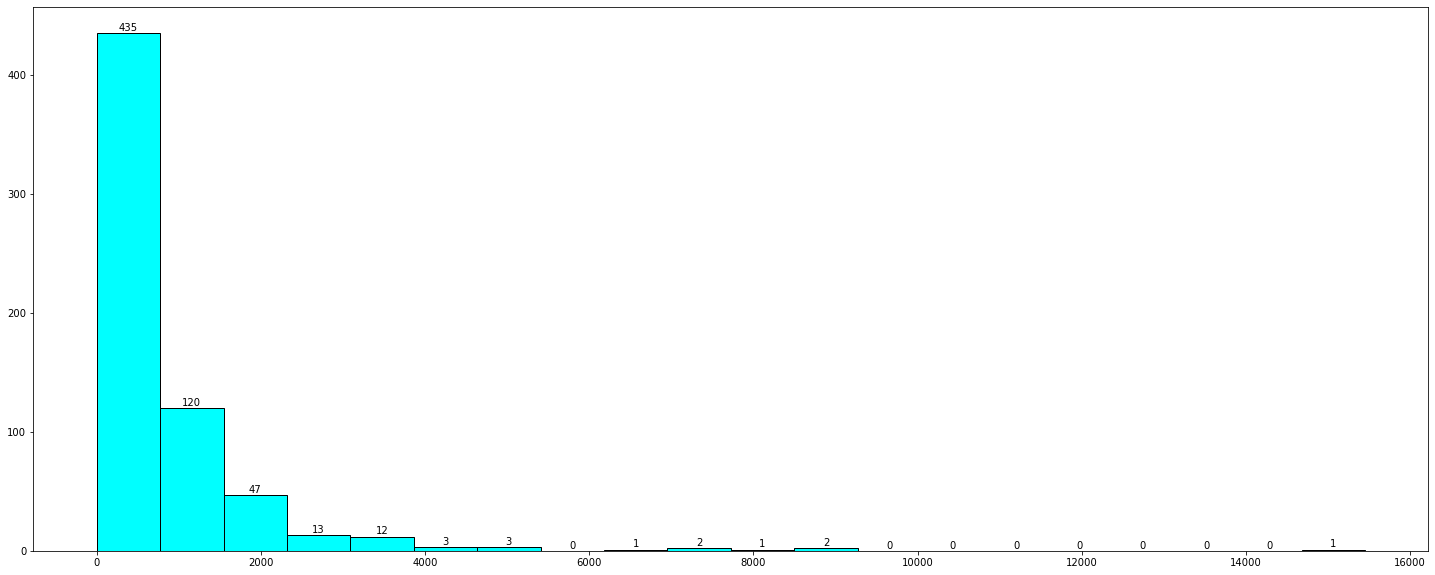

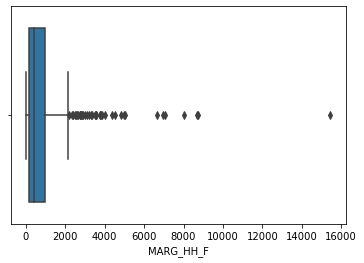

Description of MARG_OT_M
----------------------------------------------------------------------------
count      640.000000
mean      3126.154687
std       3609.391821
min          7.000000
25%        935.500000
50%       2036.000000
75%       3985.250000
max      24728.000000
Name: MARG_OT_M, dtype: float64 Distribution of MARG_OT_M
----------------------------------------------------------------------------
BoxPlot of MARG_OT_M
----------------------------------------------------------------------------


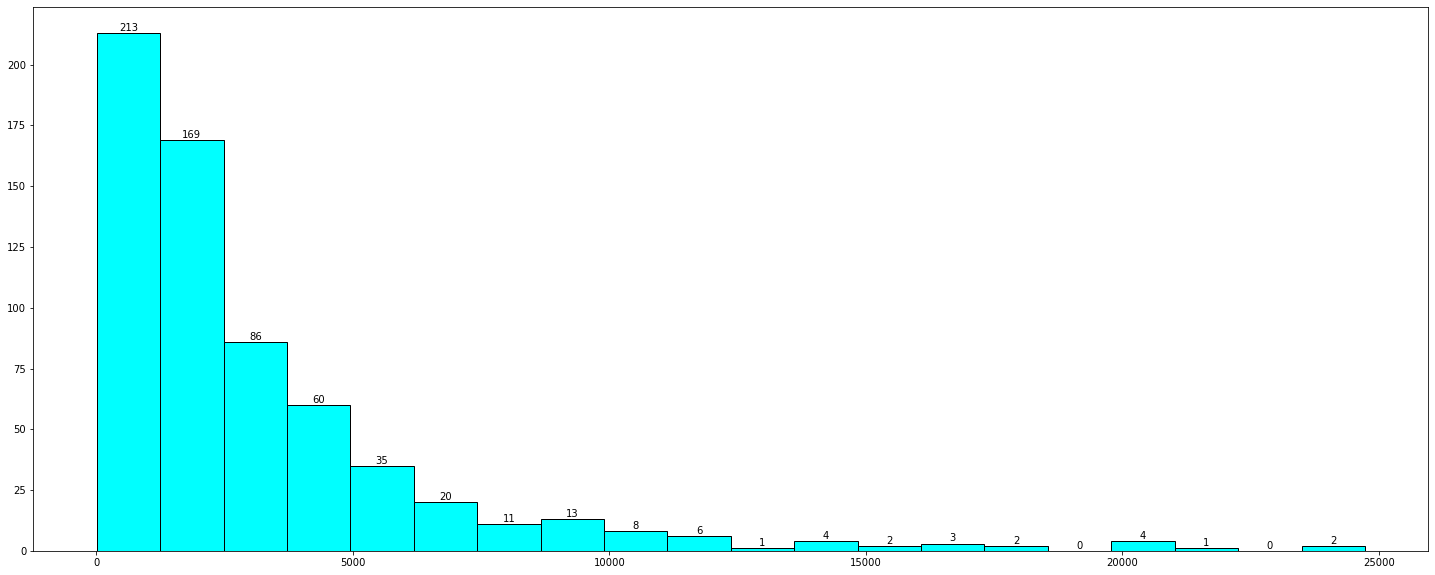

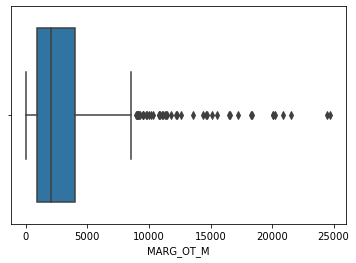

Description of MARG_OT_F
----------------------------------------------------------------------------
count      640.000000
mean      3539.323438
std       4115.191314
min         19.000000
25%       1071.750000
50%       2349.500000
75%       4400.500000
max      36377.000000
Name: MARG_OT_F, dtype: float64 Distribution of MARG_OT_F
----------------------------------------------------------------------------
BoxPlot of MARG_OT_F
----------------------------------------------------------------------------


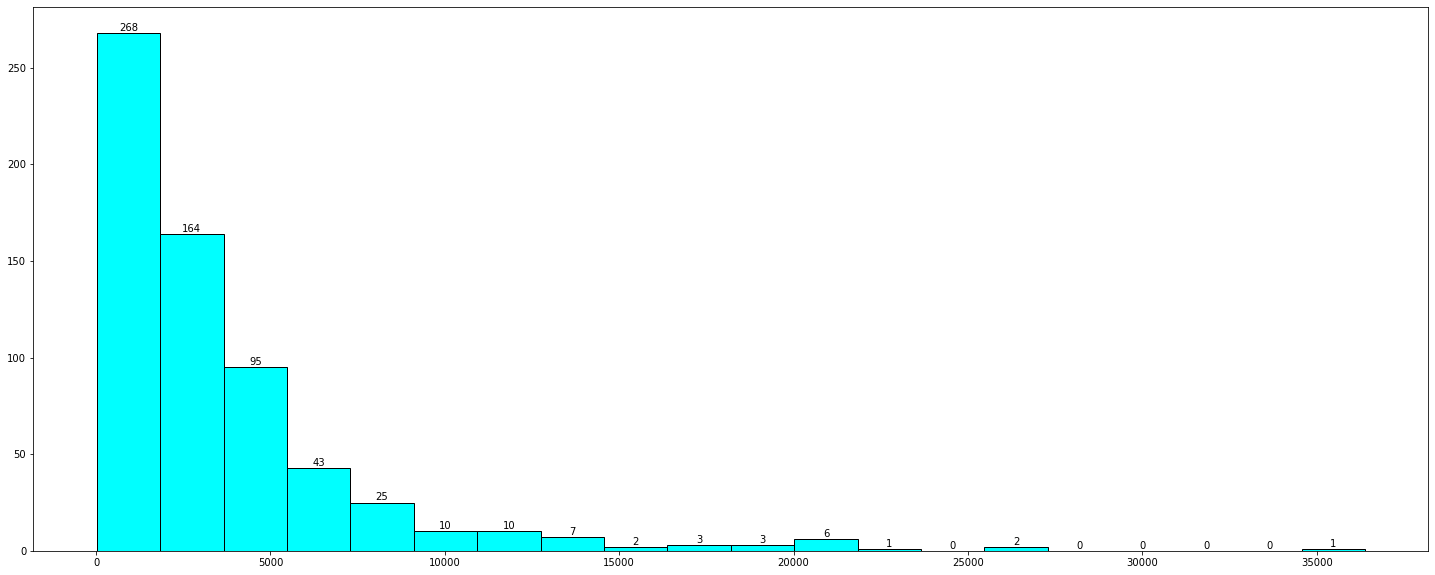

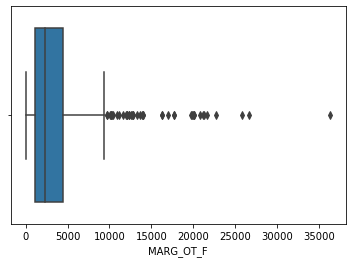

Description of MARGWORK_3_6_M
----------------------------------------------------------------------------
count       640.000000
mean      41948.168750
std       39045.316918
min         291.000000
25%       16208.250000
50%       30315.000000
75%       57218.750000
max      300937.000000
Name: MARGWORK_3_6_M, dtype: float64 Distribution of MARGWORK_3_6_M
----------------------------------------------------------------------------
BoxPlot of MARGWORK_3_6_M
----------------------------------------------------------------------------


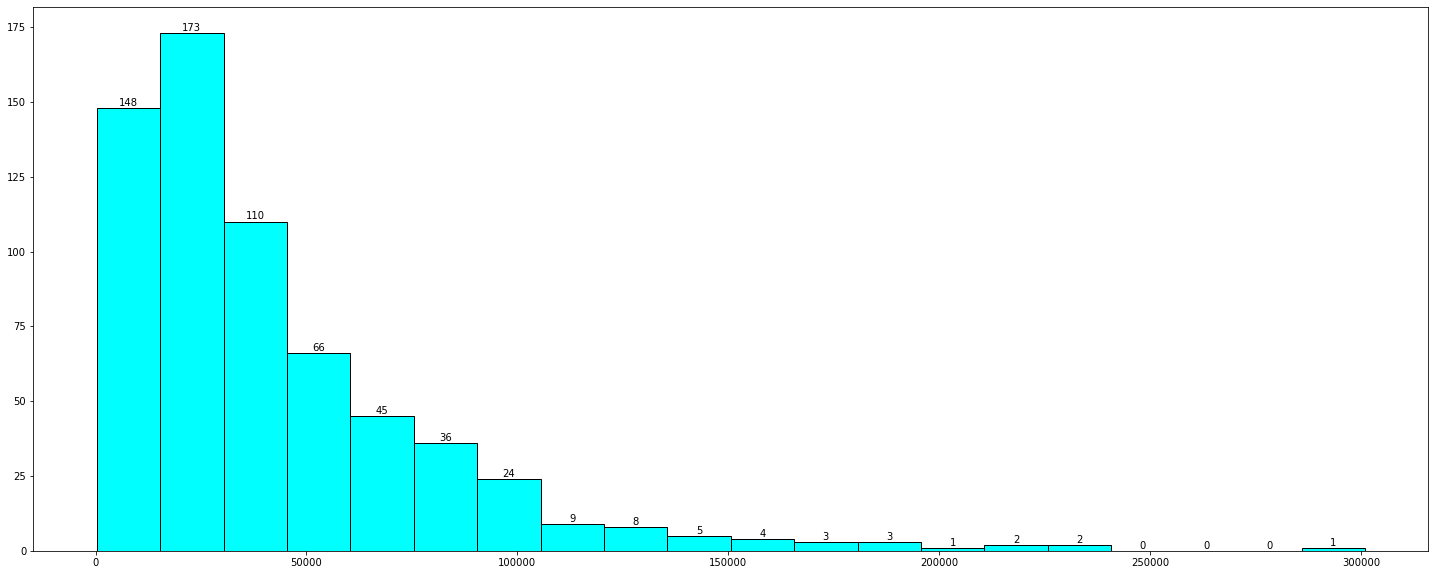

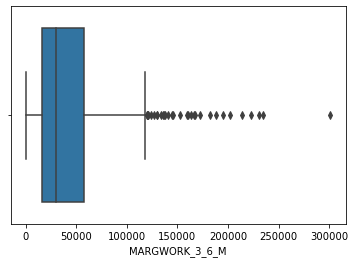

Description of MARGWORK_3_6_F
----------------------------------------------------------------------------
count       640.000000
mean      81076.323438
std       82970.406216
min         341.000000
25%       26619.500000
50%       56793.000000
75%      107924.000000
max      676450.000000
Name: MARGWORK_3_6_F, dtype: float64 Distribution of MARGWORK_3_6_F
----------------------------------------------------------------------------
BoxPlot of MARGWORK_3_6_F
----------------------------------------------------------------------------


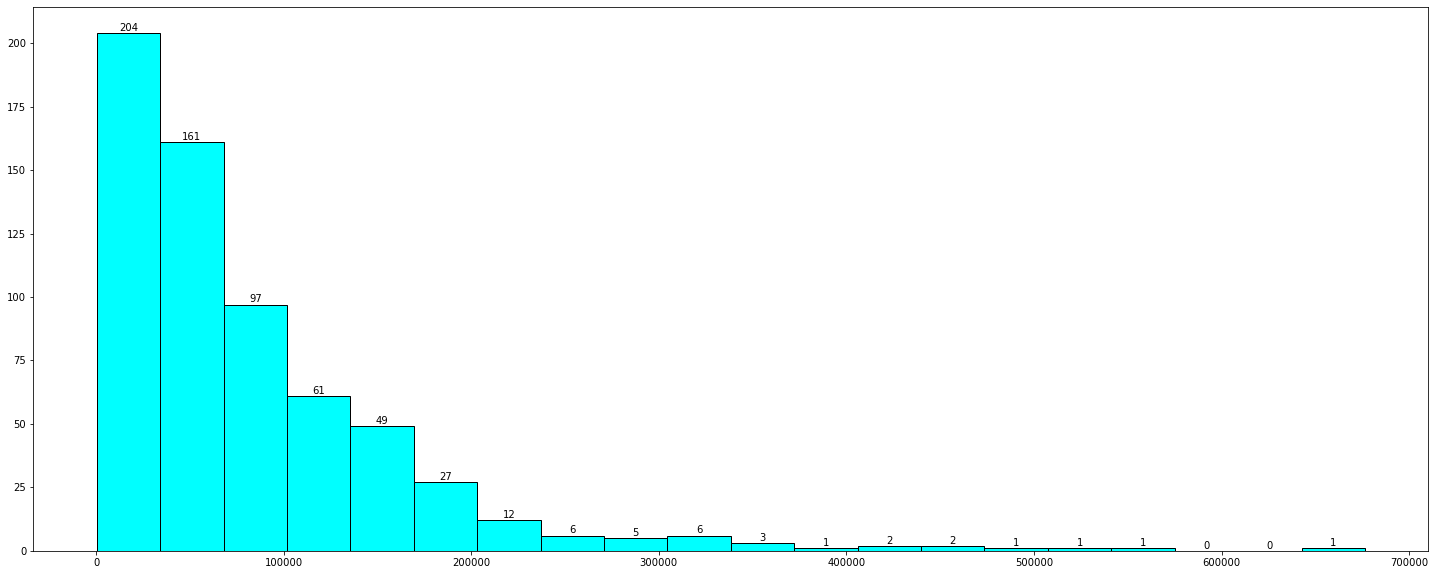

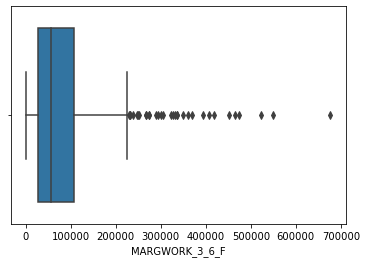

Description of MARG_CL_3_6_M
----------------------------------------------------------------------------
count      640.000000
mean      6394.987500
std       6019.806644
min         27.000000
25%       2372.000000
50%       4630.000000
75%       8167.000000
max      39106.000000
Name: MARG_CL_3_6_M, dtype: float64 Distribution of MARG_CL_3_6_M
----------------------------------------------------------------------------
BoxPlot of MARG_CL_3_6_M
----------------------------------------------------------------------------


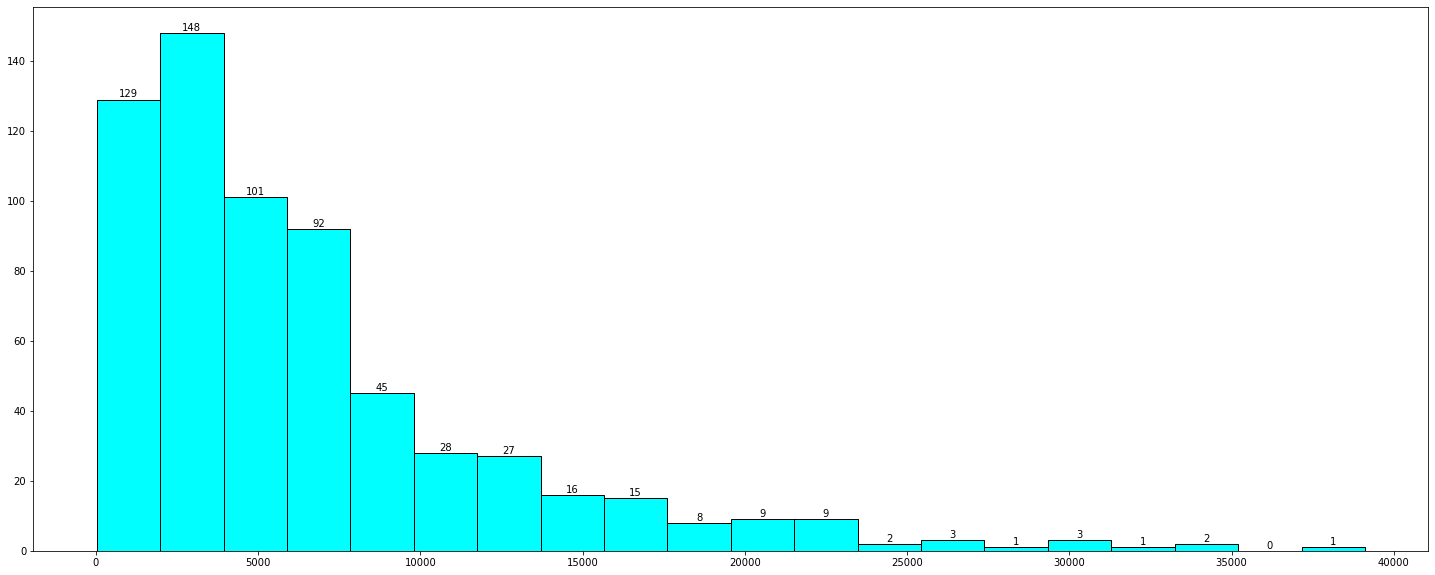

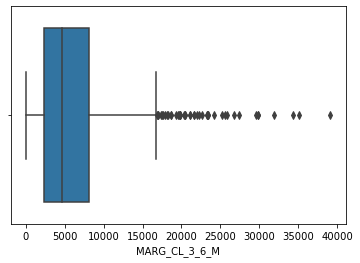

Description of MARG_CL_3_6_F
----------------------------------------------------------------------------
count      640.000000
mean     10339.864063
std       8467.473429
min         85.000000
25%       4351.500000
50%       8295.000000
75%      15102.000000
max      50065.000000
Name: MARG_CL_3_6_F, dtype: float64 Distribution of MARG_CL_3_6_F
----------------------------------------------------------------------------
BoxPlot of MARG_CL_3_6_F
----------------------------------------------------------------------------


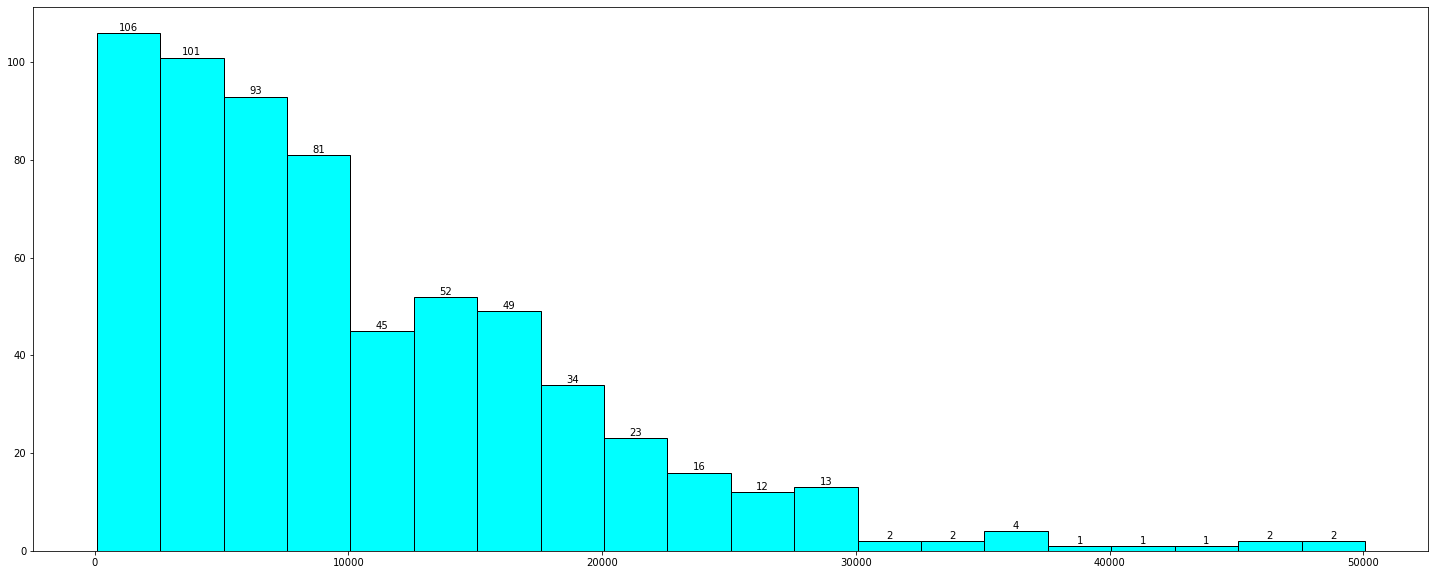

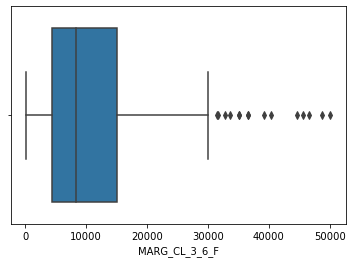

Description of MARG_AL_3_6_M
----------------------------------------------------------------------------
count     640.000000
mean      789.848438
std       905.639279
min         0.000000
25%       235.500000
50%       480.500000
75%       986.000000
max      7426.000000
Name: MARG_AL_3_6_M, dtype: float64 Distribution of MARG_AL_3_6_M
----------------------------------------------------------------------------
BoxPlot of MARG_AL_3_6_M
----------------------------------------------------------------------------


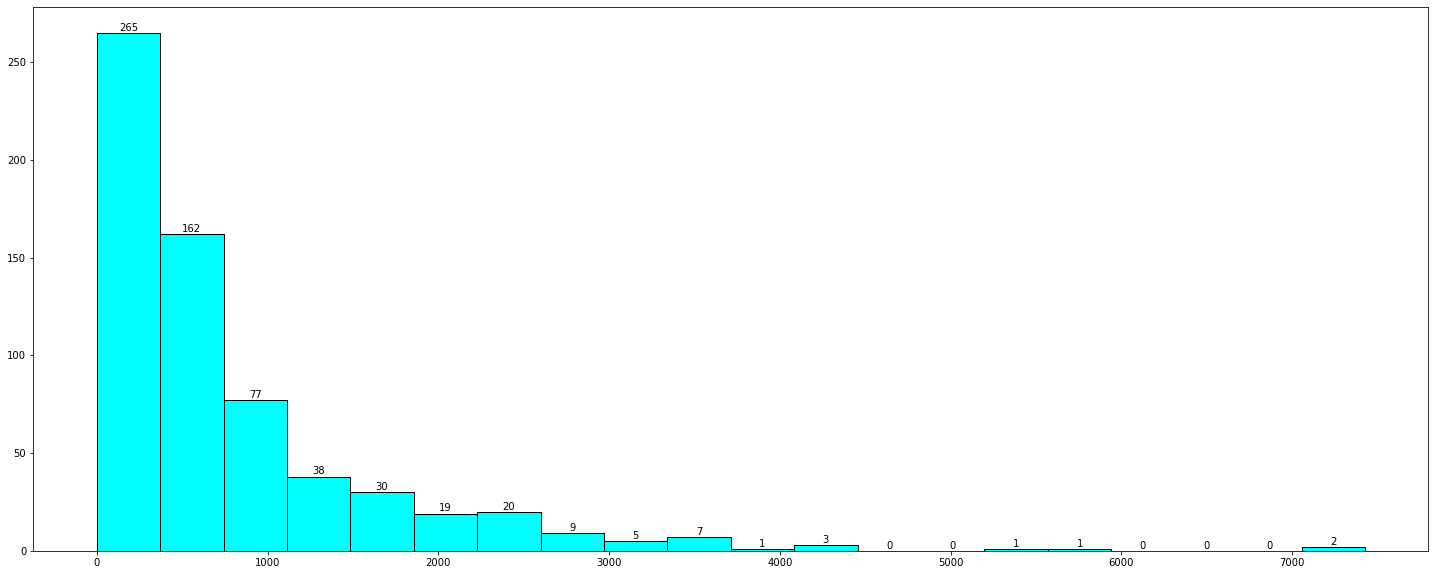

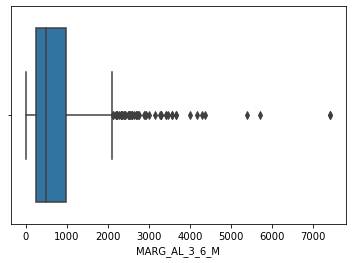

Description of MARG_AL_3_6_F
----------------------------------------------------------------------------
count      640.000000
mean      1749.584375
std       2496.541514
min          0.000000
25%        497.250000
50%        985.500000
75%       2059.000000
max      27171.000000
Name: MARG_AL_3_6_F, dtype: float64 Distribution of MARG_AL_3_6_F
----------------------------------------------------------------------------
BoxPlot of MARG_AL_3_6_F
----------------------------------------------------------------------------


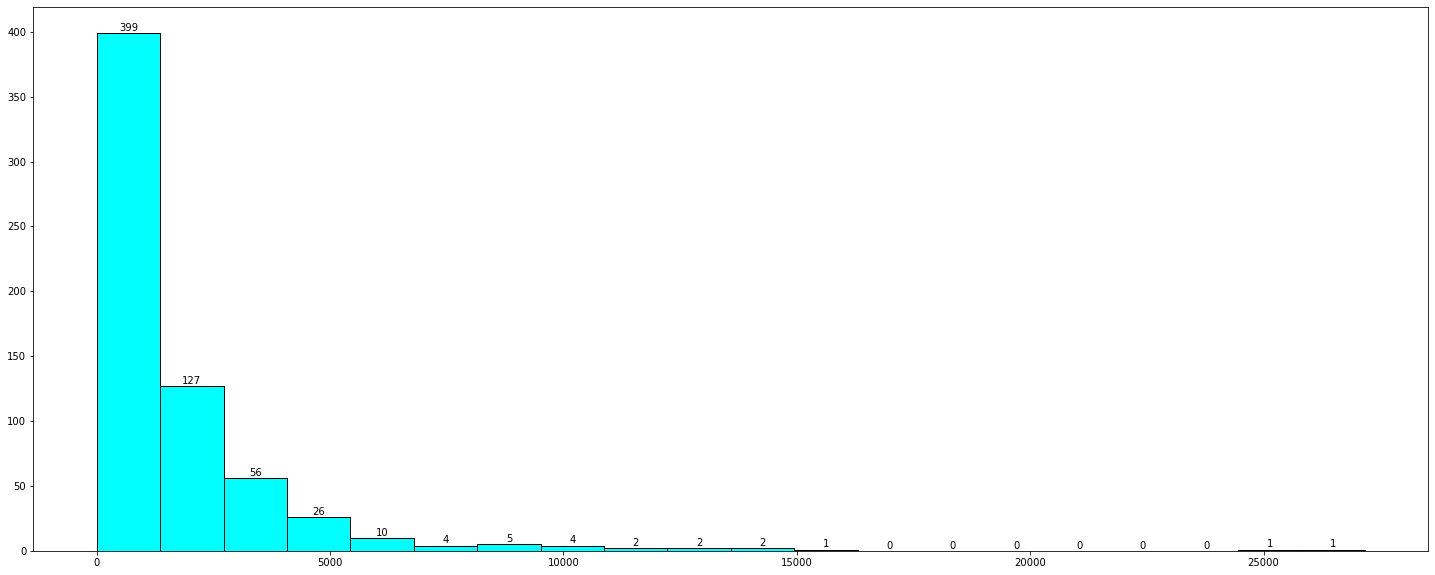

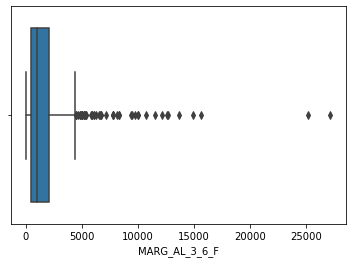

Description of MARG_HH_3_6_M
----------------------------------------------------------------------------
count      640.000000
mean      2743.635938
std       3059.586387
min          0.000000
25%        718.750000
50%       1714.500000
75%       3702.250000
max      19343.000000
Name: MARG_HH_3_6_M, dtype: float64 Distribution of MARG_HH_3_6_M
----------------------------------------------------------------------------
BoxPlot of MARG_HH_3_6_M
----------------------------------------------------------------------------


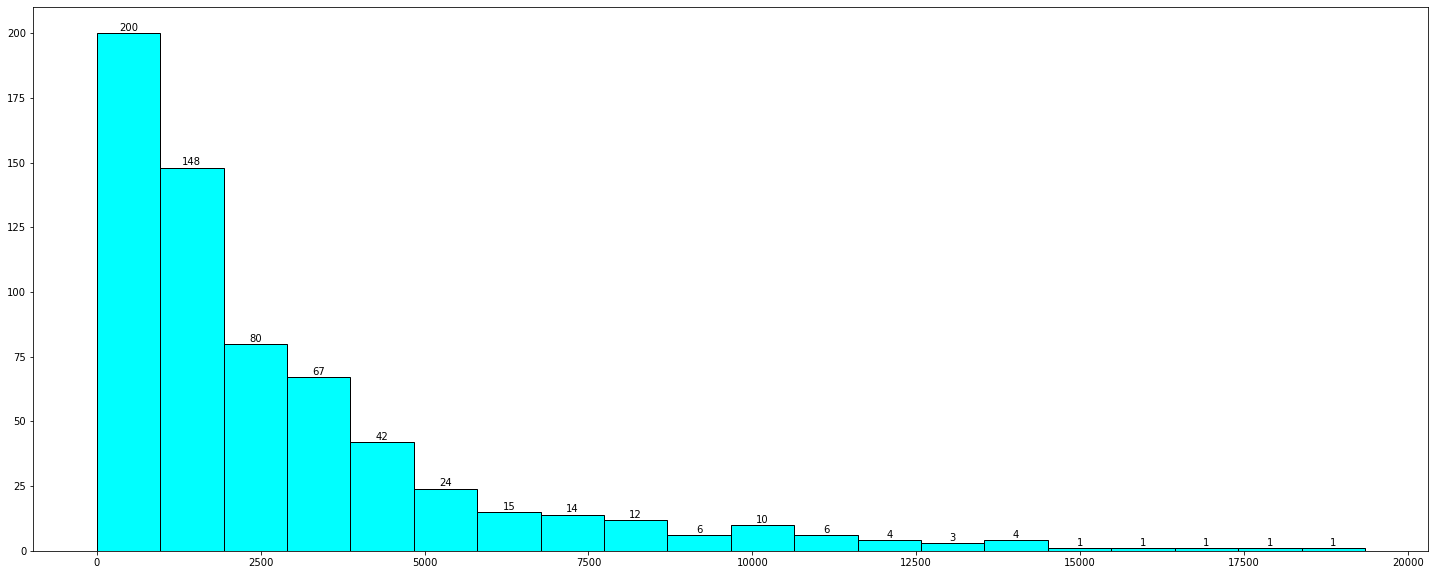

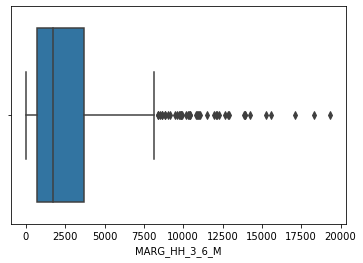

Description of MARG_HH_3_6_F
----------------------------------------------------------------------------
count      640.00000
mean      5169.85000
std       5335.64096
min          0.00000
25%       1113.75000
50%       3294.00000
75%       7502.25000
max      36253.00000
Name: MARG_HH_3_6_F, dtype: float64 Distribution of MARG_HH_3_6_F
----------------------------------------------------------------------------
BoxPlot of MARG_HH_3_6_F
----------------------------------------------------------------------------


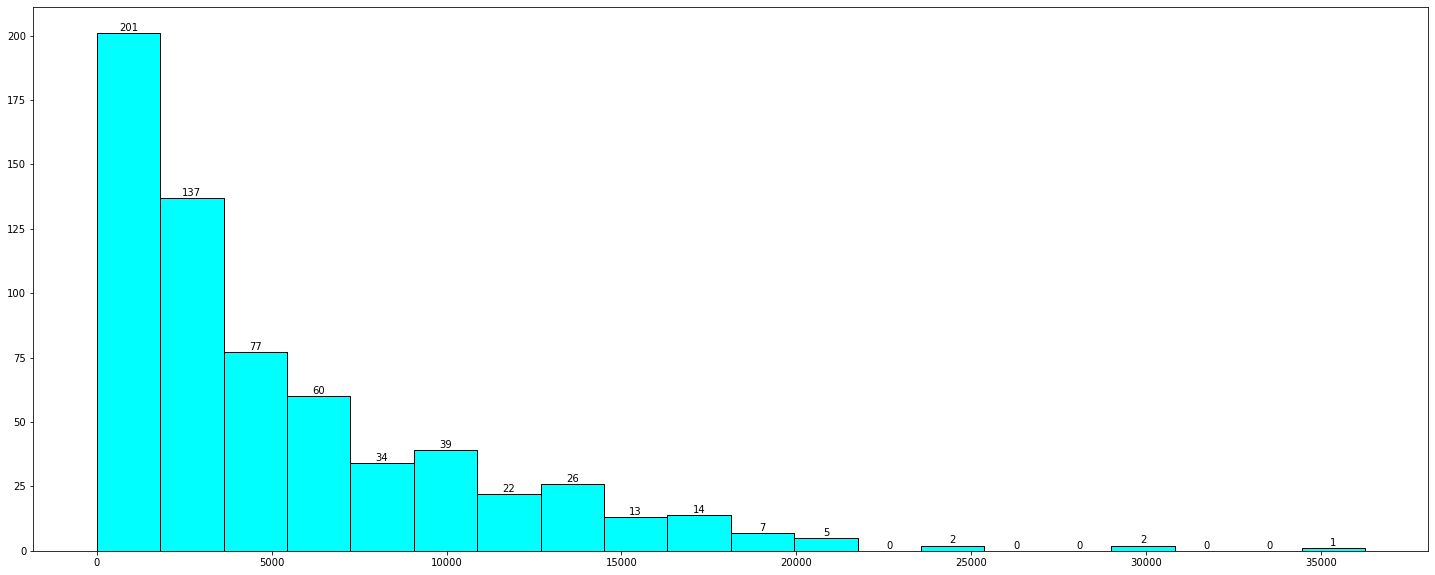

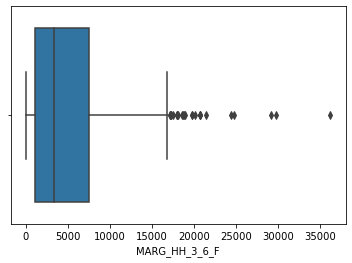

Description of MARG_OT_3_6_M
----------------------------------------------------------------------------
count     640.000000
mean      245.362500
std       358.728567
min         0.000000
25%        58.000000
50%       129.500000
75%       276.000000
max      3535.000000
Name: MARG_OT_3_6_M, dtype: float64 Distribution of MARG_OT_3_6_M
----------------------------------------------------------------------------
BoxPlot of MARG_OT_3_6_M
----------------------------------------------------------------------------


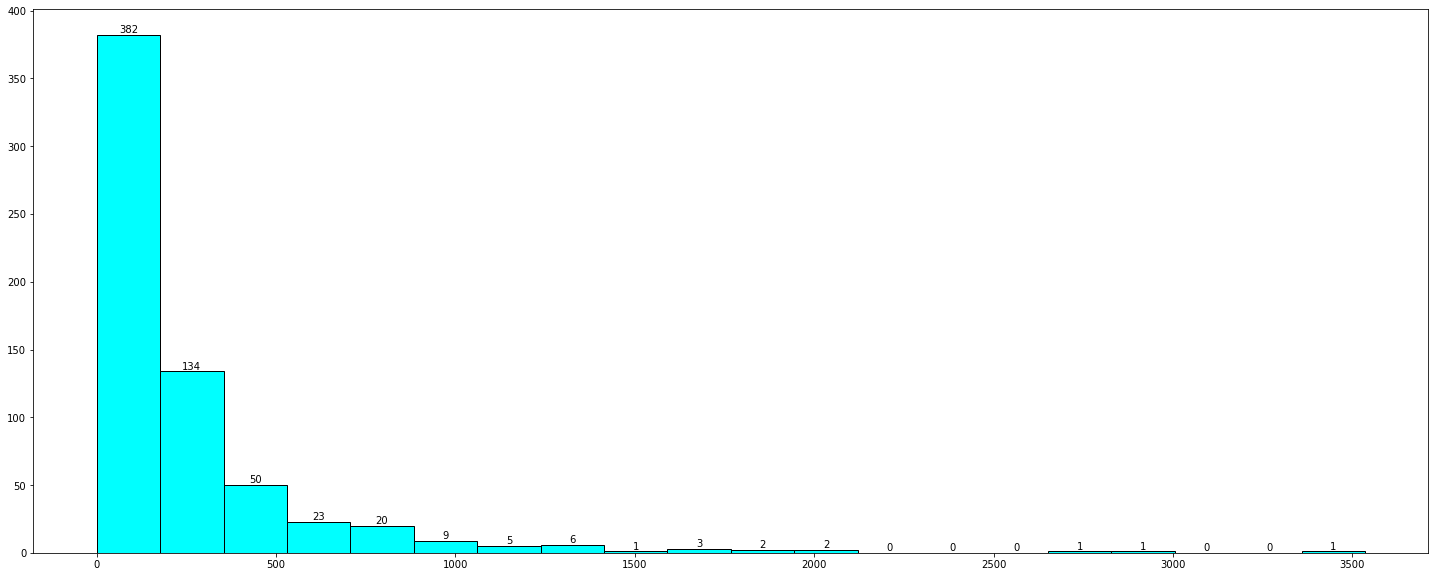

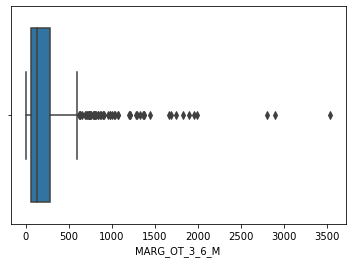

Description of MARG_OT_3_6_F
----------------------------------------------------------------------------
count      640.000000
mean       585.884375
std        900.025817
min          0.000000
25%        127.750000
50%        320.500000
75%        719.250000
max      12094.000000
Name: MARG_OT_3_6_F, dtype: float64 Distribution of MARG_OT_3_6_F
----------------------------------------------------------------------------
BoxPlot of MARG_OT_3_6_F
----------------------------------------------------------------------------


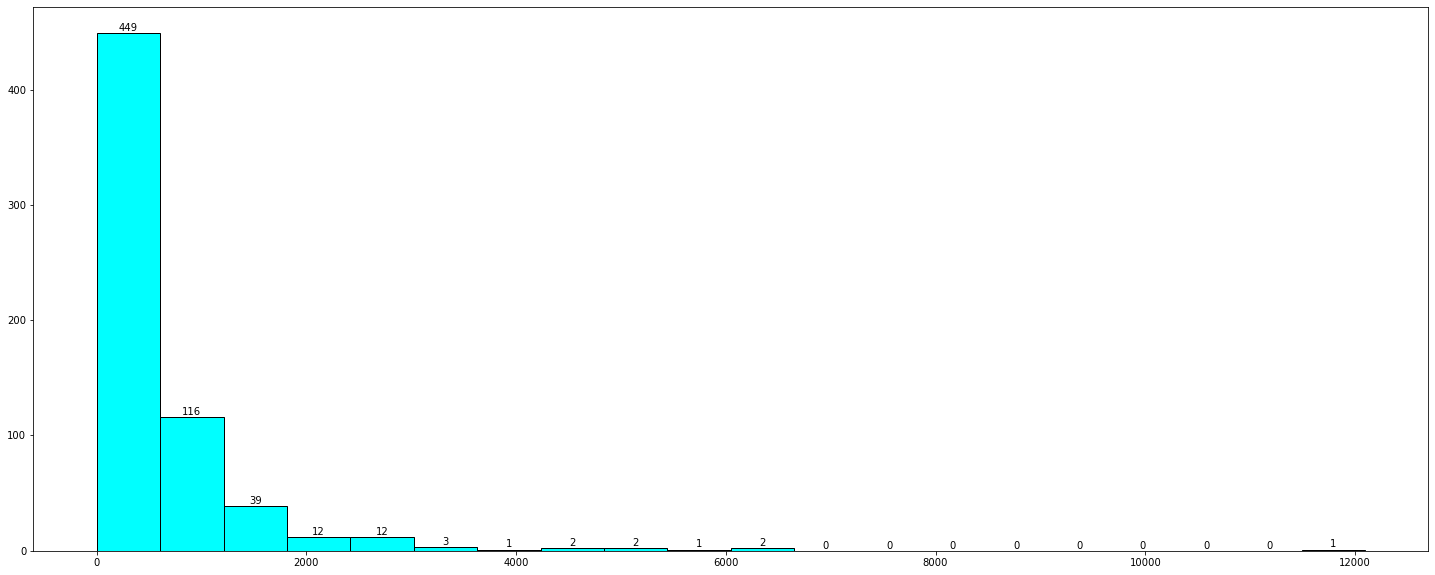

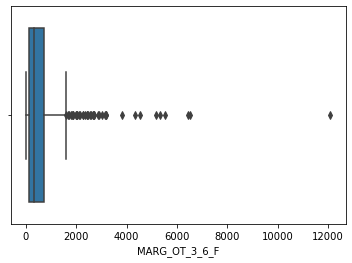

Description of MARGWORK_0_3_M
----------------------------------------------------------------------------
count      640.000000
mean      2616.140625
std       3036.964381
min          7.000000
25%        755.000000
50%       1681.500000
75%       3320.250000
max      20648.000000
Name: MARGWORK_0_3_M, dtype: float64 Distribution of MARGWORK_0_3_M
----------------------------------------------------------------------------
BoxPlot of MARGWORK_0_3_M
----------------------------------------------------------------------------


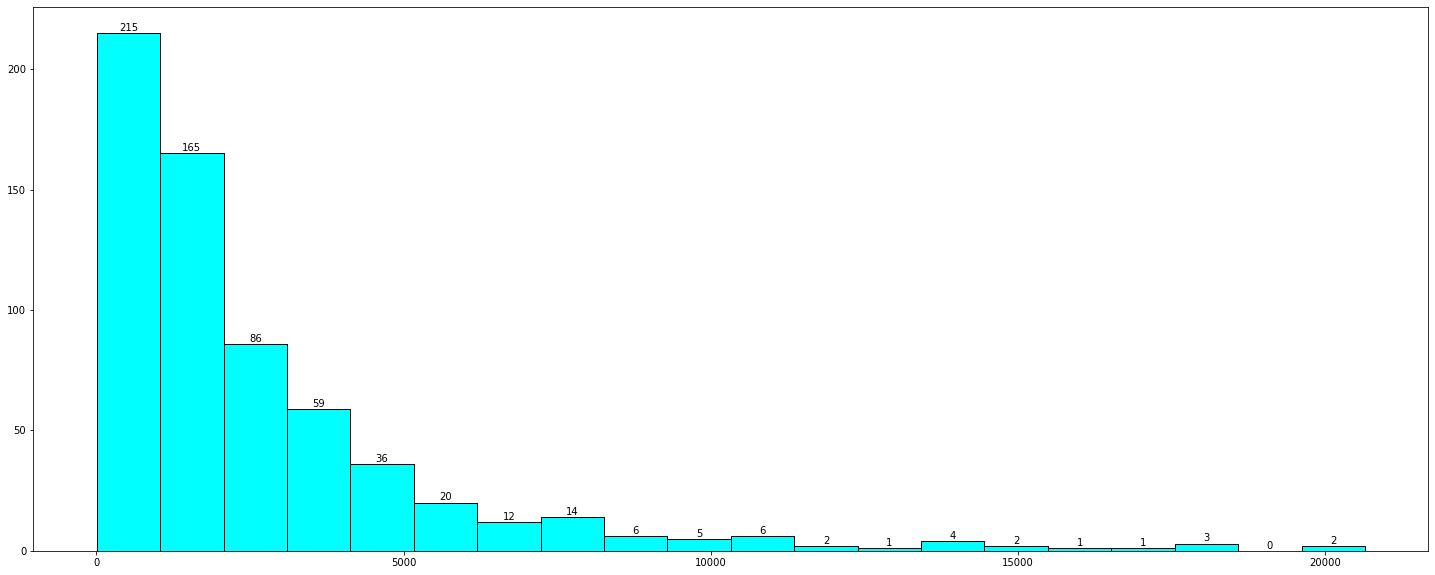

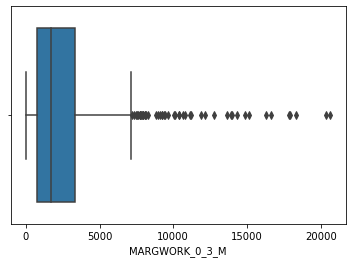

Description of MARGWORK_0_3_F
----------------------------------------------------------------------------
count      640.000000
mean      2834.545312
std       3327.836932
min         14.000000
25%        833.500000
50%       1834.500000
75%       3610.500000
max      25844.000000
Name: MARGWORK_0_3_F, dtype: float64 Distribution of MARGWORK_0_3_F
----------------------------------------------------------------------------
BoxPlot of MARGWORK_0_3_F
----------------------------------------------------------------------------


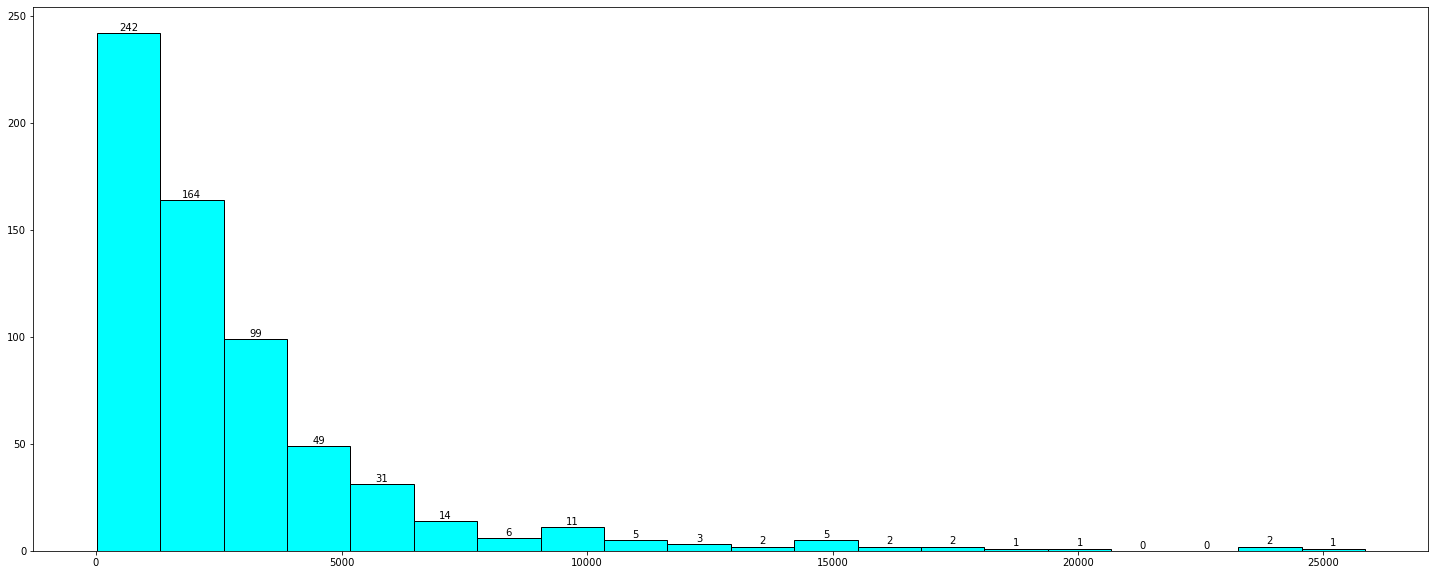

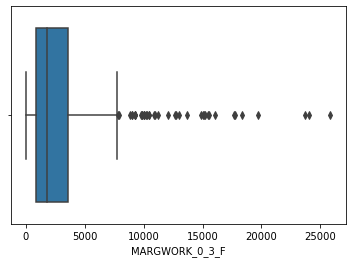

Description of MARG_CL_0_3_M
----------------------------------------------------------------------------
count     640.000000
mean     1392.973438
std      1489.707052
min         4.000000
25%       489.500000
50%       949.000000
75%      1714.000000
max      9875.000000
Name: MARG_CL_0_3_M, dtype: float64 Distribution of MARG_CL_0_3_M
----------------------------------------------------------------------------
BoxPlot of MARG_CL_0_3_M
----------------------------------------------------------------------------


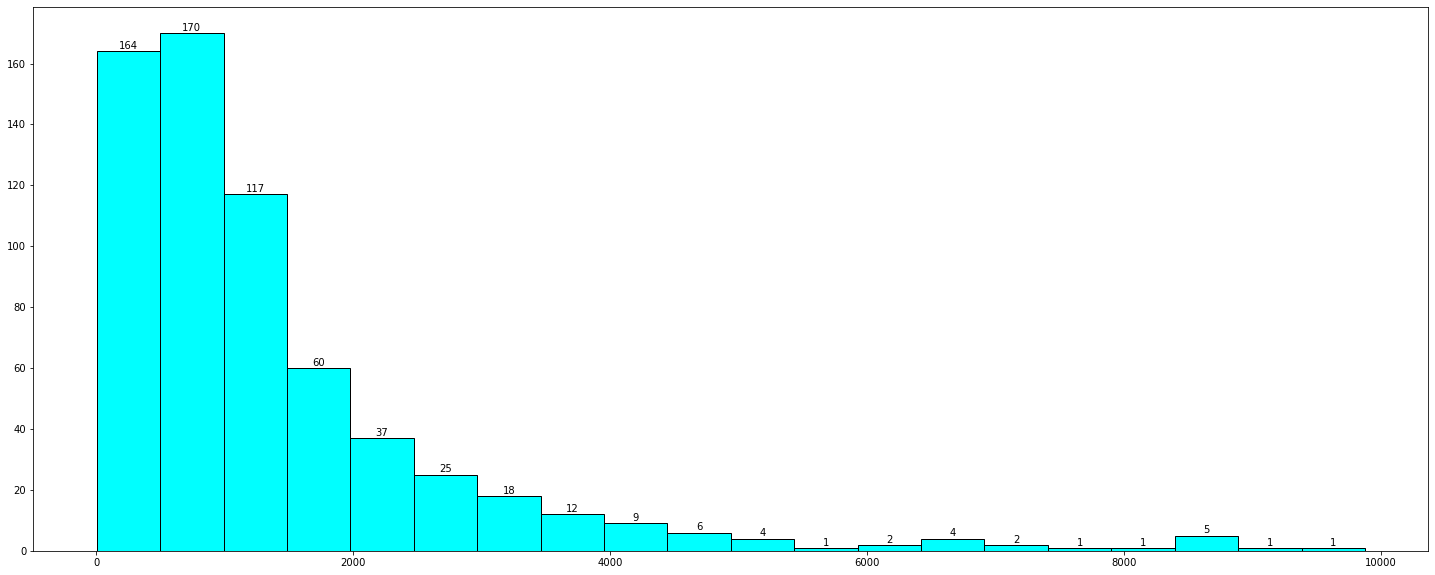

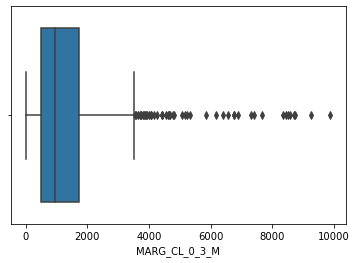

Description of MARG_CL_0_3_F
----------------------------------------------------------------------------
count      640.000000
mean      2757.050000
std       2788.776676
min         30.000000
25%        957.250000
50%       1928.000000
75%       3599.750000
max      21611.000000
Name: MARG_CL_0_3_F, dtype: float64 Distribution of MARG_CL_0_3_F
----------------------------------------------------------------------------
BoxPlot of MARG_CL_0_3_F
----------------------------------------------------------------------------


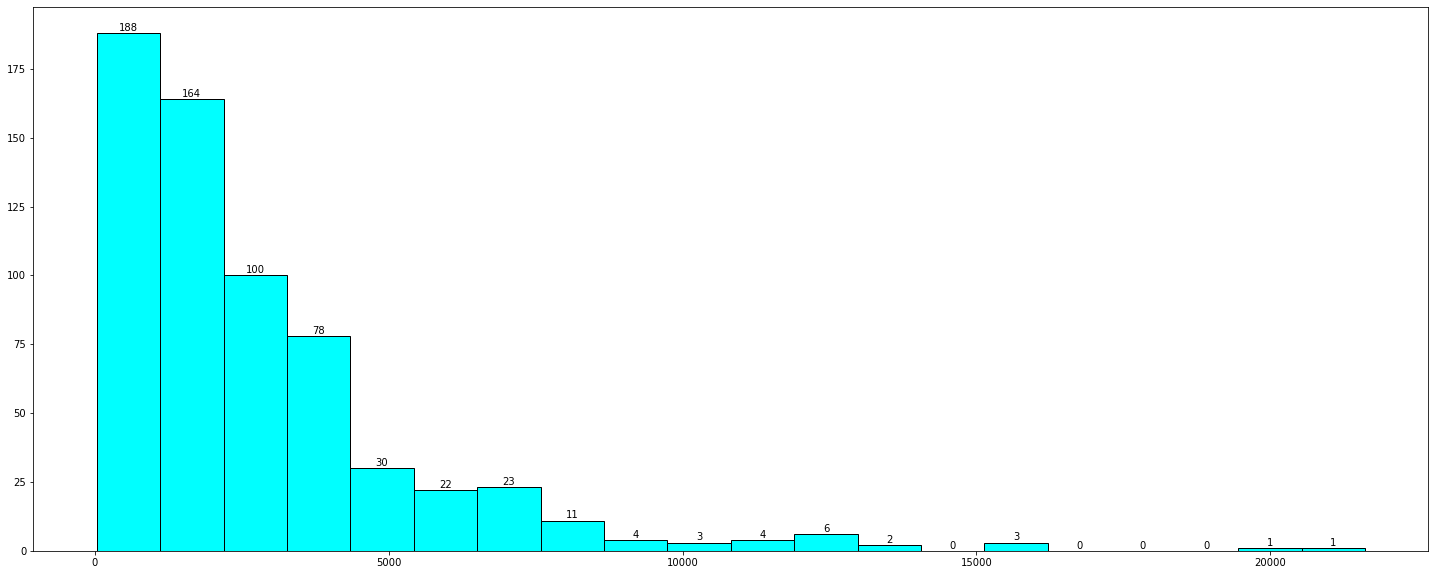

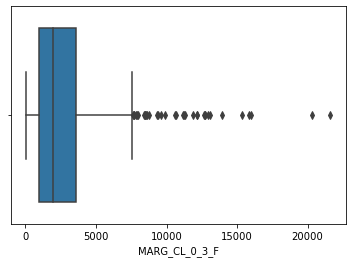

Description of MARG_AL_0_3_M
----------------------------------------------------------------------------
count     640.000000
mean      250.889062
std       453.336594
min         0.000000
25%        47.000000
50%       114.500000
75%       270.750000
max      5775.000000
Name: MARG_AL_0_3_M, dtype: float64 Distribution of MARG_AL_0_3_M
----------------------------------------------------------------------------
BoxPlot of MARG_AL_0_3_M
----------------------------------------------------------------------------


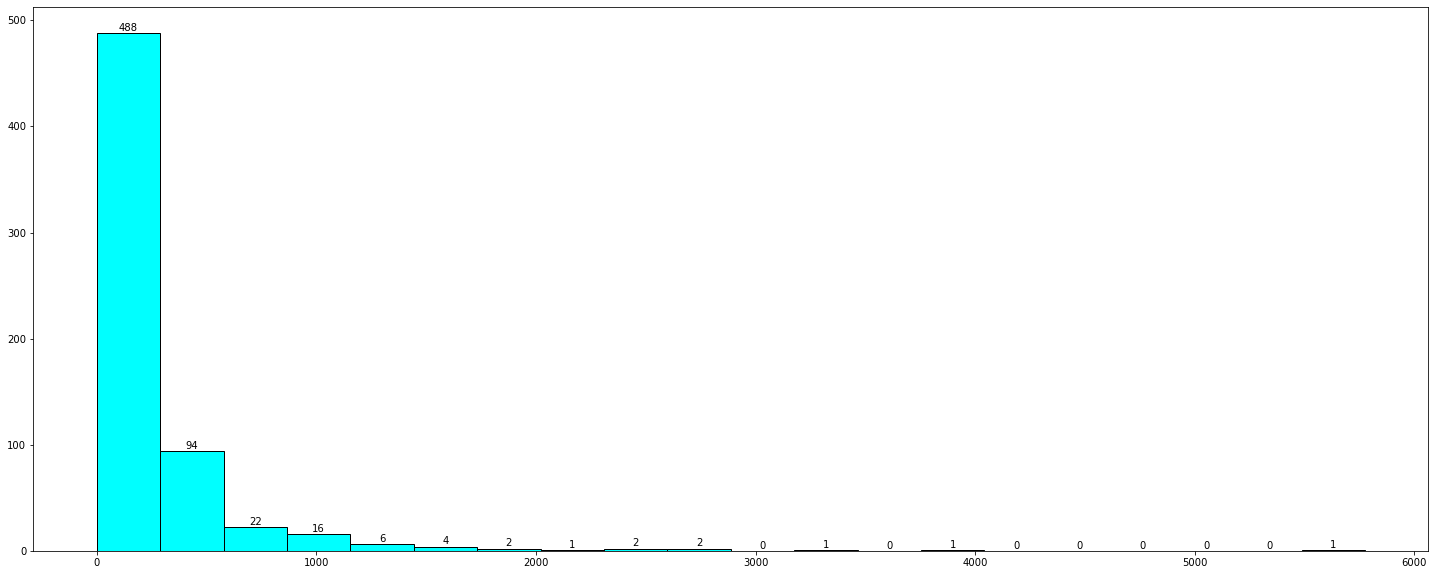

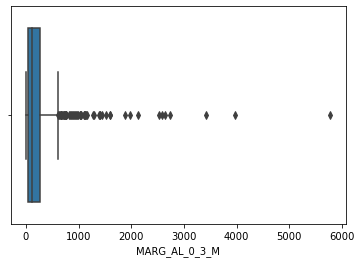

Description of MARG_AL_0_3_F
----------------------------------------------------------------------------
count      640.000000
mean       558.098438
std       1117.642748
min          0.000000
25%        109.000000
50%        247.500000
75%        568.750000
max      17153.000000
Name: MARG_AL_0_3_F, dtype: float64 Distribution of MARG_AL_0_3_F
----------------------------------------------------------------------------
BoxPlot of MARG_AL_0_3_F
----------------------------------------------------------------------------


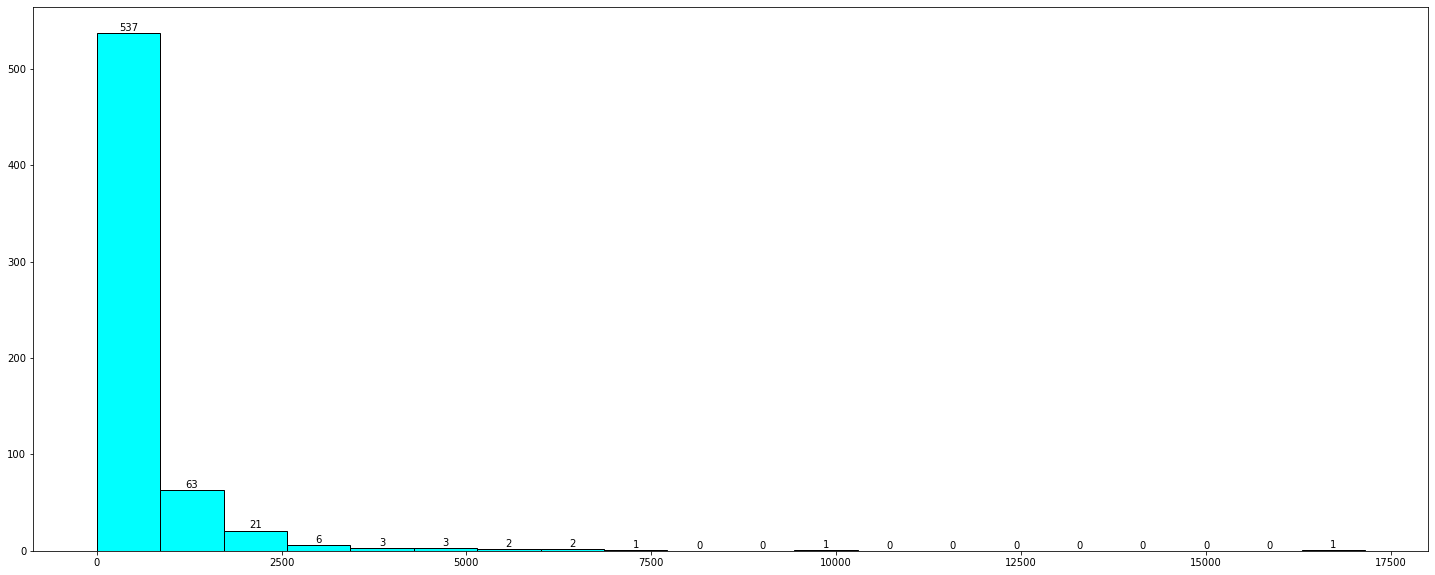

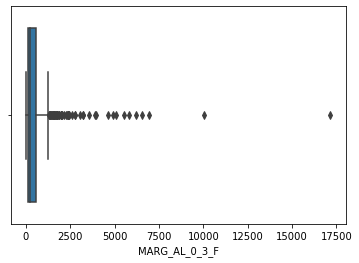

Description of MARG_HH_0_3_M
----------------------------------------------------------------------------
count     640.000000
mean      560.690625
std       762.578991
min         0.000000
25%       136.500000
50%       308.000000
75%       642.000000
max      6116.000000
Name: MARG_HH_0_3_M, dtype: float64 Distribution of MARG_HH_0_3_M
----------------------------------------------------------------------------
BoxPlot of MARG_HH_0_3_M
----------------------------------------------------------------------------


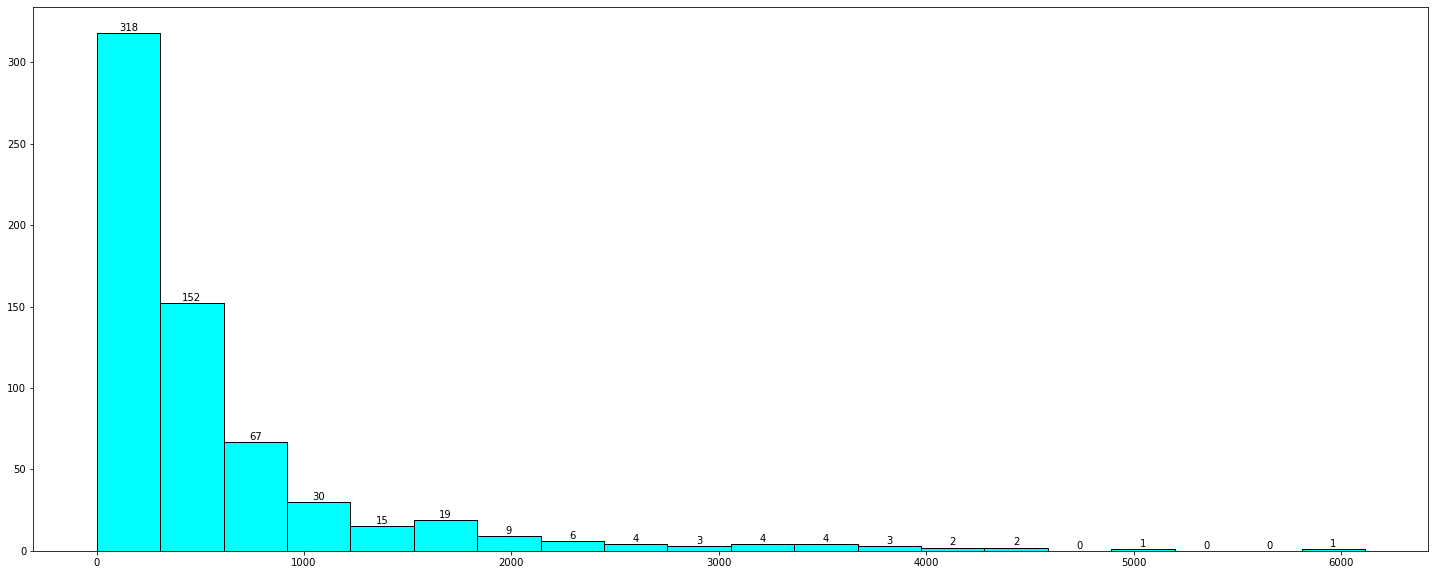

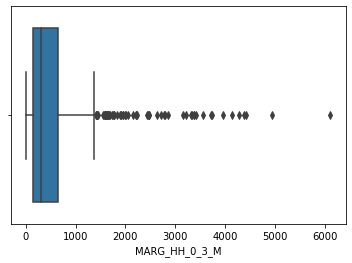

Description of MARG_HH_0_3_F
----------------------------------------------------------------------------
count      640.000000
mean      1293.431250
std       1585.377936
min          0.000000
25%        298.000000
50%        717.000000
75%       1710.750000
max      13714.000000
Name: MARG_HH_0_3_F, dtype: float64 Distribution of MARG_HH_0_3_F
----------------------------------------------------------------------------
BoxPlot of MARG_HH_0_3_F
----------------------------------------------------------------------------


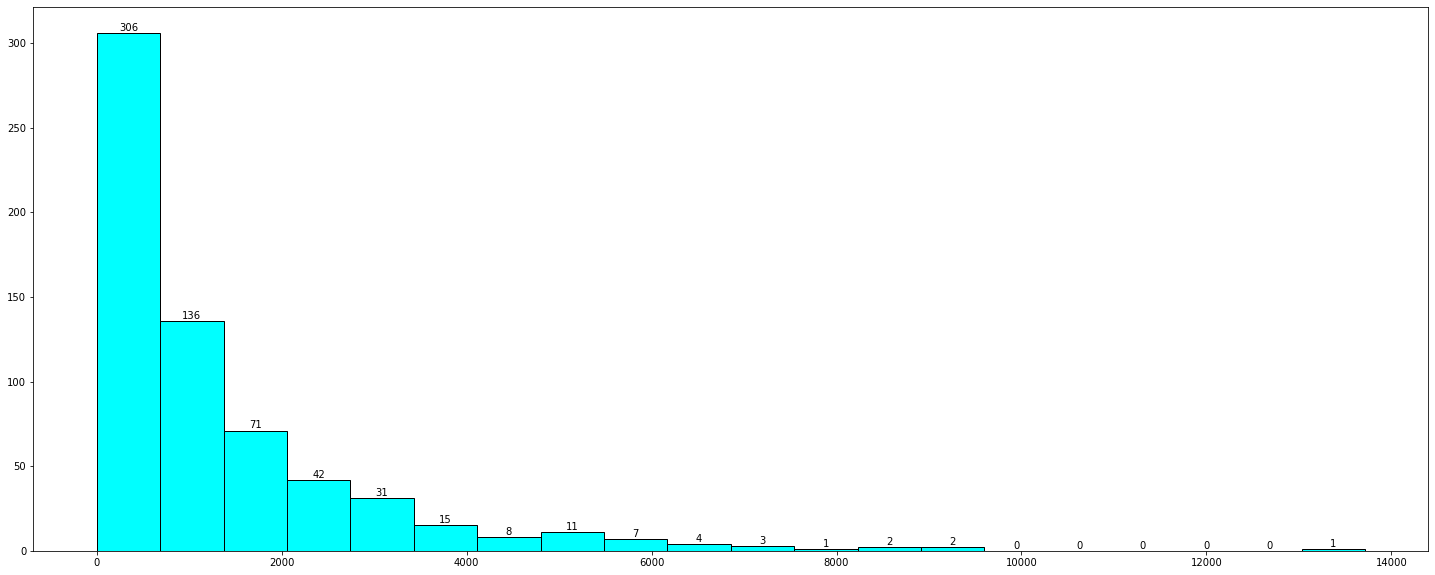

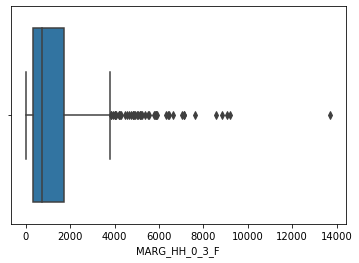

Description of MARG_OT_0_3_M
----------------------------------------------------------------------------
count    640.000000
mean      71.379688
std      107.897627
min        0.000000
25%       14.000000
50%       35.000000
75%       79.000000
max      895.000000
Name: MARG_OT_0_3_M, dtype: float64 Distribution of MARG_OT_0_3_M
----------------------------------------------------------------------------
BoxPlot of MARG_OT_0_3_M
----------------------------------------------------------------------------


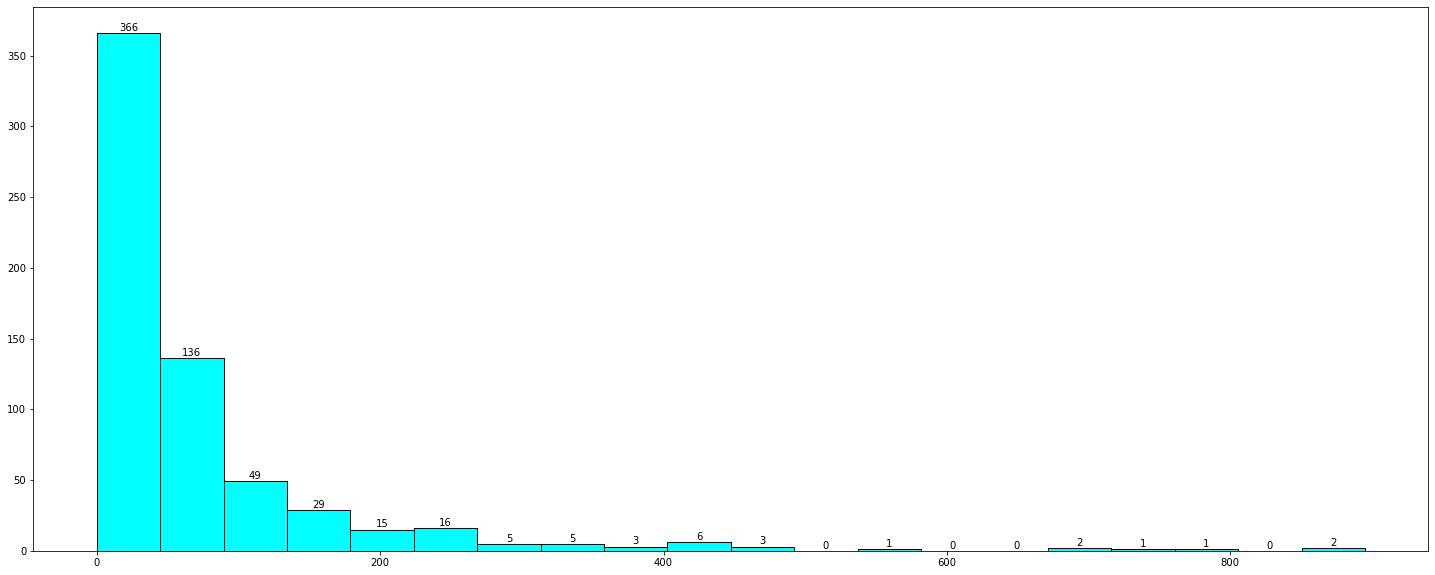

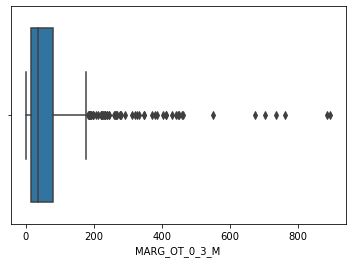

Description of MARG_OT_0_3_F
----------------------------------------------------------------------------
count     640.000000
mean      200.742188
std       309.740854
min         0.000000
25%        43.000000
50%       113.000000
75%       240.000000
max      3354.000000
Name: MARG_OT_0_3_F, dtype: float64 Distribution of MARG_OT_0_3_F
----------------------------------------------------------------------------
BoxPlot of MARG_OT_0_3_F
----------------------------------------------------------------------------


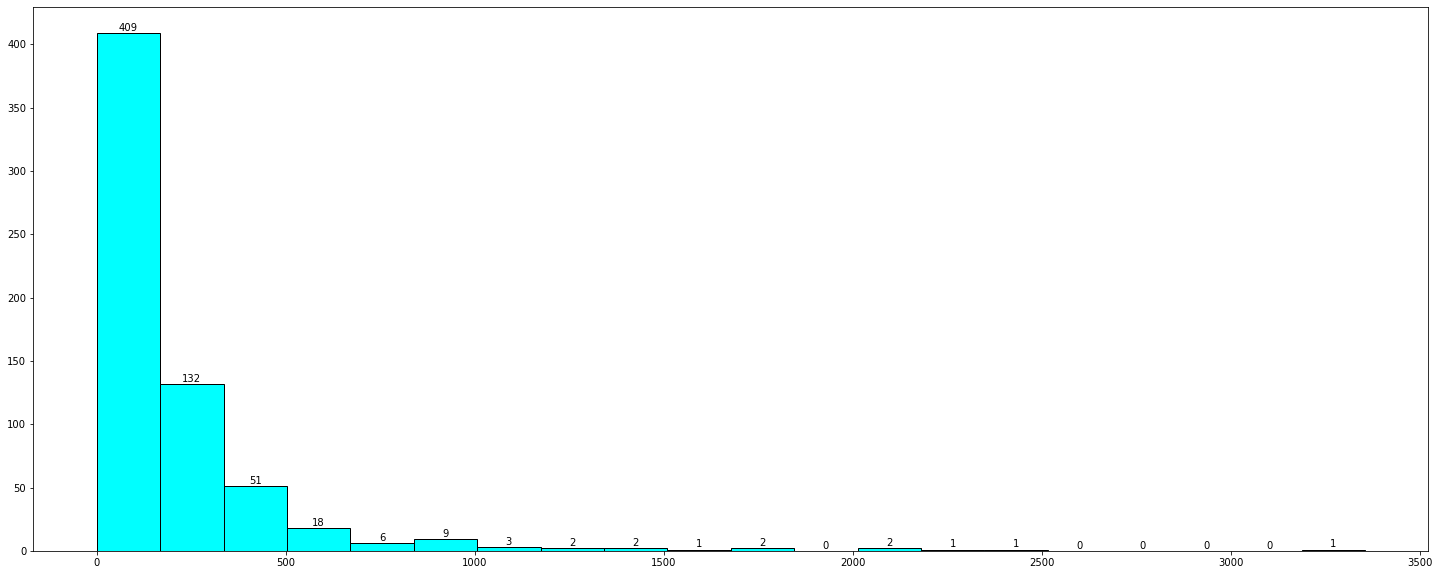

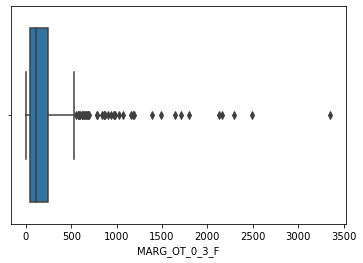

Description of NON_WORK_M
----------------------------------------------------------------------------
count     640.000000
mean      510.014063
std       610.603187
min         0.000000
25%       161.000000
50%       326.000000
75%       604.500000
max      6456.000000
Name: NON_WORK_M, dtype: float64 Distribution of NON_WORK_M
----------------------------------------------------------------------------
BoxPlot of NON_WORK_M
----------------------------------------------------------------------------


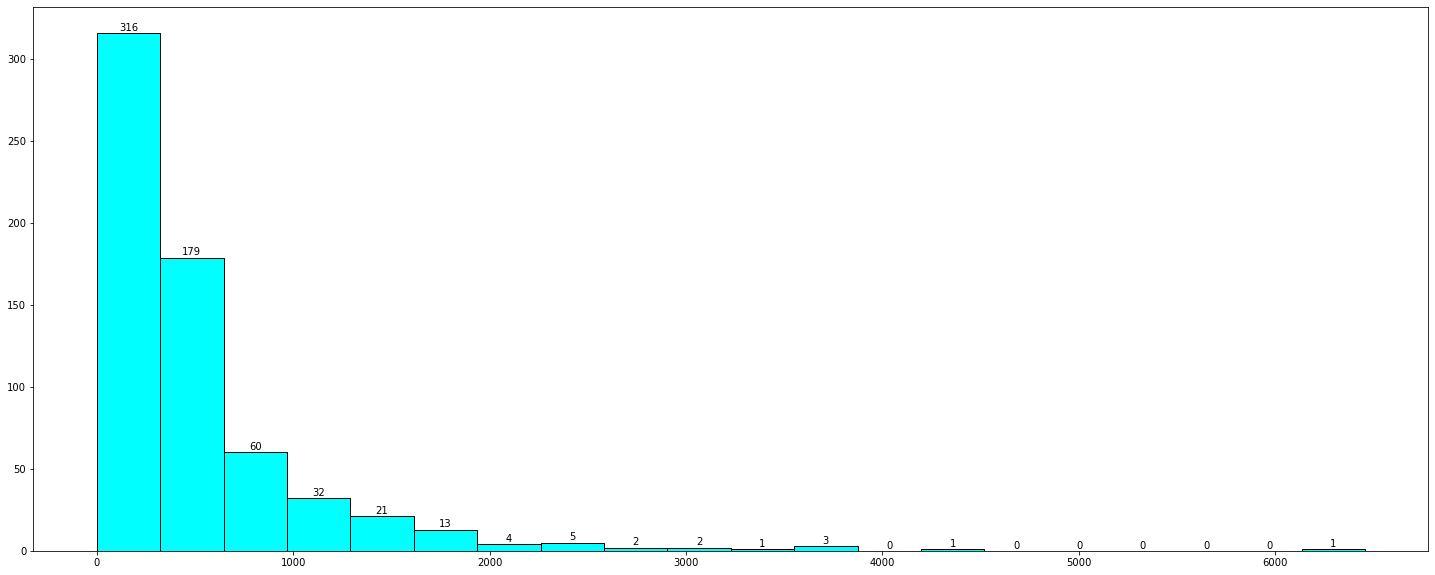

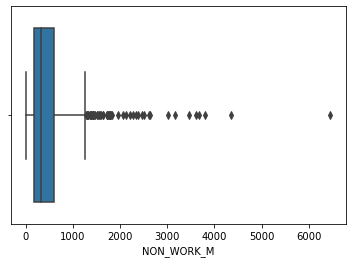

Description of NON_WORK_F
----------------------------------------------------------------------------
count      640.000000
mean       704.778125
std        910.209225
min          5.000000
25%        220.500000
50%        464.500000
75%        853.500000
max      10533.000000
Name: NON_WORK_F, dtype: float64 Distribution of NON_WORK_F
----------------------------------------------------------------------------
BoxPlot of NON_WORK_F
----------------------------------------------------------------------------


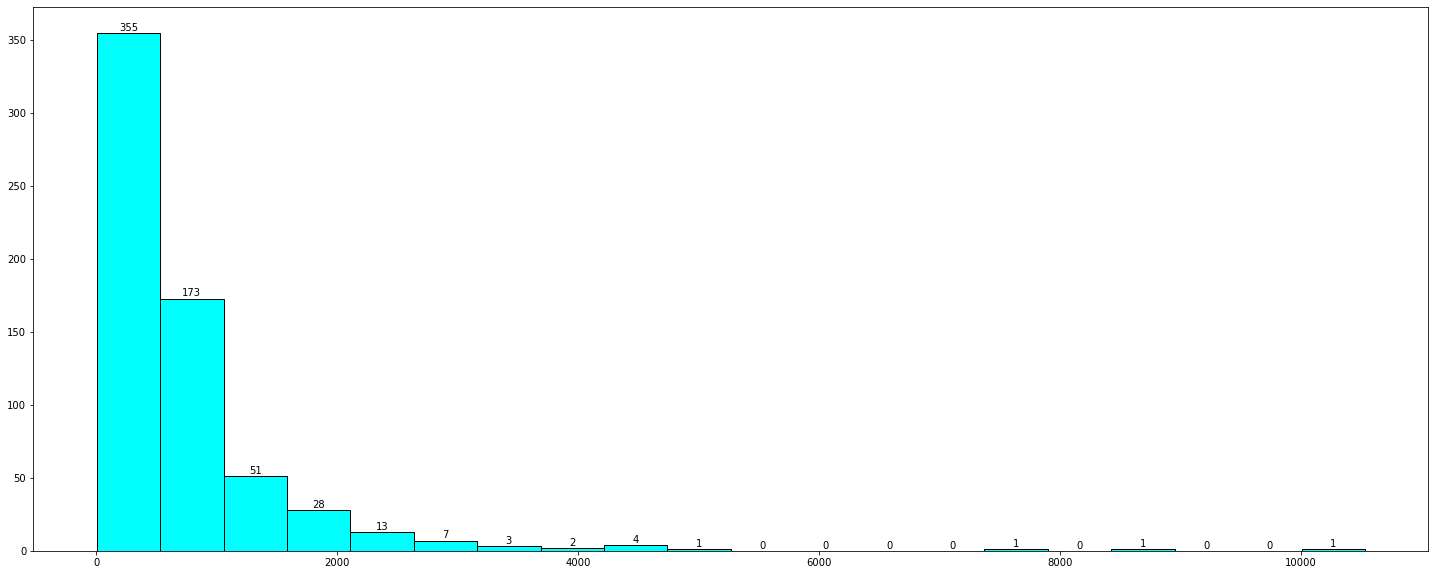

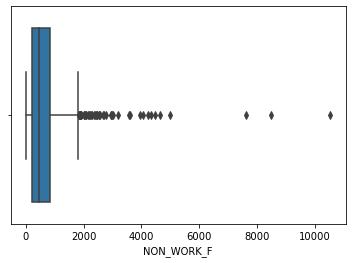

In [131]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

ValueError: num must be 1 <= num <= 12, not 13

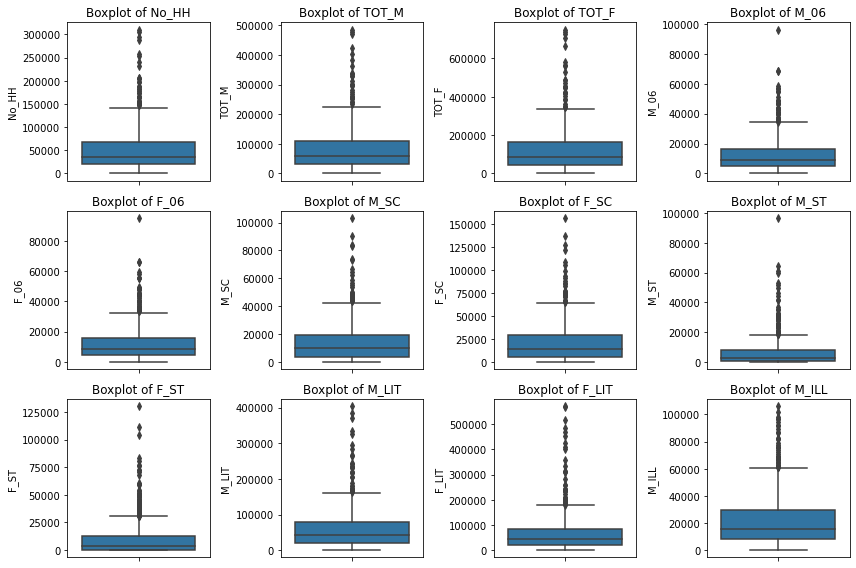

In [152]:
#Check for presence of outliers in each feature
plt.figure(figsize = (12,8))
feature_list = df_num.columns
for i in range(len(feature_list)):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y = df[feature_list[i]], data = df_num)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [153]:
#Define a function which returns the Upper and Lower limit to detect outliers for each feature
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range  

In [154]:
#Cap & floor the values beyond the outlier boundaries
for i in feature_list:
    LL, UL = remove_outlier(df_num[i])
    df_num[i] = np.where(df_num[i] > UL, UL, df_num[i])
    df_num[i] = np.where(df_num[i] < LL, LL, df_num[i])

ValueError: num must be 1 <= num <= 12, not 13

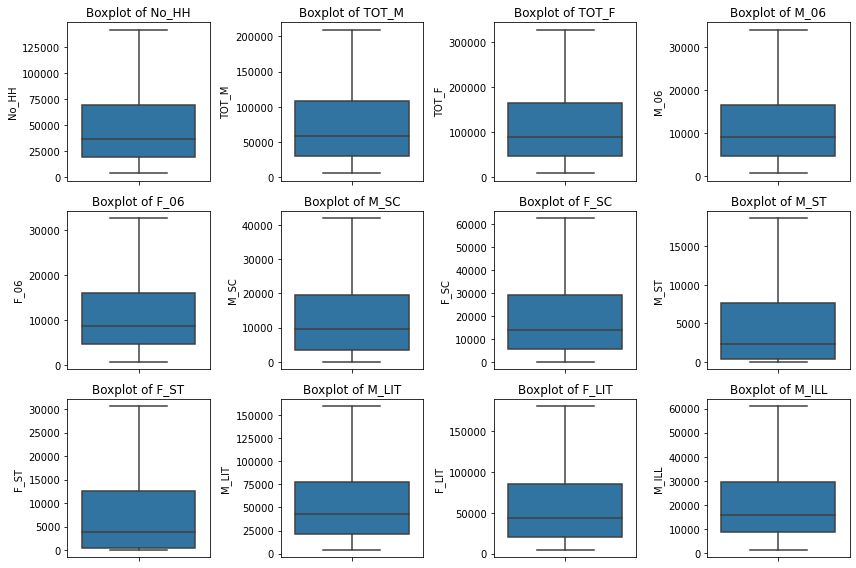

In [155]:
#Check to verify if outliers have been treated
plt.figure(figsize = (12,8))
feature_list = df_num.columns
for i in range(len(feature_list)):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y = df_num[feature_list[i]], data = df_num)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [156]:
#Check for columns with null values
for i in df.columns:
    print(i,df[i].isnull().sum())

State Code 0
Dist.Code 0
State 0
Area Name 0
No_HH 0
TOT_M 0
TOT_F 0
M_06 0
F_06 0
M_SC 0
F_SC 0
M_ST 0
F_ST 0
M_LIT 0
F_LIT 0
M_ILL 0
F_ILL 0
TOT_WORK_M 0
TOT_WORK_F 0
MAINWORK_M 0
MAINWORK_F 0
MAIN_CL_M 0
MAIN_CL_F 0
MAIN_AL_M 0
MAIN_AL_F 0
MAIN_HH_M 0
MAIN_HH_F 0
MAIN_OT_M 0
MAIN_OT_F 0
MARGWORK_M 0
MARGWORK_F 0
MARG_CL_M 0
MARG_CL_F 0
MARG_AL_M 0
MARG_AL_F 0
MARG_HH_M 0
MARG_HH_F 0
MARG_OT_M 0
MARG_OT_F 0
MARGWORK_3_6_M 0
MARGWORK_3_6_F 0
MARG_CL_3_6_M 0
MARG_CL_3_6_F 0
MARG_AL_3_6_M 0
MARG_AL_3_6_F 0
MARG_HH_3_6_M 0
MARG_HH_3_6_F 0
MARG_OT_3_6_M 0
MARG_OT_3_6_F 0
MARGWORK_0_3_M 0
MARGWORK_0_3_F 0
MARG_CL_0_3_M 0
MARG_CL_0_3_F 0
MARG_AL_0_3_M 0
MARG_AL_0_3_F 0
MARG_HH_0_3_M 0
MARG_HH_0_3_F 0
MARG_OT_0_3_M 0
MARG_OT_0_3_F 0
NON_WORK_M 0
NON_WORK_F 0


.

In [157]:
#Scaling
from scipy.stats import zscore
df_num_scaled=df_num.apply(zscore)
df_num_scaled.head()

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,-1.045396,-0.891093,-0.948655,-0.627243,-0.563311,-1.088269,-1.087541,-0.510440,-0.574198,-0.948906,...,-0.096253,-0.864718,-0.043099,-0.425511,0.523140,-0.794321,-0.445201,-0.759537,-0.500966,-0.779020
1,-1.083544,-0.956140,-1.022636,-0.776917,-0.838085,-1.087937,-1.087210,-0.771833,-0.782092,-1.015165,...,-0.723610,-0.880968,-0.348713,-0.445954,-0.635705,-0.885471,0.357980,0.087088,-0.817503,-0.885082
2,-1.128788,-1.179163,-1.156783,-1.145679,-1.140971,-1.088269,-1.087210,0.122588,0.137599,-1.153297,...,-1.136160,-1.132855,-0.772282,-0.803699,-1.048690,-0.985384,-0.992825,-1.009676,-1.013327,-1.079529
3,-1.158017,-1.201253,-1.189446,-1.187881,-1.178483,-1.088518,-1.087541,-0.399531,-0.437333,-1.171017,...,-1.055858,-1.104655,-0.681134,-0.704041,-1.041536,-0.971361,-0.956316,-0.990435,-0.881883,-1.083457
4,-0.944274,-0.938933,-0.946611,-0.703707,-0.742812,-1.086858,-1.085718,0.432534,0.249489,-0.952094,...,-0.373294,-0.301199,1.484967,1.634079,-0.591134,-0.750499,-0.591234,-0.381121,-0.710202,-0.260494


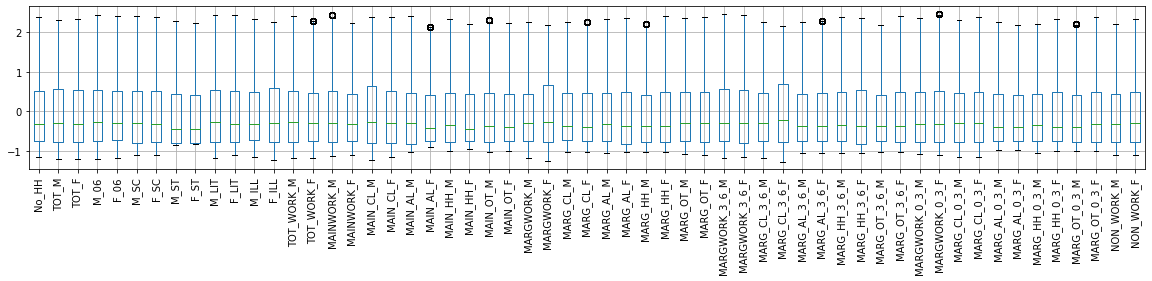

In [158]:
df_num_scaled.boxplot(figsize=(20,3))
plt.xticks(rotation=90)
plt.show()

# PCA

Statistical tests to be done before PCA

Bartletts Test of Sphericity:

Bartlett's test of sphericity tests the hypothesis that the variables are uncorrelated in the population.

H0: All variables in the data are uncorrelated

Ha: At least one pair of variables in the data are correlated

If the null hypothesis cannot be rejected, then PCA is not advisable.

If the p-value is small, then we can reject the null hypothesis and agree that there is atleast one pair of vairbales in the data wihich are correlated hence PCA is recommended.

In [159]:
!pip install factor_analyzer
from factor_analyzer import FactorAnalyzer 

In [160]:
# Perform statistical tests before PCA 
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_num_scaled)
p_value

0.0

KMO Test

The Kaiser-Meyer-Olkin (KMO) - measure of sampling adequacy (MSA) is an index used to examine how appropriate PCA is.

Generally, if MSA is less than 0.5, PCA is not recommended, since no reduction is expected. On the other hand, MSA > 0.7 is expected to provide a considerable reduction is the dimension and extraction of meaningful components.

In [161]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_num_scaled)
kmo_model

D:\Anaconda\lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.9324595054325264

In [169]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
from sklearn.decomposition import PCA
pca = PCA(n_components=33, random_state=123)
df_pca = pca.fit_transform(df_num_scaled)
mat1 = df_pca.transpose().round(2)
for row in mat1:
    for element in row:
        print(element, end=' ')
    print()

-5.57 -5.54 -7.52 -7.86 -5.22 -3.68 -6.22 -5.48 -6.14 -5.0 -7.16 -6.51 -7.68 -4.3 -7.14 -6.51 -7.59 -7.5 -5.3 -6.97 -0.75 -7.07 -2.34 7.76 -7.99 -4.67 1.59 -1.42 -3.07 -3.56 -3.75 -4.35 -2.3 -7.69 4.59 -4.11 3.42 2.05 -4.49 -6.22 6.86 -3.57 0.35 -4.57 -5.92 -2.56 -4.41 -0.61 4.32 -0.84 -4.38 -4.91 -2.25 -6.22 -5.74 -6.42 -3.86 -5.45 -1.79 -0.76 0.15 -2.86 -5.0 -0.77 -6.26 -2.67 0.25 -2.37 -6.39 -3.67 -4.47 -5.55 -4.34 -2.9 -4.16 -1.09 -2.16 -4.36 -3.17 -0.09 -0.05 -3.43 -2.97 -3.37 -3.63 -3.74 -5.38 -2.43 -4.66 2.14 -5.32 -1.29 -3.08 -7.89 -5.27 -0.43 -2.59 -0.83 -1.0 -2.55 -1.18 0.4 2.53 3.85 0.06 -3.54 -3.75 -4.84 -3.79 9.56 3.86 2.56 3.55 -6.52 -1.33 -2.52 -4.7 0.66 3.03 -4.58 -4.73 0.31 -2.1 0.44 -1.3 -3.66 -2.71 -5.08 -4.93 2.86 -5.14 2.45 4.41 5.06 9.42 1.7 -1.38 5.95 -3.64 8.25 -2.41 9.32 9.64 -0.54 2.49 10.4 3.3 -1.33 5.87 10.25 -1.55 1.89 7.3 9.88 9.06 9.72 13.02 12.29 -0.69 -1.23 -2.34 -3.94 -1.25 10.99 -2.46 0.98 -4.64 -4.17 -5.37 -1.75 -5.12 7.25 14.46 1.31 16.42 6.88 9.01 

In [170]:
#Step 1: Obtaining the Eigen Vectors when the Principal Components are kept exactly as the number of features in the scaled data
mat2 = pca.components_.round(2)
for row in mat2:
    for element in row:
        print(element, end=' ')
    print()

0.15 0.16 0.16 0.16 0.16 0.14 0.14 0.02 0.02 0.16 0.15 0.15 0.16 0.15 0.14 0.14 0.13 0.11 0.08 0.12 0.09 0.14 0.13 0.12 0.12 0.16 0.15 0.09 0.06 0.13 0.12 0.15 0.14 0.15 0.15 0.16 0.16 0.16 0.15 0.09 0.07 0.13 0.11 0.15 0.14 0.15 0.15 0.14 0.13 0.06 0.06 0.12 0.11 0.14 0.14 0.15 0.14 
-0.12 -0.08 -0.09 -0.02 -0.01 -0.08 -0.09 0.07 0.07 -0.11 -0.13 -0.01 -0.02 -0.12 -0.08 -0.17 -0.14 0.04 0.1 -0.05 -0.07 -0.1 -0.11 -0.2 -0.21 0.08 0.11 0.27 0.28 0.16 0.13 0.04 0.01 -0.07 -0.09 -0.04 -0.09 0.07 0.09 0.26 0.27 0.15 0.12 0.04 -0.0 -0.08 -0.1 0.14 0.17 0.28 0.29 0.18 0.18 0.05 0.04 -0.05 -0.04 
0.1 -0.04 0.03 -0.07 -0.07 -0.04 0.02 0.32 0.34 -0.03 -0.01 -0.05 0.08 -0.0 0.19 0.02 0.21 0.03 0.19 0.23 0.36 -0.1 0.02 -0.03 0.07 -0.07 0.11 -0.11 -0.04 0.07 0.26 -0.14 -0.09 -0.13 -0.05 -0.07 -0.06 -0.06 0.13 -0.1 -0.02 0.08 0.28 -0.14 -0.09 -0.13 -0.06 -0.1 0.03 -0.12 -0.09 0.03 0.16 -0.14 -0.1 -0.13 -0.03 
0.08 0.05 0.07 0.03 0.02 0.01 0.02 0.09 0.08 0.09 0.13 -0.03 -0.01 0.07 0.11 0.1 0.13 0.08

In [171]:
var_exp = pca.explained_variance_ratio_
print(var_exp.round(2))

[0.62 0.13 0.07 0.05 0.03 0.02 0.02 0.01 0.01 0.01 0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.  ]


In [172]:
# Step 2: Obtaining the Cumulative Sum of the Expalained Variance 
cum_var_exp = np.cumsum(var_exp)
print('Cumulative Variance Explained in Percentage:',(cum_var_exp*100).round(2))

Cumulative Variance Explained in Percentage: [62.4  75.8  82.44 87.31 90.66 92.68 94.4  95.21 95.9  96.47 96.95 97.36
 97.68 97.97 98.22 98.45 98.63 98.8  98.95 99.09 99.2  99.32 99.4  99.48
 99.56 99.61 99.66 99.71 99.75 99.79 99.82 99.85 99.87]


- We can see that about 82% of the variance is explained by 3 Principal Components. 
- We can see that about 90% of the variance is explained by 5 Principal Components.
- We can see that about 92% of the variance is explained by 6 Principal Components.

In [173]:
#Scree plot

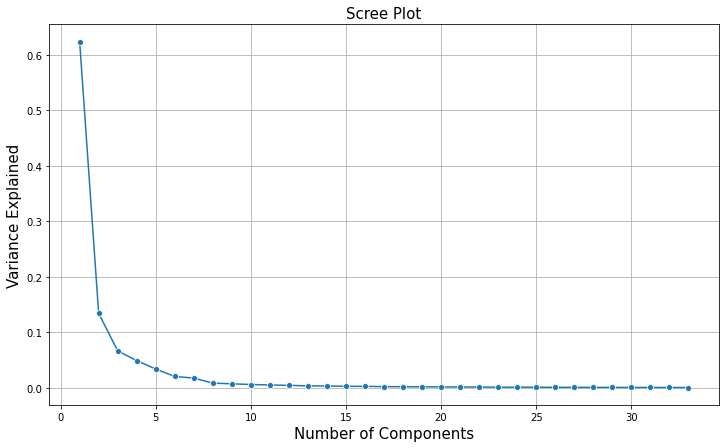

In [174]:
# Step 3 View Scree Plot to identify the number of components to be built
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

The number of components can be decided based upon the explained variance. 

Here, it is decided to keep the number of components as 6 as the cumulative explained variance is around 95%.

In [185]:
# Step 4 Apply PCA for the number of decided components to get the loadings and component output

# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA
# NOTE - we are generating only 6 PCA dimensions (dimensionality reduction to 6)
pca = PCA(n_components=6, random_state=123)
df_pca = pca.fit_transform(df_num_scaled)
df_pca.transpose().round(2) # Component output

array([[-5.57, -5.54, -7.52, ..., -7.74, -7.87, -7.45],
       [ 0.42, -0.12, -0.22, ..., -0.97, -1.01, -1.38],
       [-1.47, -2.02, -0.27, ..., -0.88, -0.85, -0.88],
       [-1.28, -1.76, -0.03, ..., -1.1 , -0.81, -0.66],
       [ 0.37, -0.  ,  0.56, ...,  0.06, -0.09,  0.08],
       [ 0.54, -1.02, -0.16, ..., -0.05,  0.39,  0.53]])

In [186]:
df_pca.shape

(640, 6)

In [187]:
# Loading of each feature on the components
# Eigen Vectors when PC's are kept as 7
pca.components_.round(2)

array([[ 0.15,  0.16,  0.16,  0.16,  0.16,  0.14,  0.14,  0.02,  0.02,
         0.16,  0.15,  0.15,  0.16,  0.15,  0.14,  0.14,  0.13,  0.11,
         0.08,  0.12,  0.09,  0.14,  0.13,  0.12,  0.12,  0.16,  0.15,
         0.09,  0.06,  0.13,  0.12,  0.15,  0.14,  0.15,  0.15,  0.16,
         0.16,  0.16,  0.15,  0.09,  0.07,  0.13,  0.11,  0.15,  0.14,
         0.15,  0.15,  0.14,  0.13,  0.06,  0.06,  0.12,  0.11,  0.14,
         0.14,  0.15,  0.14],
       [-0.12, -0.08, -0.09, -0.02, -0.01, -0.08, -0.09,  0.07,  0.07,
        -0.11, -0.13, -0.01, -0.02, -0.12, -0.08, -0.17, -0.14,  0.04,
         0.1 , -0.05, -0.07, -0.1 , -0.11, -0.2 , -0.21,  0.08,  0.11,
         0.27,  0.28,  0.16,  0.13,  0.04,  0.01, -0.07, -0.09, -0.04,
        -0.09,  0.07,  0.09,  0.26,  0.27,  0.15,  0.12,  0.04, -0.  ,
        -0.08, -0.1 ,  0.14,  0.17,  0.28,  0.29,  0.18,  0.18,  0.05,
         0.04, -0.05, -0.04],
       [ 0.1 , -0.04,  0.03, -0.07, -0.07, -0.04,  0.02,  0.32,  0.34,
        -0.03, -0

In [188]:
var_exp_1 = pca.explained_variance_ratio_.round(2)

In [189]:
#Check the explained variance for each PC. 
#Note: Explained variance = (eigen value of each PC)/(sum of eigen values of all PCs)
# It gives the Eigen Values when PC's are kept at 6
pca.explained_variance_ratio_.round(2)

array([0.62, 0.13, 0.07, 0.05, 0.03, 0.02])

Let's create a dataframe of component loading against each field and identify the pattern

In [190]:
# Component loading when PC's are kept as 6
df_pca_loading = pd.DataFrame(pca.components_.round(2),columns=list(df_num_scaled))
df_pca_loading.shape

(6, 57)

In [191]:
df_pca_loading.head()

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,F_LIT,M_ILL,F_ILL,TOT_WORK_M,TOT_WORK_F,MAINWORK_M,MAINWORK_F,MAIN_CL_M,MAIN_CL_F,MAIN_AL_M,MAIN_AL_F,MAIN_HH_M,MAIN_HH_F,MAIN_OT_M,MAIN_OT_F,MARGWORK_M,MARGWORK_F,MARG_CL_M,MARG_CL_F,MARG_AL_M,MARG_AL_F,MARG_HH_M,MARG_HH_F,MARG_OT_M,MARG_OT_F,MARGWORK_3_6_M,MARGWORK_3_6_F,MARG_CL_3_6_M,MARG_CL_3_6_F,MARG_AL_3_6_M,MARG_AL_3_6_F,MARG_HH_3_6_M,MARG_HH_3_6_F,MARG_OT_3_6_M,MARG_OT_3_6_F,MARGWORK_0_3_M,MARGWORK_0_3_F,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,0.15,0.16,0.16,0.16,0.16,0.14,0.14,0.02,0.02,0.16,0.15,0.15,0.16,0.15,0.14,0.14,0.13,0.11,0.08,0.12,0.09,0.14,0.13,0.12,0.12,0.16,0.15,0.09,0.06,0.13,0.12,0.15,0.14,0.15,0.15,0.16,0.16,0.16,0.15,0.09,0.07,0.13,0.11,0.15,0.14,0.15,0.15,0.14,0.13,0.06,0.06,0.12,0.11,0.14,0.14,0.15,0.14
1,-0.12,-0.08,-0.09,-0.02,-0.01,-0.08,-0.09,0.07,0.07,-0.11,-0.13,-0.01,-0.02,-0.12,-0.08,-0.17,-0.14,0.04,0.10,-0.05,-0.07,-0.10,-0.11,-0.20,-0.21,0.08,0.11,0.27,0.28,0.16,0.13,0.04,0.01,-0.07,-0.09,-0.04,-0.09,0.07,0.09,0.26,0.27,0.15,0.12,0.04,-0.00,-0.08,-0.10,0.14,0.17,0.28,0.29,0.18,0.18,0.05,0.04,-0.05,-0.04
2,0.10,-0.04,0.03,-0.07,-0.07,-0.04,0.02,0.32,0.34,-0.03,-0.01,-0.05,0.08,-0.00,0.19,0.02,0.21,0.03,0.19,0.23,0.36,-0.10,0.02,-0.03,0.07,-0.07,0.11,-0.11,-0.04,0.07,0.26,-0.14,-0.09,-0.13,-0.05,-0.07,-0.06,-0.06,0.13,-0.10,-0.02,0.08,0.28,-0.14,-0.09,-0.13,-0.06,-0.10,0.03,-0.12,-0.09,0.03,0.16,-0.14,-0.10,-0.13,-0.03
3,0.08,0.05,0.07,0.03,0.02,0.01,0.02,0.09,0.08,0.09,0.13,-0.03,-0.01,0.07,0.11,0.10,0.13,0.08,0.26,-0.12,-0.02,-0.02,-0.05,0.15,0.16,-0.08,0.02,0.16,0.29,-0.25,-0.15,-0.17,-0.15,0.02,0.06,0.04,0.05,-0.09,0.02,0.13,0.29,-0.25,-0.14,-0.17,-0.14,0.02,0.06,-0.02,0.01,0.21,0.24,-0.24,-0.19,-0.17,-0.17,0.02,0.06
4,-0.01,-0.05,-0.03,-0.08,-0.08,-0.17,-0.16,0.42,0.42,-0.02,0.03,-0.10,-0.11,-0.02,-0.02,-0.04,-0.05,-0.30,-0.26,-0.25,-0.20,-0.06,-0.02,0.07,0.11,0.07,0.07,-0.02,-0.05,-0.05,-0.01,0.01,0.05,0.15,0.19,-0.06,-0.02,0.06,0.06,-0.01,-0.06,-0.06,-0.02,0.00,0.04,0.13,0.17,0.09,0.11,-0.02,-0.04,0.02,0.05,0.01,0.05,0.19,0.25


Let's identify which features have maximum loading across the components.

We will first plot the component loading on a heatmap.

For each feature, we find the maximum loading value across the components and mark the same with help of rectangular box.

Features marked with rectangular red box are the one having maximum loading on the respective component. We consider these marked features to decide the context that the component represents

In [192]:
from matplotlib.patches import Rectangle

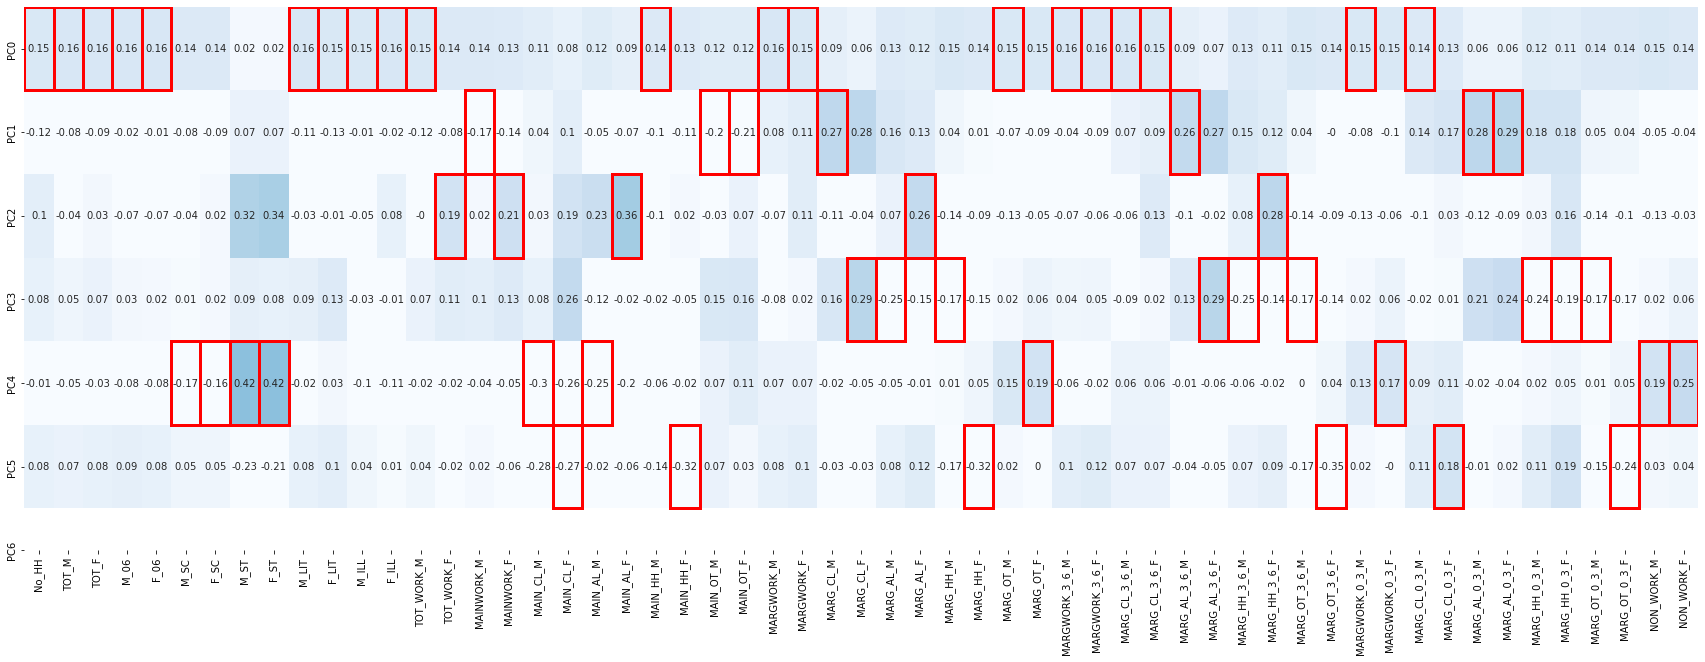

In [193]:
fig,ax = plt.subplots(figsize=(30, 10), facecolor='w', edgecolor='k')
ax = sns.heatmap(df_pca_loading, annot=True, vmax=1.0, vmin=0, cmap='Blues', cbar=False, fmt='.2g', ax=ax,
                 yticklabels=['PC0','PC1','PC2', 'PC3','PC4', 'PC5', 'PC6'])

column_max = df_pca_loading.abs().idxmax(axis=0)

for col, variable in enumerate(df_pca_loading.columns):
    position = df_pca_loading.index.get_loc(column_max[variable])
    ax.add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='red', lw=3))

For every attribute (column, the corresponding PC's cell with the maximum magnitude has been highlighted using Rectangles

Principal components are linear combinations of the original variables. Each PC is a linear combination of all variables, or scaled variables, as the case may be. It is possible that some of the coefficients are very small numbers or close to 0. We present the linear combinations that make up the first 6 PC’s.

For each PC, the row of length 57 gives the weights with which the corresponding variables need to be multiplied to get the PC. Note that the weights can be positive or negative.